# Install packages and dependencies

In [1]:
!pip3 install ratinabox
!pip3 install tqdm
!pip3 install seaborn
!pip3 install sklearn
!pip3 install skimage
!pip3 install scikit-image

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
  Using cached skimage-0.0.tar.gz (757 bytes)
    ERROR: Command errored out with exit sta

In [2]:
import ratinabox
import inspect
import tqdm
from tqdm import tqdm
from ratinabox.Environment import Environment 
from ratinabox.Agent import Agent 
from math import cos, pi
from ratinabox.Neurons import *
import numpy as np
import math
from PIL import Image
from scipy import ndimage
from scipy.spatial import distance
import numpy.ma as ma
import seaborn as sns
import pandas as pd
import ast
import scipy.stats as stats
from ast import literal_eval
import random
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter
from sklearn.linear_model import Ridge
from sklearn.gaussian_process import GaussianProcessRegressor
import glob
from numpy import percentile
import matplotlib.cm as cm
from scipy import stats
from matplotlib.colors import Normalize
import os
from ratinabox.Environment import Environment 
from ratinabox.Neurons import *
from skimage import measure
from numpy.linalg import norm
from skimage.measure import *
import os
from math import sin, cos, pi
from shapely.geometry import LineString

def padding(array, xx, yy):
    h = array.shape[0]
    w = array.shape[1]

    a = (xx - h) // 2
    aa = xx - a - h

    b = (yy - w) // 2
    bb = yy - b - w

    return np.pad(array, pad_width=((a, aa), (b, bb)), mode='constant',constant_values=np.nan)

def angle_between(p2, p1):
    ang1 = np.arctan2(*p1[::-1])
    ang2 = np.arctan2(*p2[::-1])
    return np.rad2deg((ang1 - ang2) % (2 * np.pi))


# Import the three neural datasets 

## Colin

In [2]:
# Colin                             #new is  3  and rm.shape[0] >=49 and rm.shape[0]<=50 and rm.shape[1] >=49 and rm.shape[1]<=50 and np.nanmean(rm)<=20: 
all_cells_colin=[]
shapes=[]
names=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/25.All_Colins/Colin_trial_1')
all_= sorted(glob.glob('**/*.csv'))
shapes = []
all_colin_nonan = []
for qq in tqdm(range(0,len(all_))):
    q = all_[qq]
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/25.All_Colins/Colin_trial_1/{}'.format(q), header=None) 
    rm = rm.to_numpy()

    mask = np.all(np.isnan(rm), axis=1) | np.all(rm == 0, axis=1)        
    rm = rm[~mask]    
    mask2 = np.all(np.isnan(rm), axis=0) | np.all(rm == 0, axis=0)
    rm = rm[:,~mask2]

    if sum(np.isnan(rm[:,0])) > 3:
        rm = rm[:,1:]
    else:
        pass
    if sum(np.isnan(rm[:,-1])) > 3:
        rm = rm[:,0:-1]
    else:
        pass
    if sum(np.isnan(rm[0,:])) > 3:
        rm = rm[1:,:]
    else:
        pass
    if sum(np.isnan(rm[-1,:])) > 3:
        rm = rm[0:-1,:]
    else:
        pass
    #Again
    if sum(np.isnan(rm[:,0])) > 3:
        rm = rm[:,1:]
    else:
        pass
    if sum(np.isnan(rm[:,-1])) > 3:
        rm = rm[:,0:-1]
    else:
        pass
    if sum(np.isnan(rm[0,:])) > 3:
        rm = rm[1:,:]
    else:
        pass
    if sum(np.isnan(rm[-1,:])) > 3:
        rm = rm[0:-1,:]
    else:
        pass
   
    if rm.shape[0]<51 and rm.shape[1]<51 and rm.shape[0]>48 and rm.shape[1]>48:                   #np.nanmean(rm)<=5:
        rm = rm/np.nansum(rm)
        rm = rm - np.nanmin(rm)
        
        rm = padding(rm, 51, 51)
        all_cells_colin.append(rm)
        id_ = q.split('/')[1].split('xy.csv')[0]
        

        
        rm1 = pd.DataFrame(rm)     

    else:
        pass

all_cells_quadrants_colin = []
for xx in tqdm(range(0,len(all_cells_colin))):
  rmone = all_cells_colin[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_colin.append(quad)

len(all_cells_quadrants_colin)


  0%|          | 0/343 [00:00<?, ?it/s]/tmp/ipykernel_170786/1434689112.py:54: RuntimeWarning: invalid value encountered in divide
  rm = rm/np.nansum(rm)
/tmp/ipykernel_170786/1434689112.py:55: RuntimeWarning: All-NaN slice encountered
  rm = rm - np.nanmin(rm)
100%|██████████| 186/186 [00:00<00:00, 16233.31it/s]


186

In [3]:
# Colin Sander PC
os.chdir("/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/Colin_Hz_PC")  #Checking_Colins_PC2
all_= sorted(glob.glob('*'))

all_colin_sander_pc = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures//Hertz/Colin_Hz_PC/{}'.format(q))   #'/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Colin_PC/{}'.format(q)) 
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    rm = padding(rm, 51, 51)
    all_colin_sander_pc.append(rm)
                
all_cells_quadrants_colin_sander_pc = []
for xx in tqdm(range(0,len(all_colin_sander_pc))):
  rmone = all_colin_sander_pc[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_colin_sander_pc.append(quad)

len(all_cells_quadrants_colin_sander_pc)

100%|██████████| 400/400 [00:00<00:00, 16081.68it/s]


400

In [4]:
# Colin Sander SF
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/Colin_Hz_SF')  #Checking_Colins_SF2
all_= sorted(glob.glob('*'))

all_colin_sander_sf = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/Colin_Hz_SF/{}'.format(q))          
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    rm = padding(rm, 51, 51)
    all_colin_sander_sf.append(rm)
                
all_cells_quadrants_colin_sander_sf = []
for xx in tqdm(range(0,len(all_colin_sander_sf))):
  rmone = all_colin_sander_sf[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_colin_sander_sf.append(quad)

len(all_cells_quadrants_colin_sander_sf)

100%|██████████| 400/400 [00:00<00:00, 16191.72it/s]


400

In [5]:
# Colin Gaussian PC
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/Colin_Hz_Gaussian_PC') #Figures/Checking_Colins_Gaussian_PC2')
all_= sorted(glob.glob('*'))

all_colin_gaussian_pc = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/Colin_Hz_Gaussian_PC/{}'.format(q)) 
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    rm = padding(rm, 51, 51)
    all_colin_gaussian_pc.append(rm)
                
all_cells_quadrants_colin_gaussian_pc = []
for xx in tqdm(range(0,len(all_colin_gaussian_pc))):
  rmone = all_colin_gaussian_pc[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_colin_gaussian_pc.append(quad)

len(all_cells_quadrants_colin_gaussian_pc)

100%|██████████| 400/400 [00:00<00:00, 15541.22it/s]


400

In [6]:
# Colin Gaussian SF
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/Colin_Hz_Gaussian_SF')    #Wills_new/Figures/Checking_Colins_Gaussian_SF2')
all_= sorted(glob.glob('*'))

all_colin_gaussian_sf = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/Colin_Hz_Gaussian_SF/{}'.format(q)) 
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    rm = padding(rm, 51, 51)
    all_colin_gaussian_sf.append(rm)
                
all_cells_quadrants_colin_gaussian_sf = []
for xx in tqdm(range(0,len(all_colin_gaussian_sf))):
  rmone = all_colin_gaussian_sf[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_colin_gaussian_sf.append(quad)

len(all_cells_quadrants_colin_gaussian_sf)

100%|██████████| 400/400 [00:00<00:00, 14940.70it/s]


400

In [7]:
# Colin Sander RW
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/Colin_Hz_RW') #C_RW_015
all_= sorted(glob.glob('*'))

all_colin_sander_rw = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/Colin_Hz_RW/{}'.format(q)) 
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    rm = padding(rm, 51, 51)
    all_colin_sander_rw.append(rm)
                
all_cells_quadrants_colin_sander_rw = []
for xx in tqdm(range(0,len(all_colin_sander_rw))):
  rmone = all_colin_sander_rw[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_colin_sander_rw.append(quad)

len(all_cells_quadrants_colin_sander_rw)

100%|██████████| 400/400 [00:00<00:00, 16342.98it/s]


400

In [8]:
# Colin Trad
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Gio_trad/50')
all_= sorted(glob.glob('*.npy'))

all_colin_trad = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Gio_trad/50/{}'.format(q)) 
    all_colin_trad.append(rm)

all_colin_trads = []
for rm in all_colin_trad:       
  try:
    if rm.shape[0] >= 24 and rm.shape[1] >= 24:
      rm = padding(rm, 51, 51)
      all_colin_trads.append(rm)
    else:
      pass
  except:
    pass
                
all_cells_quadrants_colin_trad = []
for xx in tqdm(range(0,len(all_colin_trads))):
  rmone = all_colin_trads[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_colin_trad.append(quad)

len(all_cells_quadrants_colin_trad)

100%|██████████| 400/400 [00:00<00:00, 16411.73it/s]


400

In [9]:
## Per Rat                          #new is >3 and rm.shape[0] >=49 and rm.shape[0]<=50 and rm.shape[1] >=49 and rm.shape[1]<=50 and np.nanmean(rm)<=25:
# Colin
all_cells_colin=[]
shapes=[]
names=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/25.All_Colins/Colin_trial_1/Rat_460')
all_= sorted(glob.glob('*.csv'))
shapes = []
all_colin_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/25.All_Colins/Colin_trial_1/Rat_460/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    all_colin_nonan.append(rm)

for rm in all_colin_nonan:
    mask = np.all(np.isnan(rm), axis=1) | np.all(rm == 0, axis=1)        
    rm = rm[~mask]    
    mask2 = np.all(np.isnan(rm), axis=0) | np.all(rm == 0, axis=0)
    rm = rm[:,~mask2]
    
    if sum(np.isnan(rm[:,0])) > 3:
        rm = rm[:,1:]
    else:
        pass
    if sum(np.isnan(rm[:,-1])) > 3:
        rm = rm[:,0:-1]
    else:
        pass
    if sum(np.isnan(rm[0,:])) > 3:
        rm = rm[1:,:]
    else:
        pass
    if sum(np.isnan(rm[-1,:])) > 3:
        rm = rm[0:-1,:]
    else:
        pass
    #Again
    if sum(np.isnan(rm[:,0])) > 3:
        rm = rm[:,1:]
    else:
        pass
    if sum(np.isnan(rm[:,-1])) > 3:
        rm = rm[:,0:-1]
    else:
        pass
    if sum(np.isnan(rm[0,:])) > 3:
        rm = rm[1:,:]
    else:
        pass
    if sum(np.isnan(rm[-1,:])) > 3:
        rm = rm[0:-1,:]
    else:
        pass

    shapes.append(rm.shape)
        
    if rm.shape[0]<=50 and rm.shape[1]<=50 and np.nanmean(rm)<=5:               
        rm = rm/np.nansum(rm)
        rm = rm - np.nanmin(rm)
        rm = padding(rm, 51, 51)
        all_cells_colin.append(rm)
        
    else:
        pass
all_cells_quadrants_colin_460 = []
for xx in tqdm(range(0,len(all_cells_colin))):
  rmone = all_cells_colin[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_colin_460.append(quad)

len(all_cells_quadrants_colin_460)

#########

# Colin
all_cells_colin=[]
shapes=[]
names=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/25.All_Colins/Colin_trial_1/Rat_462')
all_= sorted(glob.glob('*.csv'))
shapes = []
all_colin_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/25.All_Colins/Colin_trial_1/Rat_462/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    all_colin_nonan.append(rm)

for rm in all_colin_nonan:
    mask = np.all(np.isnan(rm), axis=1) | np.all(rm == 0, axis=1)        
    rm = rm[~mask]    
    mask2 = np.all(np.isnan(rm), axis=0) | np.all(rm == 0, axis=0)
    rm = rm[:,~mask2]
    
    if sum(np.isnan(rm[:,0])) > 3:
        rm = rm[:,1:]
    else:
        pass
    if sum(np.isnan(rm[:,-1])) > 3:
        rm = rm[:,0:-1]
    else:
        pass
    if sum(np.isnan(rm[0,:])) > 3:
        rm = rm[1:,:]
    else:
        pass
    if sum(np.isnan(rm[-1,:])) > 3:
        rm = rm[0:-1,:]
    else:
        pass
    #Again
    if sum(np.isnan(rm[:,0])) > 3:
        rm = rm[:,1:]
    else:
        pass
    if sum(np.isnan(rm[:,-1])) > 3:
        rm = rm[:,0:-1]
    else:
        pass
    if sum(np.isnan(rm[0,:])) > 3:
        rm = rm[1:,:]
    else:
        pass
    if sum(np.isnan(rm[-1,:])) > 3:
        rm = rm[0:-1,:]
    else:
        pass

    shapes.append(rm.shape)
        
    if rm.shape[0]<=50 and rm.shape[1]<=50 and np.nanmean(rm)<=5:
        rm = rm/np.nansum(rm)
        rm = rm - np.nanmin(rm)
        rm = padding(rm, 51, 51)
        all_cells_colin.append(rm)
        
    else:
        pass
all_cells_quadrants_colin_462 = []
for xx in tqdm(range(0,len(all_cells_colin))):
  rmone = all_cells_colin[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_colin_462.append(quad)

len(all_cells_quadrants_colin_462)

########

# Colin
all_cells_colin=[]
shapes=[]
names=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/25.All_Colins/Colin_trial_1/Rat_463/')
all_= sorted(glob.glob('*.csv'))
shapes = []
all_colin_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/25.All_Colins/Colin_trial_1/Rat_463/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    all_colin_nonan.append(rm)

for rm in all_colin_nonan:
    mask = np.all(np.isnan(rm), axis=1) | np.all(rm == 0, axis=1)        
    rm = rm[~mask]    
    mask2 = np.all(np.isnan(rm), axis=0) | np.all(rm == 0, axis=0)
    rm = rm[:,~mask2]
    
    if sum(np.isnan(rm[:,0])) > 3:
        rm = rm[:,1:]
    else:
        pass
    if sum(np.isnan(rm[:,-1])) > 3:
        rm = rm[:,0:-1]
    else:
        pass
    if sum(np.isnan(rm[0,:])) > 3:
        rm = rm[1:,:]
    else:
        pass
    if sum(np.isnan(rm[-1,:])) > 3:
        rm = rm[0:-1,:]
    else:
        pass
    #Again
    if sum(np.isnan(rm[:,0])) > 3:
        rm = rm[:,1:]
    else:
        pass
    if sum(np.isnan(rm[:,-1])) > 3:
        rm = rm[:,0:-1]
    else:
        pass
    if sum(np.isnan(rm[0,:])) > 3:
        rm = rm[1:,:]
    else:
        pass
    if sum(np.isnan(rm[-1,:])) > 3:
        rm = rm[0:-1,:]
    else:
        pass

    shapes.append(rm.shape)
        
    if rm.shape[0]<=50 and rm.shape[1]<=50 and np.nanmean(rm)<=5:
        rm = rm/np.nansum(rm)
        rm = rm - np.nanmin(rm)
        rm = padding(rm, 51, 51)
        all_cells_colin.append(rm)
        
    else:
        pass
all_cells_quadrants_colin_463 = []
for xx in tqdm(range(0,len(all_cells_colin))):
  rmone = all_cells_colin[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_colin_463.append(quad)

len(all_cells_quadrants_colin_463)

# Colin
all_cells_colin=[]
shapes=[]
names=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/25.All_Colins/Colin_trial_1/Rat_480/')
all_= sorted(glob.glob('*.csv'))
shapes = []
all_colin_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/25.All_Colins/Colin_trial_1/Rat_480/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    all_colin_nonan.append(rm)

for rm in all_colin_nonan:
    mask = np.all(np.isnan(rm), axis=1) | np.all(rm == 0, axis=1)        
    rm = rm[~mask]    
    mask2 = np.all(np.isnan(rm), axis=0) | np.all(rm == 0, axis=0)
    rm = rm[:,~mask2]
    
    if sum(np.isnan(rm[:,0])) > 3:
        rm = rm[:,1:]
    else:
        pass
    if sum(np.isnan(rm[:,-1])) > 3:
        rm = rm[:,0:-1]
    else:
        pass
    if sum(np.isnan(rm[0,:])) > 3:
        rm = rm[1:,:]
    else:
        pass
    if sum(np.isnan(rm[-1,:])) > 3:
        rm = rm[0:-1,:]
    else:
        pass
    #Again
    if sum(np.isnan(rm[:,0])) > 3:
        rm = rm[:,1:]
    else:
        pass
    if sum(np.isnan(rm[:,-1])) > 3:
        rm = rm[:,0:-1]
    else:
        pass
    if sum(np.isnan(rm[0,:])) > 3:
        rm = rm[1:,:]
    else:
        pass
    if sum(np.isnan(rm[-1,:])) > 3:
        rm = rm[0:-1,:]
    else:
        pass

    shapes.append(rm.shape)
        
    if rm.shape[0]<=50 and rm.shape[1]<=50 and np.nanmean(rm)<=5:
        rm = rm/np.nansum(rm)
        rm = rm - np.nanmin(rm)
        rm = padding(rm, 51, 51)
        all_cells_colin.append(rm)
        
    else:
        pass
all_cells_quadrants_colin_480 = []
for xx in tqdm(range(0,len(all_cells_colin))):
  rmone = all_cells_colin[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_colin_480.append(quad)

len(all_cells_quadrants_colin_480)

#####
# Colin
all_cells_colin=[]
shapes=[]
names=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/25.All_Colins/Colin_trial_1/Rat_495/')
all_= sorted(glob.glob('*.csv'))
shapes = []
all_colin_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/25.All_Colins/Colin_trial_1/Rat_495/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    all_colin_nonan.append(rm)

for rm in all_colin_nonan:
    mask = np.all(np.isnan(rm), axis=1) | np.all(rm == 0, axis=1)        
    rm = rm[~mask]    
    mask2 = np.all(np.isnan(rm), axis=0) | np.all(rm == 0, axis=0)
    rm = rm[:,~mask2]
    
    if sum(np.isnan(rm[:,0])) > 3:
        rm = rm[:,1:]
    else:
        pass
    if sum(np.isnan(rm[:,-1])) > 3:
        rm = rm[:,0:-1]
    else:
        pass
    if sum(np.isnan(rm[0,:])) > 3:
        rm = rm[1:,:]
    else:
        pass
    if sum(np.isnan(rm[-1,:])) > 3:
        rm = rm[0:-1,:]
    else:
        pass
    #Again
    if sum(np.isnan(rm[:,0])) > 3:
        rm = rm[:,1:]
    else:
        pass
    if sum(np.isnan(rm[:,-1])) > 3:
        rm = rm[:,0:-1]
    else:
        pass
    if sum(np.isnan(rm[0,:])) > 3:
        rm = rm[1:,:]
    else:
        pass
    if sum(np.isnan(rm[-1,:])) > 3:
        rm = rm[0:-1,:]
    else:
        pass

    shapes.append(rm.shape)
        
    if rm.shape[0]<=50 and rm.shape[1]<=50 and np.nanmean(rm)<=5:
        rm = rm/np.nansum(rm)
        rm = rm - np.nanmin(rm)
        rm = padding(rm, 51, 51)
        all_cells_colin.append(rm)
        
    else:
        pass
all_cells_quadrants_colin_495 = []
for xx in tqdm(range(0,len(all_cells_colin))):
  rmone = all_cells_colin[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_colin_495.append(quad)

len(all_cells_quadrants_colin_495)
#######

# Colin
all_cells_colin=[]
shapes=[]
names=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/25.All_Colins/Colin_trial_1/Rat_496/')
all_= sorted(glob.glob('*.csv'))
shapes = []
all_colin_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/25.All_Colins/Colin_trial_1/Rat_496/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    all_colin_nonan.append(rm)

for rm in all_colin_nonan:
    mask = np.all(np.isnan(rm), axis=1) | np.all(rm == 0, axis=1)        
    rm = rm[~mask]    
    mask2 = np.all(np.isnan(rm), axis=0) | np.all(rm == 0, axis=0)
    rm = rm[:,~mask2]
    
    if sum(np.isnan(rm[:,0])) > 3:
        rm = rm[:,1:]
    else:
        pass
    if sum(np.isnan(rm[:,-1])) > 3:
        rm = rm[:,0:-1]
    else:
        pass
    if sum(np.isnan(rm[0,:])) > 3:
        rm = rm[1:,:]
    else:
        pass
    if sum(np.isnan(rm[-1,:])) > 3:
        rm = rm[0:-1,:]
    else:
        pass
    #Again
    if sum(np.isnan(rm[:,0])) > 3:
        rm = rm[:,1:]
    else:
        pass
    if sum(np.isnan(rm[:,-1])) > 3:
        rm = rm[:,0:-1]
    else:
        pass
    if sum(np.isnan(rm[0,:])) > 3:
        rm = rm[1:,:]
    else:
        pass
    if sum(np.isnan(rm[-1,:])) > 3:
        rm = rm[0:-1,:]
    else:
        pass

    shapes.append(rm.shape)
        
    if rm.shape[0]<=50 and rm.shape[1]<=50 and np.nanmean(rm)<=5:
        rm = rm/np.nansum(rm)
        rm = rm - np.nanmin(rm)
        rm = padding(rm, 51, 51)
        all_cells_colin.append(rm)
        
    else:
        pass
all_cells_quadrants_colin_496 = []
for xx in tqdm(range(0,len(all_cells_colin))):
  rmone = all_cells_colin[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_colin_496.append(quad)

len(all_cells_quadrants_colin_496)

####

100%|██████████| 182/182 [00:00<00:00, 501.13it/s]
/tmp/ipykernel_170786/2954551193.py:58: RuntimeWarning: invalid value encountered in divide
  rm = rm/np.nansum(rm)
/tmp/ipykernel_170786/2954551193.py:59: RuntimeWarning: All-NaN slice encountered
  rm = rm - np.nanmin(rm)
100%|██████████| 24/24 [00:00<00:00, 17178.04it/s]


24

## Laurenz

In [10]:
# Laurenz SF Sander
all_cells_wills_sf_sander=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/New_Laurenz/SF_sander/') #Hertz/Laurenz_Hz_SF


all_= sorted(glob.glob('*.npy'))

all_wills_sf_sander_nonan = []
for q in tqdm(all_):
    rm  =np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/New_Laurenz/SF_sander/{}'.format(q))
    all_wills_sf_sander_nonan.append(rm)

for rm in all_wills_sf_sander_nonan:       
  try:
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    rm = padding(rm, 27, 27)
    all_cells_wills_sf_sander.append(rm)
  except:
    pass
                
all_cells_quadrants_wills_sf_sander = []
for xx in tqdm(range(0,len(all_cells_wills_sf_sander))):
  rmone = all_cells_wills_sf_sander[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_wills_sf_sander.append(quad)

len(all_cells_quadrants_wills_sf_sander)

100%|██████████| 400/400 [00:00<00:00, 21713.58it/s]


400

In [11]:
# Laurenz Sander PC
all_cells_wills_pc_sander=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/New_Laurenz/PC_sander/') #Hertz/Laurenz_Hz_PC
all_= sorted(glob.glob('*.npy'))

all_wills_pc_sander_nonan = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/New_Laurenz/PC_sander/{}'.format(q)) 
    all_wills_pc_sander_nonan.append(rm)

for rm in all_wills_pc_sander_nonan:       
  try:
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)    
    rm = padding(rm, 27, 27)
    all_cells_wills_pc_sander.append(rm)
  except:
    pass
                
all_cells_quadrants_wills_pc_sander = []
for xx in tqdm(range(0,len(all_cells_wills_pc_sander))):
  rmone = all_cells_wills_pc_sander[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_wills_pc_sander.append(quad)

len(all_cells_quadrants_wills_pc_sander)

100%|██████████| 400/400 [00:00<00:00, 20690.90it/s]


400

In [12]:
# Laurenz RW SF
all_cells_laurenz_rw_sf=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/Laurenz_Hz_RW') #Checking_Laurenz_RW2 #L_RW_011', #Hertz/Laurenz_Hz_RW
all_= sorted(glob.glob('*.npy'))

all_laurenz_rw_sf_nonan = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/Laurenz_Hz_RW/{}'.format(q)) 
    all_laurenz_rw_sf_nonan.append(rm)

for rm in all_laurenz_rw_sf_nonan:       
  try:
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)    
    rm = padding(rm, 27, 27)
    all_cells_laurenz_rw_sf.append(rm)
  except:
    pass
                
all_cells_quadrants_laurenz_rw_sf = []
for xx in tqdm(range(0,len(all_cells_laurenz_rw_sf))):
  rmone = all_cells_laurenz_rw_sf[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_laurenz_rw_sf.append(quad)

len(all_cells_quadrants_laurenz_rw_sf)

100%|██████████| 400/400 [00:00<00:00, 20228.62it/s]


400

In [13]:
# Laurenz Gaussian PC
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/New_Laurenz/PC_gaussian')    #Hertz/Laurenz_Hz_Gaussian_PC/
all_= sorted(glob.glob('*.npy'))

all_wills_nonan_gaussian_pc = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/New_Laurenz/PC_gaussian/{}'.format(q)) 
    all_wills_nonan_gaussian_pc.append(rm)

all_wills_gaussian_pc = []
for rm in all_wills_nonan_gaussian_pc:       
  try:
    if rm.shape[0] >= 24 and rm.shape[1] >= 24:
      rm = padding(rm, 27, 27)
      all_wills_gaussian_pc.append(rm)
    else:
      pass
  except:
    pass
                
all_cells_quadrants_wills_gaussian_pc = []
for xx in tqdm(range(0,len(all_wills_gaussian_pc))):
  rmone = all_wills_gaussian_pc[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_wills_gaussian_pc.append(quad)

len(all_cells_quadrants_wills_gaussian_pc)

100%|██████████| 400/400 [00:00<00:00, 20374.55it/s]


400

In [14]:
# Laurenz Gaussian SF
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/New_Laurenz/SF_gaussian') #Hertz/Laurenz_Hz_Gaussian_SF
all_= sorted(glob.glob('*.npy'))

all_wills_nonan_gaussian_sf = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/New_Laurenz/SF_gaussian/{}'.format(q)) 
    all_wills_nonan_gaussian_sf.append(rm)

all_wills_gaussian_sf = []
for rm in all_wills_nonan_gaussian_sf:       
  try:
    if rm.shape[0] >= 24 and rm.shape[1] >= 24:
      rm = padding(rm, 27, 27)
      all_wills_gaussian_sf.append(rm)
    else:
      pass
  except:
    pass
                
all_cells_quadrants_wills_gaussian_sf = []
for xx in tqdm(range(0,len(all_wills_gaussian_sf))):
  rmone = all_wills_gaussian_sf[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_wills_gaussian_sf.append(quad)

len(all_cells_quadrants_wills_gaussian_sf)

100%|██████████| 400/400 [00:00<00:00, 20349.34it/s]


400

In [15]:
# Laurenz Trad
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Gio_trad/25')
all_= sorted(glob.glob('*.npy'))

all_wills_trad = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Gio_trad/25/{}'.format(q)) 
    all_wills_trad.append(rm)

all_wills_trads = []
for rm in all_wills_trad:       
  try:
    if rm.shape[0] >= 24 and rm.shape[1] >= 24:
      rm = padding(rm, 27, 27)
      all_wills_trads.append(rm)
    else:
      pass
  except:
    pass
                
all_cells_quadrants_wills_trad = []
for xx in tqdm(range(0,len(all_wills_trads))):
  rmone = all_wills_trads[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_wills_trad.append(quad)

len(all_cells_quadrants_wills_trad)

100%|██████████| 400/400 [00:00<00:00, 20423.90it/s]


400

## Gio

In [16]:
# Gio Sander SF
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Checking_Gio_SF2')      #Checking_Gio_SF2
all_= sorted(glob.glob('*.npy'))

all_gio_sander_sf = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Checking_Gio_SF2/{}'.format(q))
    rm = rm/np.nansum(rm)
    
    rm = rm - np.nanmin(rm)
    rm = padding(rm, 30, 30)
    all_gio_sander_sf.append(rm)
                
all_cells_quadrants_gio_sander_sf = []
for xx in tqdm(range(0,len(all_gio_sander_sf))):
  rmone = all_gio_sander_sf[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_gio_sander_sf.append(quad)

len(all_cells_quadrants_gio_sander_sf)

100%|██████████| 400/400 [00:00<00:00, 14724.86it/s]


400

In [17]:
# Gio      
all_cells_gio=[]
shapes=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/40.Gio_data/All_squares/')
all_= sorted(glob.glob('**/**/*.csv'))
shapes = []
all_gio_nonan = []
for q in tqdm(all_):
  rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/40.Gio_data/All_squares/{}'.format(q), header=None) 
  rm = rm.to_numpy()
  
  if sum(np.isnan(rm[:,0])) > 3:
      rm = rm[:,1:]
  else:
    pass
  if sum(np.isnan(rm[:,-1])) > 3:
    rm = rm[:,0:-1]
  else:
    pass
  if sum(np.isnan(rm[0,:])) > 3:
    rm = rm[1:,:]
  else:
    pass
  if sum(np.isnan(rm[-1,:])) > 3:
    rm = rm[0:-1,:]
  else:
    pass
#Again
  if sum(np.isnan(rm[:,0])) > 3:
      rm = rm[:,1:]
  else:
    pass
  if sum(np.isnan(rm[:,-1])) > 3:
    rm = rm[:,0:-1]
  else:
    pass
  if sum(np.isnan(rm[0,:])) > 3:
    rm = rm[1:,:]
  else:
    pass
  if sum(np.isnan(rm[-1,:])) > 3:
    rm = rm[0:-1,:]
  else:
    pass
    
  if rm.shape[0]>=16 and rm.shape[1]>=16 and rm.shape[0]<=18 and rm.shape[1]<=18:  #and np.nanmean(rm)<=20: #remove
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    shapes.append(rm.shape)
    rm = padding(rm, 18, 18)
    all_cells_gio.append(rm)
    id_ = q.split('/')[0]+'_'+q.split('/')[1]+'_'+q.split('/')[2].split('.csv')[0]

    #np.save('/home/lauren/Comparing_BVC_Trad/25.All_Colins/Wills_download_Gio/{}.npy'.format(id_), rm)

    rm1 = pd.DataFrame(rm)

  else:
    pass

all_cells_quadrants_gio = []
for xx in tqdm(range(0,len(all_cells_gio))):
  rmone = all_cells_gio[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_gio.append(quad)

len(all_cells_quadrants_gio)


100%|██████████| 1937/1937 [00:00<00:00, 21600.18it/s]


1937

In [18]:
# Gio Sander PC Figure
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Gio_RW_PC')           #'/home/lauren/Comparing_BVC_Trad/42.Proper/Test_PC_40')
all_= sorted(glob.glob('*'))

all_gio_sander_pc_figures = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Gio_RW_PC/{}'.format(q))       #'/home/lauren/Comparing_BVC_Trad/42.Proper/Test_PC_40/{}'.format(q)) 
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    rm = padding(rm, 18, 18)
    all_gio_sander_pc_figures.append(rm)
                

os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Gio_RW_SF')           #'/home/lauren/Comparing_BVC_Trad/42.Proper/Test_PC_40')
all_= sorted(glob.glob('*'))

all_gio_sander_sf_figures = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Gio_RW_SF/{}'.format(q))       #'/home/lauren/Comparing_BVC_Trad/42.Proper/Test_PC_40/{}'.format(q)) 
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    rm = padding(rm, 18, 18)
    all_gio_sander_sf_figures.append(rm)



os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Gio_RW_Normal_SF')           #'/home/lauren/Comparing_BVC_Trad/42.Proper/Test_PC_40')
all_= sorted(glob.glob('*'))

all_gio_sander_sf_normal_figures = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Gio_RW_Normal_SF/{}'.format(q))       #'/home/lauren/Comparing_BVC_Trad/42.Proper/Test_PC_40/{}'.format(q)) 
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    rm = padding(rm, 18, 18)
    all_gio_sander_sf_normal_figures.append(rm)

                

os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Gio_RW_Normal_PC')           #'/home/lauren/Comparing_BVC_Trad/42.Proper/Test_PC_40')
all_= sorted(glob.glob('*'))

all_gio_sander_pc_normal_figures = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Gio_RW_Normal_PC/{}'.format(q))       #'/home/lauren/Comparing_BVC_Trad/42.Proper/Test_PC_40/{}'.format(q)) 
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    rm = padding(rm, 18, 18)
    all_gio_sander_pc_normal_figures.append(rm)                

100%|██████████| 400/400 [00:00<00:00, 5595.63it/s]


In [19]:
# Gio Sander PC
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Checking_Gio_PC2')           #'/home/lauren/Comparing_BVC_Trad/42.Proper/Test_PC_40')
all_= sorted(glob.glob('*'))

all_gio_sander_pc = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Checking_Gio_PC2/{}'.format(q))       #'/home/lauren/Comparing_BVC_Trad/42.Proper/Test_PC_40/{}'.format(q)) 
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    rm = padding(rm, 30, 30)
    all_gio_sander_pc.append(rm)
                
all_cells_quadrants_gio_sander_pc = []
for xx in tqdm(range(0,len(all_gio_sander_pc))):
  rmone = all_gio_sander_pc[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_gio_sander_pc.append(quad)

len(all_cells_quadrants_gio_sander_pc)

100%|██████████| 400/400 [00:00<00:00, 19705.45it/s]


400

In [20]:
# Gio Gaussian PC
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/Gio_Hz_Gaussian_PC') #Figures/Checking_Gio_Gaussian_PC2')
all_= sorted(glob.glob('*.npy'))

shapes = []

all_gio_gaussian_pc = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/Gio_Hz_Gaussian_PC/{}'.format(q)) 
    
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    shapes.append(rm.shape)
    rm = padding(rm, 30, 30)
    all_gio_gaussian_pc.append(rm)
                
all_cells_quadrants_gio_gaussian_pc = []
for xx in tqdm(range(0,len(all_gio_gaussian_pc))):
  rmone = all_gio_gaussian_pc[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_gio_gaussian_pc.append(quad)

len(all_cells_quadrants_gio_gaussian_pc)

100%|██████████| 400/400 [00:00<00:00, 19795.42it/s]


400

In [21]:
# Gio Gaussian SF
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/Gio_Hz_Gaussian_SF')  #Figures/Checking_Gio_Gaussian_SF2')
all_= sorted(glob.glob('*.npy'))

all_gio_gaussian_sf = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/Gio_Hz_Gaussian_SF/{}'.format(q)) 
    
    rm = rm/np.nansum(rm)
    
    rm = rm - np.nanmin(rm)
    rm = padding(rm, 30, 30)
    all_gio_gaussian_sf.append(rm)
                
all_cells_quadrants_gio_gaussian_sf = []
for xx in tqdm(range(0,len(all_gio_gaussian_sf))):
  rmone = all_gio_gaussian_sf[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_gio_gaussian_sf.append(quad)

len(all_cells_quadrants_gio_gaussian_sf)

100%|██████████| 400/400 [00:00<00:00, 19726.30it/s]


400

In [22]:
# Gio Trad
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Gio_trad/30')
all_= sorted(glob.glob('*.npy'))

all_gio_trad = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Gio_trad/30/{}'.format(q)) 
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    
    rm = padding(rm, 30, 30)
    all_gio_trad.append(rm)
                
all_cells_quadrants_gio_trad = []
for xx in tqdm(range(0,len(all_gio_trad))):
  rmone = all_gio_trad[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_gio_trad.append(quad)

len(all_cells_quadrants_gio_trad)

100%|██████████| 400/400 [00:00<00:00, 19589.71it/s]


400

In [23]:
# Gio RW
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/Gio_Hz_RW') #G_RW_0205, #Hertz/Gio_Hz_RW
all_= sorted(glob.glob('*.npy'))

all_gio_rw = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Final/Wills_new/Figures/Hertz/Gio_Hz_RW/{}'.format(q))
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm) 
    all_gio_rw.append(rm)
                
all_cells_quadrants_gio_rw = []
for xx in tqdm(range(0,len(all_gio_rw))):
  rmone = all_gio_rw[xx]
  rmone = rmone/np.nansum(rmone)
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_gio_rw.append(quad)

len(all_cells_quadrants_gio_rw)

100%|██████████| 400/400 [00:00<00:00, 15369.10it/s]


400

### Per Rat

In [24]:
#@title Gio Per RAT
all_cells_gio=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/40.Gio_data/All_squares/Trial_1/M4102Fa')
all_= sorted(glob.glob('*.csv'))

all_gio_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/40.Gio_data/All_squares/Trial_1/M4102Fa/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    all_gio_nonan.append(rm)

for rm in all_gio_nonan:       
  if sum(np.isnan(rm[:,0])) > 3:
      rm = rm[:,1:]
  else:
    pass
  if sum(np.isnan(rm[:,-1])) > 3:
    rm = rm[:,0:-1]
  else:
    pass
  if sum(np.isnan(rm[0,:])) > 3:
    rm = rm[1:,:]
  else:
    pass
  if sum(np.isnan(rm[-1,:])) > 3:
    rm = rm[0:-1,:]
  else:
    pass
#Again
  if sum(np.isnan(rm[:,0])) > 3:
      rm = rm[:,1:]
  else:
    pass
  if sum(np.isnan(rm[:,-1])) > 3:
    rm = rm[:,0:-1]
  else:
    pass
  if sum(np.isnan(rm[0,:])) > 3:
    rm = rm[1:,:]
  else:
    pass
  if sum(np.isnan(rm[-1,:])) > 3:
    rm = rm[0:-1,:]
  else:
    pass

  if rm.shape[0]>=16 and rm.shape[1]>=16 and rm.shape[0]<=18 and rm.shape[1]<=18:
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    rm = padding(rm, 18, 18)
    all_cells_gio.append(rm)
  else:
    pass
                
all_cells_quadrants_gio_1_M4102Fa = []
for xx in tqdm(range(0,len(all_cells_gio))):
  rmone = all_cells_gio[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_gio_1_M4102Fa.append(quad)

###

all_cells_gio=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/40.Gio_data/All_squares/Trial_1/M4104a/')
all_= sorted(glob.glob('*.csv'))

all_gio_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/40.Gio_data/All_squares/Trial_1/M4104a/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    all_gio_nonan.append(rm)

for rm in all_gio_nonan:       
  if sum(np.isnan(rm[:,0])) > 3:
      rm = rm[:,1:]
  else:
    pass
  if sum(np.isnan(rm[:,-1])) > 3:
    rm = rm[:,0:-1]
  else:
    pass
  if sum(np.isnan(rm[0,:])) > 3:
    rm = rm[1:,:]
  else:
    pass
  if sum(np.isnan(rm[-1,:])) > 3:
    rm = rm[0:-1,:]
  else:
    pass
#Again
  if sum(np.isnan(rm[:,0])) > 3:
      rm = rm[:,1:]
  else:
    pass
  if sum(np.isnan(rm[:,-1])) > 3:
    rm = rm[:,0:-1]
  else:
    pass
  if sum(np.isnan(rm[0,:])) > 3:
    rm = rm[1:,:]
  else:
    pass
  if sum(np.isnan(rm[-1,:])) > 3:
    rm = rm[0:-1,:]
  else:
    pass
  if rm.shape[0]>=16 and rm.shape[1]>=16 and rm.shape[0]<=18 and rm.shape[1]<=18:
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    rm = padding(rm, 18, 18)
    all_cells_gio.append(rm)
  else:
    pass
                
all_cells_quadrants_gio_1_M4104a = []
for xx in tqdm(range(0,len(all_cells_gio))):
  rmone = all_cells_gio[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_gio_1_M4104a.append(quad)

###

all_cells_gio=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/40.Gio_data/All_squares/Trial_1/M4113Fa')
all_= sorted(glob.glob('*.csv'))

all_gio_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/40.Gio_data/All_squares/Trial_1/M4113Fa/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    all_gio_nonan.append(rm)

for rm in all_gio_nonan:       
  if sum(np.isnan(rm[:,0])) > 3:
      rm = rm[:,1:]
  else:
    pass
  if sum(np.isnan(rm[:,-1])) > 3:
    rm = rm[:,0:-1]
  else:
    pass
  if sum(np.isnan(rm[0,:])) > 3:
    rm = rm[1:,:]
  else:
    pass
  if sum(np.isnan(rm[-1,:])) > 3:
    rm = rm[0:-1,:]
  else:
    pass
#Again
  if sum(np.isnan(rm[:,0])) > 3:
      rm = rm[:,1:]
  else:
    pass
  if sum(np.isnan(rm[:,-1])) > 3:
    rm = rm[:,0:-1]
  else:
    pass
  if sum(np.isnan(rm[0,:])) > 3:
    rm = rm[1:,:]
  else:
    pass
  if sum(np.isnan(rm[-1,:])) > 3:
    rm = rm[0:-1,:]
  else:
    pass
  if rm.shape[0]>=16 and rm.shape[1]>=16 and rm.shape[0]<=18 and rm.shape[1]<=18:
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    rm = padding(rm, 18, 18)
    all_cells_gio.append(rm)
  else:
    pass
                
all_cells_quadrants_gio_1_M4113Fa = []
for xx in tqdm(range(0,len(all_cells_gio))):
  rmone = all_cells_gio[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_gio_1_M4113Fa.append(quad)

###

all_cells_gio=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/40.Gio_data/All_squares/Trial_1/M4115a')
all_= sorted(glob.glob('*.csv'))

all_gio_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/40.Gio_data/All_squares/Trial_1/M4115a/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    all_gio_nonan.append(rm)

for rm in all_gio_nonan:       
  if sum(np.isnan(rm[:,0])) > 3:
      rm = rm[:,1:]
  else:
    pass
  if sum(np.isnan(rm[:,-1])) > 3:
    rm = rm[:,0:-1]
  else:
    pass
  if sum(np.isnan(rm[0,:])) > 3:
    rm = rm[1:,:]
  else:
    pass
  if sum(np.isnan(rm[-1,:])) > 3:
    rm = rm[0:-1,:]
  else:
    pass
#Again
  if sum(np.isnan(rm[:,0])) > 3:
      rm = rm[:,1:]
  else:
    pass
  if sum(np.isnan(rm[:,-1])) > 3:
    rm = rm[:,0:-1]
  else:
    pass
  if sum(np.isnan(rm[0,:])) > 3:
    rm = rm[1:,:]
  else:
    pass
  if sum(np.isnan(rm[-1,:])) > 3:
    rm = rm[0:-1,:]
  else:
    pass
  if rm.shape[0]>=16 and rm.shape[1]>=16 and rm.shape[0]<=18 and rm.shape[1]<=18:
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    rm = padding(rm, 18, 18)
    all_cells_gio.append(rm)
  else:
    pass
                
all_cells_quadrants_gio_1_M4115a = []
for xx in tqdm(range(0,len(all_cells_gio))):
  rmone = all_cells_gio[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_gio_1_M4115a.append(quad)

###

all_cells_gio=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/40.Gio_data/All_squares/Trial_1/M4116a')
all_= sorted(glob.glob('*.csv'))

all_gio_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/40.Gio_data/All_squares/Trial_1/M4116a/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    all_gio_nonan.append(rm)

for rm in all_gio_nonan:       
  if sum(np.isnan(rm[:,0])) > 3:
      rm = rm[:,1:]
  else:
    pass
  if sum(np.isnan(rm[:,-1])) > 3:
    rm = rm[:,0:-1]
  else:
    pass
  if sum(np.isnan(rm[0,:])) > 3:
    rm = rm[1:,:]
  else:
    pass
  if sum(np.isnan(rm[-1,:])) > 3:
    rm = rm[0:-1,:]
  else:
    pass
#Again
  if sum(np.isnan(rm[:,0])) > 3:
      rm = rm[:,1:]
  else:
    pass
  if sum(np.isnan(rm[:,-1])) > 3:
    rm = rm[:,0:-1]
  else:
    pass
  if sum(np.isnan(rm[0,:])) > 3:
    rm = rm[1:,:]
  else:
    pass
  if sum(np.isnan(rm[-1,:])) > 3:
    rm = rm[0:-1,:]
  else:
    pass
  if rm.shape[0]>=16 and rm.shape[1]>=16 and rm.shape[0]<=18 and rm.shape[1]<=18:
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    rm = padding(rm, 18, 18)
    all_cells_gio.append(rm)
  else:
    pass
                
all_cells_quadrants_gio_1_M4116a = []
for xx in tqdm(range(0,len(all_cells_gio))):
  rmone = all_cells_gio[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_gio_1_M4116a.append(quad)

###

100%|██████████| 163/163 [00:00<00:00, 1314.42it/s]
0it [00:00, ?it/s]
100%|██████████| 146/146 [00:00<00:00, 20571.36it/s]


In [25]:
#@title Gio Per RAT Trial 2s
all_cells_gio=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/40.Gio_data/All_squares/Trial_2/M4102Fa')
all_= sorted(glob.glob('*.csv'))

all_gio_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/40.Gio_data/All_squares/Trial_2/M4102Fa/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    
    all_gio_nonan.append(rm)

for rm in all_gio_nonan:       
  if sum(np.isnan(rm[:,0])) > 3:
      rm = rm[:,1:]
  else:
    pass
  if sum(np.isnan(rm[:,-1])) > 3:
    rm = rm[:,0:-1]
  else:
    pass
  if sum(np.isnan(rm[0,:])) > 3:
    rm = rm[1:,:]
  else:
    pass
  if sum(np.isnan(rm[-1,:])) > 3:
    rm = rm[0:-1,:]
  else:
    pass
#Again
  if sum(np.isnan(rm[:,0])) > 3:
      rm = rm[:,1:]
  else:
    pass
  if sum(np.isnan(rm[:,-1])) > 3:
    rm = rm[:,0:-1]
  else:
    pass
  if sum(np.isnan(rm[0,:])) > 3:
    rm = rm[1:,:]
  else:
    pass
  if sum(np.isnan(rm[-1,:])) > 3:
    rm = rm[0:-1,:]
  else:
    pass
  if rm.shape[0]>=16 and rm.shape[1]>=16 and rm.shape[0]<=18 and rm.shape[1]<=18:
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    rm = padding(rm, 18, 18)
    all_cells_gio.append(rm)
  else:
    pass
                
all_cells_quadrants_gio_1_M4102Fa_2 = []
for xx in tqdm(range(0,len(all_cells_gio))):
  rmone = all_cells_gio[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_gio_1_M4102Fa_2.append(quad)

###

all_cells_gio=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/40.Gio_data/All_squares/Trial_2/M4104a/')
all_= sorted(glob.glob('*.csv'))

all_gio_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/40.Gio_data/All_squares/Trial_2/M4104a/{}'.format(q), header=None) 
    rm = rm.to_numpy()

    all_gio_nonan.append(rm)

for rm in all_gio_nonan:       
  if sum(np.isnan(rm[:,0])) > 3:
      rm = rm[:,1:]
  else:
    pass
  if sum(np.isnan(rm[:,-1])) > 3:
    rm = rm[:,0:-1]
  else:
    pass
  if sum(np.isnan(rm[0,:])) > 3:
    rm = rm[1:,:]
  else:
    pass
  if sum(np.isnan(rm[-1,:])) > 3:
    rm = rm[0:-1,:]
  else:
    pass
#Again
  if sum(np.isnan(rm[:,0])) > 3:
      rm = rm[:,1:]
  else:
    pass
  if sum(np.isnan(rm[:,-1])) > 3:
    rm = rm[:,0:-1]
  else:
    pass
  if sum(np.isnan(rm[0,:])) > 3:
    rm = rm[1:,:]
  else:
    pass
  if sum(np.isnan(rm[-1,:])) > 3:
    rm = rm[0:-1,:]
  else:
    pass
  if rm.shape[0]>=16 and rm.shape[1]>=16 and rm.shape[0]<=18 and rm.shape[1]<=18:
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    rm = padding(rm, 18, 18)
    all_cells_gio.append(rm)
  else:
    pass

                
all_cells_quadrants_gio_1_M4104a_2 = []
for xx in tqdm(range(0,len(all_cells_gio))):
  rmone = all_cells_gio[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_gio_1_M4104a_2.append(quad)

###

all_cells_gio=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/40.Gio_data/All_squares/Trial_2/M4113Fa')
all_= sorted(glob.glob('*.csv'))

all_gio_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/40.Gio_data/All_squares/Trial_2/M4113Fa/{}'.format(q), header=None) 
    rm = rm.to_numpy()


    all_gio_nonan.append(rm)

for rm in all_gio_nonan:       
  if sum(np.isnan(rm[:,0])) > 3:
      rm = rm[:,1:]
  else:
    pass
  if sum(np.isnan(rm[:,-1])) > 3:
    rm = rm[:,0:-1]
  else:
    pass
  if sum(np.isnan(rm[0,:])) > 3:
    rm = rm[1:,:]
  else:
    pass
  if sum(np.isnan(rm[-1,:])) > 3:
    rm = rm[0:-1,:]
  else:
    pass
#Again
  if sum(np.isnan(rm[:,0])) > 3:
      rm = rm[:,1:]
  else:
    pass
  if sum(np.isnan(rm[:,-1])) > 3:
    rm = rm[:,0:-1]
  else:
    pass
  if sum(np.isnan(rm[0,:])) > 3:
    rm = rm[1:,:]
  else:
    pass
  if sum(np.isnan(rm[-1,:])) > 3:
    rm = rm[0:-1,:]
  else:
    pass
  if rm.shape[0]>=16 and rm.shape[1]>=16 and rm.shape[0]<=18 and rm.shape[1]<=18:
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    rm = padding(rm, 18, 18)
    all_cells_gio.append(rm)
  else:
    pass
                
all_cells_quadrants_gio_1_M4113Fa_2 = []
for xx in tqdm(range(0,len(all_cells_gio))):
  rmone = all_cells_gio[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_gio_1_M4113Fa_2.append(quad)

###

all_cells_gio=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/40.Gio_data/All_squares/Trial_2/M4115a')
all_= sorted(glob.glob('*.csv'))

all_gio_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/40.Gio_data/All_squares/Trial_2/M4115a/{}'.format(q), header=None) 
    rm = rm.to_numpy()


    all_gio_nonan.append(rm)

for rm in all_gio_nonan:       
  if sum(np.isnan(rm[:,0])) > 3:
      rm = rm[:,1:]
  else:
    pass
  if sum(np.isnan(rm[:,-1])) > 3:
    rm = rm[:,0:-1]
  else:
    pass
  if sum(np.isnan(rm[0,:])) > 3:
    rm = rm[1:,:]
  else:
    pass
  if sum(np.isnan(rm[-1,:])) > 3:
    rm = rm[0:-1,:]
  else:
    pass
#Again
  if sum(np.isnan(rm[:,0])) > 3:
      rm = rm[:,1:]
  else:
    pass
  if sum(np.isnan(rm[:,-1])) > 3:
    rm = rm[:,0:-1]
  else:
    pass
  if sum(np.isnan(rm[0,:])) > 3:
    rm = rm[1:,:]
  else:
    pass
  if sum(np.isnan(rm[-1,:])) > 3:
    rm = rm[0:-1,:]
  else:
    pass
  if rm.shape[0]>=16 and rm.shape[1]>=16 and rm.shape[0]<=18 and rm.shape[1]<=18:
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    rm = padding(rm, 18, 18)
    all_cells_gio.append(rm)
  else:
    pass
                
all_cells_quadrants_gio_1_M4115a_2 = []
for xx in tqdm(range(0,len(all_cells_gio))):
  rmone = all_cells_gio[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_gio_1_M4115a_2.append(quad)

###

all_cells_gio=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/40.Gio_data/All_squares/Trial_2/M4116a')
all_= sorted(glob.glob('*.csv'))

all_gio_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/40.Gio_data/All_squares/Trial_2/M4116a/{}'.format(q), header=None) 
    rm = rm.to_numpy()

    all_gio_nonan.append(rm)

for rm in all_gio_nonan:       
  if sum(np.isnan(rm[:,0])) > 3:
      rm = rm[:,1:]
  else:
    pass
  if sum(np.isnan(rm[:,-1])) > 3:
    rm = rm[:,0:-1]
  else:
    pass
  if sum(np.isnan(rm[0,:])) > 3:
    rm = rm[1:,:]
  else:
    pass
  if sum(np.isnan(rm[-1,:])) > 3:
    rm = rm[0:-1,:]
  else:
    pass
#Again
  if sum(np.isnan(rm[:,0])) > 3:
      rm = rm[:,1:]
  else:
    pass
  if sum(np.isnan(rm[:,-1])) > 3:
    rm = rm[:,0:-1]
  else:
    pass
  if sum(np.isnan(rm[0,:])) > 3:
    rm = rm[1:,:]
  else:
    pass
  if sum(np.isnan(rm[-1,:])) > 3:
    rm = rm[0:-1,:]
  else:
    pass
  if rm.shape[0]>=16 and rm.shape[1]>=16 and rm.shape[0]<=18 and rm.shape[1]<=18:
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    rm = padding(rm, 18, 18)
    all_cells_gio.append(rm)
  else:
    pass
                
all_cells_quadrants_gio_1_M4116a_2 = []
for xx in tqdm(range(0,len(all_cells_gio))):
  rmone = all_cells_gio[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_gio_1_M4116a_2.append(quad)

###

100%|██████████| 146/146 [00:00<00:00, 1302.26it/s]
0it [00:00, ?it/s]


# Install successor features and basis features for each of the 3 environment shapes

## Laurenz CA1 and Sub

In [26]:
all_laurenz_ca1=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/53.Laurenz_CA1_new_morefilt/')
all_= sorted(glob.glob('**/*.csv'))

shapes = []
all_laurenz_nonan_ca1 = []
for q in tqdm(all_):
  rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/53.Laurenz_CA1_new_morefilt/{}'.format(q), header=None) 
  rm = rm.to_numpy()  
  try:
    if sum(np.isnan(rm[:,0])) > 5:
      rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) >5:
      rm = rm[0:-1,:]
    else:
      pass
  #Again
    if sum(np.isnan(rm[:,0])) > 5:
        rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass

    if rm.shape[0] ==25 and rm.shape[1] ==25:                 # NEW #if rm.shape[0] >=24 and rm.shape[1] >=24 and np.nanmean(rm)<=20: 
      rm = rm/np.nansum(rm)
      rm = rm - np.nanmin(rm)
      shapes.append(rm.shape)
      rm = padding(rm, 27, 27)  
      all_laurenz_ca1.append(rm)
      id_ = q.split('/')[1].split('.csv')[0]
      #np.save('/home/lauren/Comparing_BVC_Trad/25.All_Colins/Wills_download_Laurenz_CA1/{}.npy'.format(id_), rm)
      rm1 = pd.DataFrame(rm)
    else:
      pass
  except:
    pass
                
all_cells_quadrants_laurenz_ca1 = []
for xx in tqdm(range(0,len(all_laurenz_ca1))):
  rmone = all_laurenz_ca1[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_laurenz_ca1.append(quad)

len(all_cells_quadrants_laurenz_ca1)

100%|██████████| 353/353 [00:00<00:00, 20099.23it/s]


353

In [27]:
all_laurenz_sub=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/53.Laurenz_sub_new_meantrate_width_notrial')
all_= sorted(glob.glob('**/*.csv'))

all_laurenz_nonan_sub = []
shapes = []
for q in tqdm(all_):
  rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/53.Laurenz_sub_new_meantrate_width_notrial/{}'.format(q), header=None) 
  rm = rm.to_numpy()   
  try:
    if sum(np.isnan(rm[:,0])) > 5:
      rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) >5:
      rm = rm[0:-1,:]
    else:
      pass
  #Again
    if sum(np.isnan(rm[:,0])) > 5:
        rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass

    if rm.shape[0] ==25 and rm.shape[1] ==25:                    # was   if rm.shape[0] == 25 and rm.shape[1] == 25:
      rm = rm/np.nansum(rm)
      rm = rm - np.nanmin(rm)
      shapes.append(rm.shape)
      rm = padding(rm, 27, 27)
      all_laurenz_sub.append(rm)
      id_ = q.split('/')[2].split('.csv')[0]
      #np.save('/home/lauren/Comparing_BVC_Trad/25.All_Colins/Wills_download_Laurenz_Sub/{}.npy'.format(id_), rm)
      rm1=pd.DataFrame(rm)
    else:
      pass
  except:
    pass
                
all_cells_quadrants_laurenz_sub = []
for xx in tqdm(range(0,len(all_laurenz_sub))):
  rmone = all_laurenz_sub[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_laurenz_sub.append(quad)

len(all_cells_quadrants_laurenz_sub)


100%|██████████| 335/335 [00:00<00:00, 20205.52it/s]


335

### Per Rat

In [28]:
all_laurenz_ca1_1=[]
shapes = []
os.chdir('/home/lauren/Comparing_BVC_Trad/53.Laurenz_CA1_new_morefilt/Rat_27')
all_= sorted(glob.glob('*.csv'))

all_laurenz_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/53.Laurenz_CA1_new_morefilt/Rat_27/{}'.format(q), header=None) 
    rm = rm.to_numpy()

    all_laurenz_nonan.append(rm)

for rm in all_laurenz_nonan:       
  try:
    if sum(np.isnan(rm[:,0])) > 5:
      rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
  #Again
    if sum(np.isnan(rm[:,0])) > 5:
        rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
    
    if rm.shape[0] >=23 and rm.shape[1] >=23 :
      rm = rm/np.nansum(rm)
      rm = rm - np.nanmin(rm)
      rm = padding(rm, 27, 27)  
      all_laurenz_ca1_1.append(rm)
    else:
      pass
  except:
    pass
                
all_cells_quadrants_laurenz_ca1_27 = []
for xx in tqdm(range(0,len(all_laurenz_ca1_1))):
  rmone = all_laurenz_ca1_1[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_laurenz_ca1_27.append(quad)

#########
all_laurenz_ca1_2=[]
names = []
os.chdir('/home/lauren/Comparing_BVC_Trad/53.Laurenz_CA1_new_morefilt/Rat_32/')
all_= sorted(glob.glob('*.csv'))

all_laurenz_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/53.Laurenz_CA1_new_morefilt/Rat_32/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    
    all_laurenz_nonan.append(rm)

for rm in all_laurenz_nonan:       
  try:
    if sum(np.isnan(rm[:,0])) > 5:
      rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
  #Again
    if sum(np.isnan(rm[:,0])) > 5:
        rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
    shapes.append(rm.shape)
    if rm.shape[0] >=23 and rm.shape[1] >=23:
      rm = rm/np.nansum(rm)
      rm = rm - np.nanmin(rm)
      rm = padding(rm, 27, 27)  
      all_laurenz_ca1_2.append(rm)
      names.append(q)
    else:
      pass
  except:
    pass
              
all_cells_quadrants_laurenz_ca1_32 = []
for xx in tqdm(range(0,len(all_laurenz_ca1_2))):
  rmone = all_laurenz_ca1_2[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_laurenz_ca1_32.append(quad)

########
all_laurenz_ca1_3=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/53.Laurenz_CA1_new_morefilt/Rat_44')
all_= sorted(glob.glob('*.csv'))

all_laurenz_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/53.Laurenz_CA1_new_morefilt/Rat_44/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    
    all_laurenz_nonan.append(rm)

for rm in all_laurenz_nonan:       
  try:
    if sum(np.isnan(rm[:,0])) > 5:
      rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
  #Again
    if sum(np.isnan(rm[:,0])) > 5:
        rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
    shapes.append(rm.shape)
    if rm.shape[0]>=23 and rm.shape[1] >=23:
      rm = rm/np.nansum(rm)
      rm = rm - np.nanmin(rm)
      rm = padding(rm, 27, 27)  
      all_laurenz_ca1_3.append(rm)
    else:
      pass
  except:
    pass
                
all_cells_quadrants_laurenz_ca1_44 = []
for xx in tqdm(range(0,len(all_laurenz_ca1_3))):
  rmone = all_laurenz_ca1_3[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_laurenz_ca1_44.append(quad)

######################################
all_laurenz_ca1_4=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/53.Laurenz_CA1_new_morefilt/Rat_45')
all_= sorted(glob.glob('*.csv'))

all_laurenz_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/53.Laurenz_CA1_new_morefilt/Rat_45/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    
    all_laurenz_nonan.append(rm)

for rm in all_laurenz_nonan:       
  try:
    if sum(np.isnan(rm[:,0])) > 5:
      rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
  #Again
    if sum(np.isnan(rm[:,0])) > 5:
        rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
    shapes.append(rm.shape)
    if rm.shape[0] >=23 and rm.shape[1] >=23:
      rm = rm/np.nansum(rm)
      rm = rm - np.nanmin(rm)
      rm = padding(rm, 27, 27)  
      all_laurenz_ca1_4.append(rm)
    else:
      pass
  except:
    pass
                
all_cells_quadrants_laurenz_ca1_45 = []
for xx in tqdm(range(0,len(all_laurenz_ca1_4))):
  rmone = all_laurenz_ca1_4[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_laurenz_ca1_45.append(quad)

##############
all_laurenz_ca1_5=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/53.Laurenz_CA1_new_morefilt/Rat_76')
all_= sorted(glob.glob('*.csv'))

all_laurenz_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/53.Laurenz_CA1_new_morefilt/Rat_76/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    
    all_laurenz_nonan.append(rm)

for rm in all_laurenz_nonan:       
  try:
    if sum(np.isnan(rm[:,0])) >5:
      rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
  #Again
    if sum(np.isnan(rm[:,0])) > 5:
        rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
    shapes.append(rm.shape)
    if rm.shape[0] >=23 and rm.shape[1] >=23:
      rm = rm/np.nansum(rm)
      rm = rm - np.nanmin(rm)
      rm = padding(rm, 27, 27)  
      all_laurenz_ca1_5.append(rm)
    else:
      pass
  except:
    pass
                
all_cells_quadrants_laurenz_ca1_76 = []
for xx in tqdm(range(0,len(all_laurenz_ca1_5))):
  rmone = all_laurenz_ca1_5[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_laurenz_ca1_76.append(quad)

#########
all_laurenz_ca1_6=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/53.Laurenz_CA1_new_morefilt/Rat_661')
all_= sorted(glob.glob('*.csv'))

all_laurenz_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/53.Laurenz_CA1_new_morefilt/Rat_661/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    
    all_laurenz_nonan.append(rm)

for rm in all_laurenz_nonan:       
  try:
    if sum(np.isnan(rm[:,0])) > 5:
      rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
  #Again
    if sum(np.isnan(rm[:,0])) > 5:
        rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 3:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
    shapes.append(rm.shape)
    if rm.shape[0] >=23 and rm.shape[1] >=23:
      rm = rm/np.nansum(rm)
      rm = rm - np.nanmin(rm)
      rm = padding(rm, 27, 27)  
      all_laurenz_ca1_6.append(rm)
    else:
      pass
  except:
    pass
                
all_cells_quadrants_laurenz_ca1_661 = []
for xx in tqdm(range(0,len(all_laurenz_ca1_6))):
  rmone = all_laurenz_ca1_6[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_laurenz_ca1_661.append(quad)

###########
all_laurenz_ca1_7=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/53.Laurenz_CA1_new_morefilt/Rat_673')
all_= sorted(glob.glob('*.csv'))

all_laurenz_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/53.Laurenz_CA1_new_morefilt/Rat_673/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    
    all_laurenz_nonan.append(rm)

for rm in all_laurenz_nonan:       
  try:
    if sum(np.isnan(rm[:,0])) > 5:
      rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
  #Again
    if sum(np.isnan(rm[:,0])) > 5:
        rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
    shapes.append(rm.shape)
    if rm.shape[0] >=23 and rm.shape[1] >=23:
      rm = rm/np.nansum(rm)
      rm = rm - np.nanmin(rm)
      rm = padding(rm, 27, 27)  
      all_laurenz_ca1_7.append(rm)
    else:
      pass
  except:
    pass
                
all_cells_quadrants_laurenz_ca1_673 = []
for xx in tqdm(range(0,len(all_laurenz_ca1_7))):
  rmone = all_laurenz_ca1_7[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_laurenz_ca1_673.append(quad)


##########
all_laurenz_ca1_8=[]

os.chdir('/home/lauren/Comparing_BVC_Trad/53.Laurenz_CA1_new_morefilt/Rat_678')
all_= sorted(glob.glob('*.csv'))

all_laurenz_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/53.Laurenz_CA1_new_morefilt/Rat_678/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    
    all_laurenz_nonan.append(rm)

for rm in all_laurenz_nonan:       
  try:
    if sum(np.isnan(rm[:,0])) > 5:
      rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
  #Again
    if sum(np.isnan(rm[:,0])) > 5:
        rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
    shapes.append(rm.shape)
    if rm.shape[0] >=23 and rm.shape[1] >=23:
      rm = padding(rm, 27, 27)  
      all_laurenz_ca1_8.append(rm)
    else:
      pass
  except:
    pass
                
all_cells_quadrants_laurenz_ca1_678 = []
for xx in tqdm(range(0,len(all_laurenz_ca1_8))):
  rmone = all_laurenz_ca1_8[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_laurenz_ca1_678.append(quad)

len(all_cells_quadrants_laurenz_ca1_678)


100%|██████████| 216/216 [00:00<00:00, 19951.76it/s]


216

In [29]:
#Per Rat Sub
all_laurenz_sub=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/53.Laurenz_sub_new_meantrate_width_notrial/Rat_372')
all_= sorted(glob.glob('*.csv'))

all_laurenz_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/53.Laurenz_sub_new_meantrate_width_notrial/Rat_372/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    all_laurenz_nonan.append(rm)

for rm in all_laurenz_nonan:       
  try:
    if sum(np.isnan(rm[:,0])) > 5:
      rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
  #Again
    if sum(np.isnan(rm[:,0])) > 5:
        rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
    if rm.shape[0] >=23 and rm.shape[1] >=23:
      rm = rm/np.nansum(rm)
      rm= rm- np.nanmin(rm)
      rm = padding(rm, 27, 27)  
      all_laurenz_sub.append(rm)
    else:
      pass
  except:
    pass
                
all_cells_quadrants_laurenz_sub_372 = []
for xx in tqdm(range(0,len(all_laurenz_sub))):
  rmone = all_laurenz_sub[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_laurenz_sub_372.append(quad)

#################
all_laurenz_sub=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/53.Laurenz_sub_new_meantrate_width_notrial/Rat_372_2')
all_= sorted(glob.glob('*.csv'))

all_laurenz_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/53.Laurenz_sub_new_meantrate_width_notrial/Rat_372_2/{}'.format(q), header=None) 
    rm = rm.to_numpy()

    all_laurenz_nonan.append(rm)

for rm in all_laurenz_nonan:       
  try:
    if sum(np.isnan(rm[:,0])) > 5:
      rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
  #Again
    if sum(np.isnan(rm[:,0])) > 5:
        rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
    if rm.shape[0] >=23 and rm.shape[1] >=23:
      rm = rm/np.nansum(rm)
      rm= rm- np.nanmin(rm)
      rm = padding(rm, 27, 27)  
      all_laurenz_sub.append(rm)
    else:
      pass
  except:
    pass
                
all_cells_quadrants_laurenz_sub_372_2 = []
for xx in tqdm(range(0,len(all_laurenz_sub))):
  rmone = all_laurenz_sub[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_laurenz_sub_372_2.append(quad)

#################
all_laurenz_sub=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/53.Laurenz_sub_new_meantrate_width_notrial/Rat_373')
all_= sorted(glob.glob('*.csv'))

all_laurenz_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/53.Laurenz_sub_new_meantrate_width_notrial/Rat_373/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    all_laurenz_nonan.append(rm)

for rm in all_laurenz_nonan:       
  try:
    if sum(np.isnan(rm[:,0])) > 5:
      rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
  #Again
    if sum(np.isnan(rm[:,0])) > 5:
        rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
    if rm.shape[0] >=23 and rm.shape[1] >=23:
      rm = rm/np.nansum(rm)
      rm= rm- np.nanmin(rm)
      rm = padding(rm, 27, 27)  
      all_laurenz_sub.append(rm)
    else:
      pass
  except:
    pass
                
all_cells_quadrants_laurenz_sub_373 = []
for xx in tqdm(range(0,len(all_laurenz_sub))):
  rmone = all_laurenz_sub[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_laurenz_sub_373.append(quad)

#################
all_laurenz_sub=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/53.Laurenz_sub_new_meantrate_width_notrial/Rat_373_2')
all_= sorted(glob.glob('*.csv'))

all_laurenz_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/53.Laurenz_sub_new_meantrate_width_notrial/Rat_373_2/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    all_laurenz_nonan.append(rm)

for rm in all_laurenz_nonan:       
  try:
    if sum(np.isnan(rm[:,0])) > 5:
      rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
  #Again
    if sum(np.isnan(rm[:,0])) > 5:
        rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
    if rm.shape[0] >=23 and rm.shape[1] >=23:
      rm = rm/np.nansum(rm)
      rm= rm- np.nanmin(rm)
      rm = padding(rm, 27, 27)  
      all_laurenz_sub.append(rm)
    else:
      pass
  except:
    pass
                
all_cells_quadrants_laurenz_sub_373_2 = []
for xx in tqdm(range(0,len(all_laurenz_sub))):
  rmone = all_laurenz_sub[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_laurenz_sub_373_2.append(quad)

##################
all_laurenz_sub=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/53.Laurenz_sub_new_meantrate_width_notrial/Rat_375')
all_= sorted(glob.glob('*.csv'))

all_laurenz_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/53.Laurenz_sub_new_meantrate_width_notrial/Rat_375/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    all_laurenz_nonan.append(rm)

for rm in all_laurenz_nonan:       
  try:
    if sum(np.isnan(rm[:,0])) > 5:
      rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
  #Again
    if sum(np.isnan(rm[:,0])) > 5:
        rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
    if rm.shape[0] >=23 and rm.shape[1] >=23:
      rm = rm/np.nansum(rm)
      rm= rm- np.nanmin(rm)
      rm = padding(rm, 27, 27)  
      all_laurenz_sub.append(rm)
    else:
      pass
  except:
    pass
                
all_cells_quadrants_laurenz_sub_375 = []
for xx in tqdm(range(0,len(all_laurenz_sub))):
  rmone = all_laurenz_sub[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_laurenz_sub_375.append(quad)
##################
all_laurenz_sub=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/53.Laurenz_sub_new_meantrate_width_notrial/Rat_375_2')
all_= sorted(glob.glob('*.csv'))

all_laurenz_nonan = []
for q in tqdm(all_):
    rm = pd.read_csv('/home/lauren/Comparing_BVC_Trad/53.Laurenz_sub_new_meantrate_width_notrial/Rat_375_2/{}'.format(q), header=None) 
    rm = rm.to_numpy()
    all_laurenz_nonan.append(rm)

for rm in all_laurenz_nonan:       
  try:
    if sum(np.isnan(rm[:,0])) > 5:
      rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
  #Again
    if sum(np.isnan(rm[:,0])) > 5:
        rm = rm[:,1:]
    else:
      pass
    if sum(np.isnan(rm[:,-1])) > 5:
      rm = rm[:,0:-1]
    else:
      pass
    if sum(np.isnan(rm[0,:])) > 5:
      rm = rm[1:,:]
    else:
      pass
    if sum(np.isnan(rm[-1,:])) > 5:
      rm = rm[0:-1,:]
    else:
      pass
    if rm.shape[0] >=23 and rm.shape[1] >=23:
      rm = rm/np.nansum(rm)
      rm= rm- np.nanmin(rm)
      rm = padding(rm, 27, 27)  
      all_laurenz_sub.append(rm)
    else:
      pass
  except:
    pass
                
all_cells_quadrants_laurenz_sub_375_2 = []
for xx in tqdm(range(0,len(all_laurenz_sub))):
  rmone = all_laurenz_sub[xx]
  quad = []
  for i in np.array_split(range(rmone.shape[0]), n_q):
    for j in np.array_split(range(rmone.shape[1]), n_q):
      quadrant = rmone[i[0]:i[-1]+1,j[0]:j[-1]+1].flatten()
      quad.append(quadrant)
  all_cells_quadrants_laurenz_sub_375_2.append(quad)


100%|██████████| 23/23 [00:00<00:00, 19152.07it/s]


## Laurenz Internal Corr

In [30]:
# SF Sander 
all_covariances_wills_sf_sander_internal = []
for cell_ in all_cells_quadrants_wills_sf_sander:
  covariances=[]
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_wills_sf_sander_internal.append(covariances)

all_covariances_wills_sf_sander_internal = np.array(all_covariances_wills_sf_sander_internal)
av_over_cells_wills_sf_sander = np.nanmean(all_covariances_wills_sf_sander_internal, axis=0)
av_over_cells_wills_sf_sander.shape

(81,)

In [31]:
#PC Sander
all_covariances_wills_pc_sander = []
for cell_ in all_cells_quadrants_wills_pc_sander:
  covariances=[]
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_wills_pc_sander.append(covariances)

all_covariances_wills_pc_sander = np.array(all_covariances_wills_pc_sander)
av_over_cells_wills_pc_sander = np.nanmean(all_covariances_wills_pc_sander, axis=0)
av_over_cells_wills_pc_sander.shape

(81,)

In [32]:
#Laurenz RW internal 
all_covariances_laurenz_rw_sf = []
for cell_ in all_cells_quadrants_laurenz_rw_sf:
  covariances=[]
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_laurenz_rw_sf.append(covariances)

all_covariances_laurenz_rw_sf= np.array(all_covariances_laurenz_rw_sf)
av_over_cells_laurenz_rw_sf = np.nanmean(all_covariances_laurenz_rw_sf, axis=0)
av_over_cells_laurenz_rw_sf.shape


(81,)

In [33]:
# Laurenz Gaussian PC
all_covariances_gaussian_pc_internal = []
for cell_ in all_cells_quadrants_wills_gaussian_pc:
  covariances=[]
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_gaussian_pc_internal.append(covariances)

all_covariances_gaussian_pc_internal = np.array(all_covariances_gaussian_pc_internal)
av_over_cells_laurenz_gaussian_pc = np.nanmean(all_covariances_gaussian_pc_internal, axis=0)
av_over_cells_laurenz_gaussian_pc.shape

(81,)

In [34]:
# Laurenz Gaussian SF
all_covariances_gaussian_sf_internal = []
for cell_ in all_cells_quadrants_wills_gaussian_sf:
  covariances=[]
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_gaussian_sf_internal.append(covariances)

all_covariances_gaussian_sf_internal = np.array(all_covariances_gaussian_sf_internal)
av_over_cells_laurenz_gaussian_sf = np.nanmean(all_covariances_gaussian_sf_internal, axis=0)
av_over_cells_laurenz_gaussian_sf.shape

(81,)

In [35]:
# Laurenz Trad
all_covariances_laurenz_trad_internal = []
for cell_ in all_cells_quadrants_wills_trad:
  covariances=[]
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_laurenz_trad_internal.append(covariances)

all_covariances_laurenz_trad_internal = np.array(all_covariances_laurenz_trad_internal)
av_over_cells_laurenz_trad = np.nanmean(all_covariances_laurenz_trad_internal, axis=0)
av_over_cells_laurenz_trad.shape


(81,)

## Laurenz CA1 and Sub internal

In [36]:
#Laurenz CA1 internal 
all_covariances_laurenz_ca1_internal = []
for cell_ in all_cells_quadrants_laurenz_ca1:
  covariances=[]
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_laurenz_ca1_internal.append(covariances)

all_covariances_laurenz_ca1_internal = np.array(all_covariances_laurenz_ca1_internal)
av_over_cells_laurenz_ca1 = np.nanmean(all_covariances_laurenz_ca1_internal, axis=0)
av_over_cells_laurenz_ca1.shape

(81,)

In [37]:
#Laurenz Sub internal 
all_covariances_laurenz_sub_internal = []
for cell_ in all_cells_quadrants_laurenz_sub:
  covariances=[]
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_laurenz_sub_internal.append(covariances)

all_covariances_laurenz_sub_internal = np.array(all_covariances_laurenz_sub_internal)
av_over_cells_laurenz_sub = np.nanmean(all_covariances_laurenz_sub_internal, axis=0)
av_over_cells_laurenz_sub.shape

(81,)

In [38]:
#Per Rat CA1
all_covariances_laurenz_ca1_internal = []
for cell_ in all_cells_quadrants_laurenz_ca1_27:
  covariances=[]
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_laurenz_ca1_internal.append(covariances)

all_covariances_laurenz_ca1_internal = np.array(all_covariances_laurenz_ca1_internal)
av_over_cells_laurenz_ca1_27 = np.nanmean(all_covariances_laurenz_ca1_internal, axis=0)

all_covariances_laurenz_ca1_internal = []
for cell_ in all_cells_quadrants_laurenz_ca1_32:
  covariances=[]
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_laurenz_ca1_internal.append(covariances)

all_covariances_laurenz_ca1_internal = np.array(all_covariances_laurenz_ca1_internal)
av_over_cells_laurenz_ca1_32 = np.nanmean(all_covariances_laurenz_ca1_internal, axis=0)

all_covariances_laurenz_ca1_internal = []
for cell_ in all_cells_quadrants_laurenz_ca1_44:
  covariances=[]
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_laurenz_ca1_internal.append(covariances)

all_covariances_laurenz_ca1_internal = np.array(all_covariances_laurenz_ca1_internal)
av_over_cells_laurenz_ca1_44 = np.nanmean(all_covariances_laurenz_ca1_internal, axis=0)


all_covariances_laurenz_ca1_internal = []
for cell_ in all_cells_quadrants_laurenz_ca1_45:
  covariances=[]
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_laurenz_ca1_internal.append(covariances)

all_covariances_laurenz_ca1_internal = np.array(all_covariances_laurenz_ca1_internal)
av_over_cells_laurenz_ca1_45 = np.nanmean(all_covariances_laurenz_ca1_internal, axis=0)


all_covariances_laurenz_ca1_internal = []
for cell_ in all_cells_quadrants_laurenz_ca1_76:
  covariances=[]
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_laurenz_ca1_internal.append(covariances)

all_covariances_laurenz_ca1_internal = np.array(all_covariances_laurenz_ca1_internal)
av_over_cells_laurenz_ca1_76 = np.nanmean(all_covariances_laurenz_ca1_internal, axis=0)

all_covariances_laurenz_ca1_internal = []
for cell_ in all_cells_quadrants_laurenz_ca1_661:
  covariances=[]
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_laurenz_ca1_internal.append(covariances)

all_covariances_laurenz_ca1_internal = np.array(all_covariances_laurenz_ca1_internal)
av_over_cells_laurenz_ca1_661 = np.nanmean(all_covariances_laurenz_ca1_internal, axis=0)

all_covariances_laurenz_ca1_internal = []
for cell_ in all_cells_quadrants_laurenz_ca1_673:
  covariances=[]
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_laurenz_ca1_internal.append(covariances)

all_covariances_laurenz_ca1_internal = np.array(all_covariances_laurenz_ca1_internal)
av_over_cells_laurenz_ca1_673 = np.nanmean(all_covariances_laurenz_ca1_internal, axis=0)

all_covariances_laurenz_ca1_internal = []
for cell_ in all_cells_quadrants_laurenz_ca1_678:
  covariances=[]
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_laurenz_ca1_internal.append(covariances)

all_covariances_laurenz_ca1_internal = np.array(all_covariances_laurenz_ca1_internal)
av_over_cells_laurenz_ca1_678 = np.nanmean(all_covariances_laurenz_ca1_internal, axis=0)

av_over_cells_laurenz_ca1_44.shape

(81,)

In [39]:
#Per Rat Sub
all_covariances_laurenz_sub_internal = []
for cell_ in all_cells_quadrants_laurenz_sub_372:
  covariances=[]
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_laurenz_sub_internal.append(covariances)

all_covariances_laurenz_sub_internal = np.array(all_covariances_laurenz_sub_internal)
av_over_cells_laurenz_sub_372 = np.nanmean(all_covariances_laurenz_sub_internal, axis=0)

all_covariances_laurenz_sub_internal = []
for cell_ in all_cells_quadrants_laurenz_sub_372_2:
  covariances=[]
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_laurenz_sub_internal.append(covariances)

all_covariances_laurenz_sub_internal = np.array(all_covariances_laurenz_sub_internal)
av_over_cells_laurenz_sub_372_2 = np.nanmean(all_covariances_laurenz_sub_internal, axis=0)


all_covariances_laurenz_sub_internal = []
for cell_ in all_cells_quadrants_laurenz_sub_373:
  covariances=[]
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_laurenz_sub_internal.append(covariances)

all_covariances_laurenz_sub_internal = np.array(all_covariances_laurenz_sub_internal)
av_over_cells_laurenz_sub_373 = np.nanmean(all_covariances_laurenz_sub_internal, axis=0)


all_covariances_laurenz_sub_internal = []
for cell_ in all_cells_quadrants_laurenz_sub_373_2:
  covariances=[]
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_laurenz_sub_internal.append(covariances)

all_covariances_laurenz_sub_internal = np.array(all_covariances_laurenz_sub_internal)
av_over_cells_laurenz_sub_373_2 = np.nanmean(all_covariances_laurenz_sub_internal, axis=0)



all_covariances_laurenz_sub_internal = []
for cell_ in all_cells_quadrants_laurenz_sub_375:
  covariances=[]
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_laurenz_sub_internal.append(covariances)

all_covariances_laurenz_sub_internal = np.array(all_covariances_laurenz_sub_internal)
av_over_cells_laurenz_sub_375 = np.nanmean(all_covariances_laurenz_sub_internal, axis=0)


all_covariances_laurenz_sub_internal = []
for cell_ in all_cells_quadrants_laurenz_sub_375_2:
  covariances=[]
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_laurenz_sub_internal.append(covariances)

all_covariances_laurenz_sub_internal = np.array(all_covariances_laurenz_sub_internal)
av_over_cells_laurenz_sub_375_2 = np.nanmean(all_covariances_laurenz_sub_internal, axis=0)


# Visualise each population of cells

# RSA (Figure 5)

## Colin Internal

In [40]:
#Colin internal
all_covariances_colin_all_internal = []
for cell_ in all_cells_quadrants_colin:
  covariances=[]  
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_colin_all_internal.append(covariances)

all_covariances_colin_all_internal = np.array(all_covariances_colin_all_internal)
av_over_cells_colin_all = np.nanmean(all_covariances_colin_all_internal, axis=0)
av_over_cells_colin_all.shape

(81,)

In [41]:
#Colin internal BY Rat
all_covariances_colin_all_internal = []
for cell_ in all_cells_quadrants_colin_460:
  covariances=[]  
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_colin_all_internal.append(covariances)

all_covariances_colin_all_internal = np.array(all_covariances_colin_all_internal)
av_over_cells_colin_all_1 = np.nanmean(all_covariances_colin_all_internal, axis=0)

####

#Colin internal
all_covariances_colin_all_internal = []
for cell_ in all_cells_quadrants_colin_462:
  covariances=[]  
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_colin_all_internal.append(covariances)

all_covariances_colin_all_internal = np.array(all_covariances_colin_all_internal)
av_over_cells_colin_all_2 = np.nanmean(all_covariances_colin_all_internal, axis=0)

######

#Colin internal
all_covariances_colin_all_internal = []
for cell_ in all_cells_quadrants_colin_463:
  covariances=[]  
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_colin_all_internal.append(covariances)

all_covariances_colin_all_internal = np.array(all_covariances_colin_all_internal)
av_over_cells_colin_all_3 = np.nanmean(all_covariances_colin_all_internal, axis=0)


#####

#Colin internal
all_covariances_colin_all_internal = []
for cell_ in all_cells_quadrants_colin_480:
  covariances=[]  
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_colin_all_internal.append(covariances)

all_covariances_colin_all_internal = np.array(all_covariances_colin_all_internal)
av_over_cells_colin_all_4 = np.nanmean(all_covariances_colin_all_internal, axis=0)

#####
#Colin internal
all_covariances_colin_all_internal = []
for cell_ in all_cells_quadrants_colin_495:
  covariances=[]  
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_colin_all_internal.append(covariances)

all_covariances_colin_all_internal = np.array(all_covariances_colin_all_internal)
av_over_cells_colin_all_5 = np.nanmean(all_covariances_colin_all_internal, axis=0)

######
#Colin internal
all_covariances_colin_all_internal = []
for cell_ in all_cells_quadrants_colin_496:
  covariances=[]  
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_colin_all_internal.append(covariances)

all_covariances_colin_all_internal = np.array(all_covariances_colin_all_internal)
av_over_cells_colin_all_6 = np.nanmean(all_covariances_colin_all_internal, axis=0)

In [42]:
#Colin PC Internal
all_covariances_colin_pc_internal = []
for cell_ in all_cells_quadrants_colin_sander_pc:
  covariances=[]
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_colin_pc_internal.append(covariances)

all_covariances_colin_pc_internal = np.array(all_covariances_colin_pc_internal)
av_over_cells_colin_pc = np.nanmean(all_covariances_colin_pc_internal, axis=0)
av_over_cells_colin_pc.shape

(81,)

In [43]:
#Colin SF Internal
all_covariances_colin_sf_internal = []
for cell_ in all_cells_quadrants_colin_sander_sf:
  covariances=[]
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_colin_sf_internal.append(covariances)

all_covariances_colin_sf_internal = np.array(all_covariances_colin_sf_internal)
av_over_cells_colin_sf = np.nanmean(all_covariances_colin_sf_internal, axis=0)
av_over_cells_colin_sf.shape

(81,)

In [44]:
#Colin Gaussian SF Internal
all_covariances_colin_gaussian_sf_internal = []
for cell_ in all_cells_quadrants_colin_gaussian_sf:
  covariances=[]
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_colin_gaussian_sf_internal.append(covariances)

all_covariances_colin_gaussian_sf_internal = np.array(all_covariances_colin_gaussian_sf_internal)
av_over_cells_colin_gaussian_sf = np.nanmean(all_covariances_colin_gaussian_sf_internal, axis=0)
av_over_cells_colin_gaussian_sf.shape

(81,)

In [45]:
#Colin Gaussian PC Internal
all_covariances_colin_gaussian_pc_internal = []
for cell_ in all_cells_quadrants_colin_gaussian_pc:
  covariances=[]
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_colin_gaussian_pc_internal.append(covariances)

all_covariances_colin_gaussian_pc_internal = np.array(all_covariances_colin_gaussian_pc_internal)
av_over_cells_colin_gaussian_pc = np.nanmean(all_covariances_colin_gaussian_pc_internal, axis=0)
av_over_cells_colin_gaussian_pc.shape

(81,)

In [46]:
#Colin RW internal
all_covariances_colin_sander_rw = []
for cell_ in all_cells_quadrants_colin_sander_rw:
  covariances=[]  
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_colin_sander_rw.append(covariances)

all_covariances_colin_sander_rw = np.array(all_covariances_colin_sander_rw)
av_over_cells_colin_sander_rw = np.nanmean(all_covariances_colin_sander_rw, axis=0)
av_over_cells_colin_sander_rw.shape

(81,)

In [47]:
#Colin Trad internal
all_covariances_colin_trad = []
for cell_ in all_cells_quadrants_colin_trad:
  covariances=[]  
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_colin_trad.append(covariances)

all_covariances_colin_trad = np.array(all_covariances_colin_trad)
av_over_cells_colin_trad = np.nanmean(all_covariances_colin_trad, axis=0)
av_over_cells_colin_trad.shape

(81,)

## Gio Internal Corr

In [48]:
#Gio internal
all_covariances_gio_all_internal = []
for cell_ in all_cells_quadrants_gio:
  covariances=[]  
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_gio_all_internal.append(covariances)

all_covariances_gio_all_internal = np.array(all_covariances_gio_all_internal)
av_over_cells_gio_all = np.nanmean(all_covariances_gio_all_internal, axis=0)
av_over_cells_gio_all.shape

(81,)

In [49]:
#Gio SF Internal
all_covariances_gio_sf_internal = []
for cell_ in all_cells_quadrants_gio_sander_sf:
  covariances=[]
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_gio_sf_internal.append(covariances)

all_covariances_gio_sf_internal = np.array(all_covariances_gio_sf_internal)
av_over_cells_gio_sf = np.nanmean(all_covariances_gio_sf_internal, axis=0)
av_over_cells_gio_sf.shape

(81,)

In [50]:
#Gio PC Internal
all_covariances_gio_pc_internal = []
for cell_ in all_cells_quadrants_gio_sander_pc:
  covariances=[]
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_gio_pc_internal.append(covariances)

all_covariances_gio_pc_internal = np.array(all_covariances_gio_pc_internal)
av_over_cells_gio_pc = np.nanmean(all_covariances_gio_pc_internal, axis=0)
av_over_cells_gio_pc.shape

(81,)

In [51]:
#Gio Gaussian PC Internal
all_covariances_gio_gaussian_pc_internal = []
for cell_ in all_cells_quadrants_gio_gaussian_pc:
  covariances=[]
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_gio_gaussian_pc_internal.append(covariances)

all_covariances_gio_gaussian_pc_internal = np.array(all_covariances_gio_gaussian_pc_internal)
av_over_cells_gio_gaussian_pc = np.nanmean(all_covariances_gio_gaussian_pc_internal, axis=0)
av_over_cells_gio_gaussian_pc.shape

(81,)

In [52]:
#Gio Gaussian SF Internal
all_covariances_gio_gaussian_sf_internal = []
for cell_ in all_cells_quadrants_gio_gaussian_sf:
  covariances=[]
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_gio_gaussian_sf_internal.append(covariances)

all_covariances_gio_gaussian_sf_internal = np.array(all_covariances_gio_gaussian_sf_internal)
av_over_cells_gio_gaussian_sf = np.nanmean(all_covariances_gio_gaussian_sf_internal, axis=0)
av_over_cells_gio_gaussian_sf.shape

(81,)

In [53]:
#Gio Trad
all_covariances_gio_trad_internal = []
for cell_ in all_cells_quadrants_gio_trad:
  covariances=[]
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_gio_trad_internal.append(covariances)

all_covariances_gio_trad_internal = np.array(all_covariances_gio_trad_internal)
av_over_cells_gio_trad = np.nanmean(all_covariances_gio_trad_internal, axis=0)
av_over_cells_gio_trad.shape

(81,)

In [54]:
#Gio RW Internal
all_covariances_gio_rw_internal = []
for cell_ in all_cells_quadrants_gio_rw:
  covariances=[]
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_gio_rw_internal.append(covariances)

all_covariances_gio_rw_internal = np.array(all_covariances_gio_rw_internal)
av_over_cells_gio_rw = np.nanmean(all_covariances_gio_rw_internal, axis=0)
av_over_cells_gio_rw.shape

(81,)

In [55]:
#Gio Internal Per Rat
all_covariances_gio_all_internal = []
for cell_ in all_cells_quadrants_gio_1_M4102Fa:
  covariances=[]  
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_gio_all_internal.append(covariances)

all_covariances_gio_all_internal = np.array(all_covariances_gio_all_internal)
av_over_cells_gio_all_1_M4102Fa = np.nanmean(all_covariances_gio_all_internal, axis=0)

####
all_covariances_gio_all_internal = []
for cell_ in all_cells_quadrants_gio_1_M4104a:
  covariances=[]  
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_gio_all_internal.append(covariances)

all_covariances_gio_all_internal = np.array(all_covariances_gio_all_internal)
av_over_cells_gio_all_1_M4104a = np.nanmean(all_covariances_gio_all_internal, axis=0)

####

####
all_covariances_gio_all_internal = []
for cell_ in all_cells_quadrants_gio_1_M4113Fa:
  covariances=[]  
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_gio_all_internal.append(covariances)

all_covariances_gio_all_internal = np.array(all_covariances_gio_all_internal)
av_over_cells_gio_all_1_M4113Fa = np.nanmean(all_covariances_gio_all_internal, axis=0)

####
####
all_covariances_gio_all_internal = []
for cell_ in all_cells_quadrants_gio_1_M4115a:
  covariances=[]  
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_gio_all_internal.append(covariances)

all_covariances_gio_all_internal = np.array(all_covariances_gio_all_internal)
av_over_cells_gio_all_1_M4115a = np.nanmean(all_covariances_gio_all_internal, axis=0)

####
####
all_covariances_gio_all_internal = []
for cell_ in all_cells_quadrants_gio_1_M4116a:
  covariances=[]  
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_gio_all_internal.append(covariances)

all_covariances_gio_all_internal = np.array(all_covariances_gio_all_internal)
av_over_cells_gio_all_1_M4116a = np.nanmean(all_covariances_gio_all_internal, axis=0)

####
all_covariances_gio_all_internal = []
for cell_ in all_cells_quadrants_gio_1_M4102Fa_2:
  covariances=[]  
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_gio_all_internal.append(covariances)

all_covariances_gio_all_internal = np.array(all_covariances_gio_all_internal)
av_over_cells_gio_all_1_M4102Fa_2 = np.nanmean(all_covariances_gio_all_internal, axis=0)

####
all_covariances_gio_all_internal = []
for cell_ in all_cells_quadrants_gio_1_M4104a_2:
  covariances=[]  
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_gio_all_internal.append(covariances)

all_covariances_gio_all_internal = np.array(all_covariances_gio_all_internal)
av_over_cells_gio_all_1_M4104a_2 = np.nanmean(all_covariances_gio_all_internal, axis=0)

####

####
all_covariances_gio_all_internal = []
for cell_ in all_cells_quadrants_gio_1_M4113Fa_2:
  covariances=[]  
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_gio_all_internal.append(covariances)

all_covariances_gio_all_internal = np.array(all_covariances_gio_all_internal)
av_over_cells_gio_all_1_M4113Fa_2 = np.nanmean(all_covariances_gio_all_internal, axis=0)

####
####
all_covariances_gio_all_internal = []
for cell_ in all_cells_quadrants_gio_1_M4115a_2:
  covariances=[]  
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_gio_all_internal.append(covariances)

all_covariances_gio_all_internal = np.array(all_covariances_gio_all_internal)
av_over_cells_gio_all_1_M4115a_2 = np.nanmean(all_covariances_gio_all_internal, axis=0)

####
####
all_covariances_gio_all_internal = []
for cell_ in all_cells_quadrants_gio_1_M4116a_2:
  covariances=[]  
  for quad_ in cell_:
    for quad2_ in cell_:
      temp_df=pd.DataFrame({'one':quad_,'two':quad2_})
      covariances.append(temp_df.corr().iloc[0,1])
  all_covariances_gio_all_internal.append(covariances)

all_covariances_gio_all_internal = np.array(all_covariances_gio_all_internal)
av_over_cells_gio_all_1_M4116a_2 = np.nanmean(all_covariances_gio_all_internal, axis=0)

####


/tmp/ipykernel_170786/2632564514.py:25: RuntimeWarning: Mean of empty slice
  av_over_cells_gio_all_1_M4104a = np.nanmean(all_covariances_gio_all_internal, axis=0)
/tmp/ipykernel_170786/2632564514.py:137: RuntimeWarning: Mean of empty slice
  av_over_cells_gio_all_1_M4116a_2 = np.nanmean(all_covariances_gio_all_internal, axis=0)


## RSA Results

### Small Results

In [56]:
#per Laurenz CA1 rat
temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_27, 'two':av_over_cells_wills_sf_sander}) 
CA1_v_sfsander_27 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_32, 'two':av_over_cells_wills_sf_sander}) 
CA1_v_sfsander_32 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_44, 'two':av_over_cells_wills_sf_sander}) 
CA1_v_sfsander_44 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_45, 'two':av_over_cells_wills_sf_sander}) 
CA1_v_sfsander_45 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_76, 'two':av_over_cells_wills_sf_sander}) 
CA1_v_sfsander_76 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_661, 'two':av_over_cells_wills_sf_sander}) 
CA1_v_sfsander_661 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_673, 'two':av_over_cells_wills_sf_sander}) 
CA1_v_sfsander_673 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_678, 'two':av_over_cells_wills_sf_sander}) 
CA1_v_sfsander_678 = temp_df.corr().iloc[0,1]

rats_ca1_v_sf_sander = [CA1_v_sfsander_27,
                CA1_v_sfsander_32,CA1_v_sfsander_44, CA1_v_sfsander_45,CA1_v_sfsander_76, CA1_v_sfsander_661,
                CA1_v_sfsander_673,CA1_v_sfsander_678]


#per Gio rat
temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4102Fa, 'two':av_over_cells_gio_sf}) 
gio_v_sfsander_1 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4104a, 'two':av_over_cells_gio_sf}) 
gio_v_sfsander_2 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4113Fa, 'two':av_over_cells_gio_sf}) 
gio_v_sfsander_3 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4115a, 'two':av_over_cells_gio_sf}) 
gio_v_sfsander_4 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4116a, 'two':av_over_cells_gio_sf}) 
gio_v_sfsander_5 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4102Fa_2, 'two':av_over_cells_gio_sf}) 
gio_v_sfsander_6 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4104a_2, 'two':av_over_cells_gio_sf}) 
gio_v_sfsander_7 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4113Fa_2, 'two':av_over_cells_gio_sf}) 
gio_v_sfsander_8 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4115a_2, 'two':av_over_cells_gio_sf}) 
gio_v_sfsander_9 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4116a_2, 'two':av_over_cells_gio_sf}) 
gio_v_sfsander_10 = temp_df.corr().iloc[0,1]

gio_v_sf_sander = [gio_v_sfsander_1, gio_v_sfsander_2,gio_v_sfsander_3,gio_v_sfsander_4,gio_v_sfsander_5,
                        gio_v_sfsander_6, gio_v_sfsander_7,gio_v_sfsander_8,gio_v_sfsander_9,gio_v_sfsander_10]
gio_v_sf_sander 



[0.8318130810499501,
 nan,
 0.8651269409908824,
 0.8510758186729451,
 0.8639948629654632,
 0.8487733503902916,
 0.8162536928865719,
 0.8383851242131999,
 0.8507823763100454,
 nan]

In [57]:
#per Laurenz Sub 
temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_372, 'two':av_over_cells_wills_sf_sander}) 
Sub_v_sfsander_372  = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_372_2, 'two':av_over_cells_wills_sf_sander}) 
Sub_v_sfsander_372_2  = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_373, 'two':av_over_cells_wills_sf_sander}) 
Sub_v_sfsander_373  = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_373_2, 'two':av_over_cells_wills_sf_sander}) 
Sub_v_sfsander_373_2  = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_375, 'two':av_over_cells_wills_sf_sander}) 
Sub_v_sfsander_375  = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_375_2, 'two':av_over_cells_wills_sf_sander}) 
Sub_v_sfsander_375_2  = temp_df.corr().iloc[0,1]

rats_sub_v_sf_sander = [Sub_v_sfsander_372 , Sub_v_sfsander_372_2, Sub_v_sfsander_373 , Sub_v_sfsander_373_2, Sub_v_sfsander_375, Sub_v_sfsander_375_2]
rats_sub_v_sf_sander

#per Laurenz Sub rat
temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_372, 'two':av_over_cells_wills_pc_sander}) 
Sub_v_pcsander_372  = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_372_2, 'two':av_over_cells_wills_pc_sander}) 
Sub_v_pcsander_372_2  = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_373, 'two':av_over_cells_wills_pc_sander}) 
Sub_v_pcsander_373  = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_373_2, 'two':av_over_cells_wills_pc_sander}) 
Sub_v_pcsander_373_2  = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_375, 'two':av_over_cells_wills_pc_sander}) 
Sub_v_pcsander_375  = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_375_2, 'two':av_over_cells_wills_pc_sander}) 
Sub_v_pcsander_375_2  = temp_df.corr().iloc[0,1]

rats_sub_v_pc_sander = Sub_v_pcsander_372 , Sub_v_pcsander_372_2, Sub_v_pcsander_373, Sub_v_pcsander_373_2, Sub_v_pcsander_375, Sub_v_pcsander_375_2
rats_sub_v_pc_sander = list(rats_sub_v_pc_sander)
rats_sub_v_pc_sander


[0.7687205192940576,
 0.7549411687769263,
 0.7036851691747381,
 0.723449425892537,
 0.7381876243881873,
 0.7075146824552748]

In [58]:
#per CA1 rat
temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_27, 'two':av_over_cells_wills_pc_sander}) 
CA1_v_pcsander_27 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_32, 'two':av_over_cells_wills_pc_sander}) 
CA1_v_pcsander_32 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_44, 'two':av_over_cells_wills_pc_sander}) 
CA1_v_pcsander_44 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_45, 'two':av_over_cells_wills_pc_sander}) 
CA1_v_pcsander_45 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_76, 'two':av_over_cells_wills_pc_sander}) 
CA1_v_pcsander_76 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_661, 'two':av_over_cells_wills_pc_sander}) 
CA1_v_pcsander_661 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_673, 'two':av_over_cells_wills_pc_sander}) 
CA1_v_pcsander_673 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_678, 'two':av_over_cells_wills_pc_sander}) 
CA1_v_pcsander_678 = temp_df.corr().iloc[0,1]

rats_ca1_v_pc_sander = [CA1_v_pcsander_27,CA1_v_pcsander_32,CA1_v_pcsander_44,CA1_v_pcsander_45,CA1_v_pcsander_76,CA1_v_pcsander_661,
                CA1_v_pcsander_673,CA1_v_pcsander_678]
rats_ca1_v_pc_sander 

#per Gio rat
temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4102Fa, 'two':av_over_cells_gio_pc}) 
gio_v_pcsander_1 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4104a, 'two':av_over_cells_gio_pc}) 
gio_v_pcsander_2 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4113Fa, 'two':av_over_cells_gio_pc}) 
gio_v_pcsander_3 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4115a, 'two':av_over_cells_gio_pc}) 
gio_v_pcsander_4 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4116a, 'two':av_over_cells_gio_pc}) 
gio_v_pcsander_5 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4102Fa, 'two':av_over_cells_gio_pc}) 
gio_v_pcsander_6 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4104a_2, 'two':av_over_cells_gio_pc}) 
gio_v_pcsander_7 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4113Fa_2, 'two':av_over_cells_gio_pc}) 
gio_v_pcsander_8 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4115a_2, 'two':av_over_cells_gio_pc}) 
gio_v_pcsander_9 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4116a_2, 'two':av_over_cells_gio_pc}) 
gio_v_pcsander_10 = temp_df.corr().iloc[0,1]


gio_v_pc_sander = [gio_v_pcsander_1, gio_v_pcsander_2,gio_v_pcsander_3,gio_v_pcsander_4,gio_v_pcsander_5,
                        gio_v_pcsander_6, gio_v_pcsander_7,gio_v_pcsander_8,gio_v_pcsander_9,gio_v_pcsander_10]
gio_v_pc_sander 

[0.8190053750497638,
 nan,
 0.7469653718136102,
 0.7620395855766325,
 0.7125794464232053,
 0.8190053750497638,
 0.827131200919701,
 0.7150870926987707,
 0.7635945090862913,
 nan]

In [59]:
## Gio and Laurenz SUB Random Walk

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4102Fa, 'two':av_over_cells_gio_rw}) 
gio_v_rw_1 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4104a, 'two':av_over_cells_gio_rw}) 
gio_v_rw_2 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4113Fa, 'two':av_over_cells_gio_rw}) 
gio_v_rw_3 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4115a, 'two':av_over_cells_gio_rw}) 
gio_v_rw_4 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4116a, 'two':av_over_cells_gio_rw}) 
gio_v_rw_5 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4102Fa, 'two':av_over_cells_gio_rw}) 
gio_v_rw_6 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4104a_2, 'two':av_over_cells_gio_rw}) 
gio_v_rw_7 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4113Fa_2, 'two':av_over_cells_gio_rw}) 
gio_v_rw_8 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4115a_2, 'two':av_over_cells_gio_rw}) 
gio_v_rw_9 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4116a_2, 'two':av_over_cells_gio_rw}) 
gio_v_rw_10 = temp_df.corr().iloc[0,1]

gio_v_rw = [gio_v_rw_1, gio_v_rw_2,gio_v_rw_3,gio_v_rw_4,gio_v_rw_5,
                        gio_v_rw_6, gio_v_rw_7,gio_v_rw_8,gio_v_rw_9,gio_v_rw_10]
gio_v_rw 

#Laurenz Sub rat v RW
temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_372, 'two':av_over_cells_laurenz_rw_sf}) 
Sub_v_rw_372  = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_372_2, 'two':av_over_cells_laurenz_rw_sf}) 
Sub_v_rw_372_2  = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_373, 'two':av_over_cells_laurenz_rw_sf}) 
Sub_v_rw_373  = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_373_2, 'two':av_over_cells_laurenz_rw_sf}) 
Sub_v_rw_373_2  = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_375, 'two':av_over_cells_laurenz_rw_sf}) 
Sub_v_rw_375  = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_375_2, 'two':av_over_cells_laurenz_rw_sf}) 
Sub_v_rw_375_2  = temp_df.corr().iloc[0,1]

rats_sub_v_rw = [Sub_v_rw_372, Sub_v_rw_372_2, Sub_v_rw_373 , Sub_v_rw_373_2 , Sub_v_rw_375 , Sub_v_rw_375_2]
rats_sub_v_rw

#Colin RW

temp_df = pd.DataFrame({'one':av_over_cells_colin_all_1, 'two':av_over_cells_colin_sander_rw}) 
colin_v_rw_1 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_colin_all_2, 'two':av_over_cells_colin_sander_rw}) 
colin_v_rw_2 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_colin_all_3, 'two':av_over_cells_colin_sander_rw}) 
colin_v_rw_3 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_colin_all_4, 'two':av_over_cells_colin_sander_rw}) 
colin_v_rw_4 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_colin_all_5, 'two':av_over_cells_colin_sander_rw}) 
colin_v_rw_5 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_colin_all_6, 'two':av_over_cells_colin_sander_rw}) 
colin_v_rw_6 = temp_df.corr().iloc[0,1]

colin_v_rw = [colin_v_rw_1,colin_v_rw_2,colin_v_rw_3,colin_v_rw_4,colin_v_rw_5,colin_v_rw_6]
colin_v_rw

[0.8746204587202118,
 0.8364357779907843,
 0.8679360890503287,
 0.8227372819307067,
 0.838032163130234,
 0.8565524094941276]

In [60]:
## CA1 v Random Walk

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_27, 'two':av_over_cells_laurenz_rw_sf}) 
CA1_v_rw_27 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_32, 'two':av_over_cells_laurenz_rw_sf}) 
CA1_v_rw_32 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_44, 'two':av_over_cells_laurenz_rw_sf}) 
CA1_v_rw_44 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_45, 'two':av_over_cells_laurenz_rw_sf}) 
CA1_v_rw_45 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_76, 'two':av_over_cells_laurenz_rw_sf}) 
CA1_v_rw_76 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_661, 'two':av_over_cells_laurenz_rw_sf}) 
CA1_v_rw_661 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_673, 'two':av_over_cells_laurenz_rw_sf}) 
CA1_v_rw_673 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_678, 'two':av_over_cells_laurenz_rw_sf}) 
CA1_v_rw_678 = temp_df.corr().iloc[0,1]

laurenz_ca1_v_rw = [CA1_v_rw_27, CA1_v_rw_32, CA1_v_rw_44, CA1_v_rw_45, CA1_v_rw_76, 
                                 CA1_v_rw_661, CA1_v_rw_673, CA1_v_rw_678] 
laurenz_ca1_v_rw


[0.9186391634812667,
 0.8385054534857191,
 0.8401778198968953,
 0.8344586388002571,
 0.8757141242498525,
 0.8877148568065998,
 0.904884770435772,
 0.9112246915985639]

In [61]:
#per Colin rat
temp_df = pd.DataFrame({'one':av_over_cells_colin_all_1, 'two':av_over_cells_colin_pc}) 
colin_v_pcsander_1 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_colin_all_2, 'two':av_over_cells_colin_pc}) 
colin_v_pcsander_2 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_colin_all_3, 'two':av_over_cells_colin_pc}) 
colin_v_pcsander_3 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_colin_all_4, 'two':av_over_cells_colin_pc}) 
colin_v_pcsander_4 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_colin_all_5, 'two':av_over_cells_colin_pc}) 
colin_v_pcsander_5 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_colin_all_6, 'two':av_over_cells_colin_pc}) 
colin_v_pcsander_6 = temp_df.corr().iloc[0,1]

colin_v_pc_sander = [colin_v_pcsander_1,colin_v_pcsander_2,colin_v_pcsander_3,colin_v_pcsander_4,colin_v_pcsander_5,colin_v_pcsander_6]
colin_v_pc_sander

#per Colin rat
temp_df = pd.DataFrame({'one':av_over_cells_colin_all_1, 'two':av_over_cells_colin_sf}) 
colin_v_sfsander_1 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_colin_all_2, 'two':av_over_cells_colin_sf}) 
colin_v_sfsander_2 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_colin_all_3, 'two':av_over_cells_colin_sf}) 
colin_v_sfsander_3 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_colin_all_4, 'two':av_over_cells_colin_sf}) 
colin_v_sfsander_4 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_colin_all_5, 'two':av_over_cells_colin_sf}) 
colin_v_sfsander_5 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_colin_all_6, 'two':av_over_cells_colin_sf}) 
colin_v_sfsander_6 = temp_df.corr().iloc[0,1]

colin_v_sf_sander = [colin_v_sfsander_1,colin_v_sfsander_2,colin_v_sfsander_3,colin_v_sfsander_4,colin_v_sfsander_5,colin_v_sfsander_6]
colin_v_sf_sander

[0.9295501756897004,
 0.9170999703048549,
 0.9338203286811012,
 0.9142551902700827,
 0.9077287961049101,
 0.9224375789585675]

In [62]:
#Testing at the Rat Level 
gio_v_sf_sander_ratpooled = [np.nanmean(np.array([gio_v_sfsander_1,gio_v_sfsander_6])), np.nanmean(np.array([gio_v_sfsander_2,gio_v_sfsander_7])), 
                            np.nanmean(np.array([gio_v_sfsander_3,gio_v_sfsander_8])), np.nanmean(np.array([gio_v_sfsander_4,gio_v_sfsander_9])),
                            np.nanmean(np.array([gio_v_sfsander_5,gio_v_sfsander_10]))]
                            
gio_v_pc_sander_ratpooled = [np.nanmean(np.array([gio_v_pcsander_1,gio_v_pcsander_6])), np.nanmean(np.array([gio_v_pcsander_2,gio_v_pcsander_7])), 
                            np.nanmean(np.array([gio_v_pcsander_3,gio_v_pcsander_8])), np.nanmean(np.array([gio_v_pcsander_4,gio_v_pcsander_9])),
                            np.nanmean(np.array([gio_v_pcsander_5,gio_v_pcsander_10]))]


rats_sub_v_sf_sander_ratpooled = [np.nanmean(np.array([Sub_v_sfsander_372 , Sub_v_sfsander_372_2])),
                            np.nanmean(np.array([Sub_v_sfsander_373 , Sub_v_sfsander_373_2])),
                            np.nanmean(np.array([Sub_v_sfsander_375 , Sub_v_sfsander_375_2]))]

rats_sub_v_pc_sander_ratpooled = [np.nanmean(np.array([Sub_v_pcsander_372 , Sub_v_pcsander_372_2])),
                            np.nanmean(np.array([Sub_v_pcsander_373 , Sub_v_pcsander_373_2])),
                            np.nanmean(np.array([Sub_v_pcsander_375 , Sub_v_pcsander_375_2]))]


rats_sub_v_rw_ratpooled = [np.nanmean(np.array([Sub_v_rw_372 , Sub_v_rw_372_2])),
                            np.nanmean(np.array([Sub_v_rw_373 , Sub_v_rw_373_2])),
                            np.nanmean(np.array([Sub_v_rw_375 , Sub_v_rw_375_2]))]

gio_v_rw_ratpooled = [np.nanmean(np.array([gio_v_rw_1,gio_v_rw_6])), np.nanmean(np.array([gio_v_rw_2,gio_v_rw_7])), 
                            np.nanmean(np.array([gio_v_rw_3,gio_v_rw_8])), np.nanmean(np.array([gio_v_rw_4,gio_v_rw_9])),
                            np.nanmean(np.array([gio_v_rw_5,gio_v_rw_10]))]


arctan_ca1_pc = np.arctanh(rats_ca1_v_pc_sander)
arctan_ca1_sf = np.arctanh(rats_ca1_v_sf_sander)
t_test_result1 =scipy.stats.ttest_rel(arctan_ca1_sf,arctan_ca1_pc,nan_policy='omit')
m1=t_test_result1[1]

arctan_sub_pc = np.arctanh(gio_v_pc_sander_ratpooled+rats_sub_v_pc_sander_ratpooled+colin_v_pc_sander)      #Colin and CA1 already at rat level (only 1 trial)
arctan_sub_sf = np.arctanh(gio_v_sf_sander_ratpooled+rats_sub_v_sf_sander_ratpooled+colin_v_sf_sander)
t_test_result2 =scipy.stats.ttest_rel(arctan_sub_sf,arctan_sub_pc,nan_policy='omit')
m2=t_test_result2[1]

arctan_ca1_rw = np.arctanh(laurenz_ca1_v_rw)
arctan_ca1_sf = np.arctanh(rats_ca1_v_sf_sander)
t_test_result3 =scipy.stats.ttest_rel(arctan_ca1_sf,arctan_ca1_rw,nan_policy='omit')
m3=t_test_result3[1]

arctan_sub_rw = np.arctanh(gio_v_rw_ratpooled +rats_sub_v_rw_ratpooled + colin_v_rw)     
arctan_sub_sf = np.arctanh(gio_v_sf_sander_ratpooled +rats_sub_v_sf_sander_ratpooled +colin_v_sf_sander)
t_test_result4 =scipy.stats.ttest_rel(arctan_sub_sf,arctan_sub_rw,nan_policy='omit')
m4=t_test_result4[1]


<Figure size 20000x800 with 0 Axes>

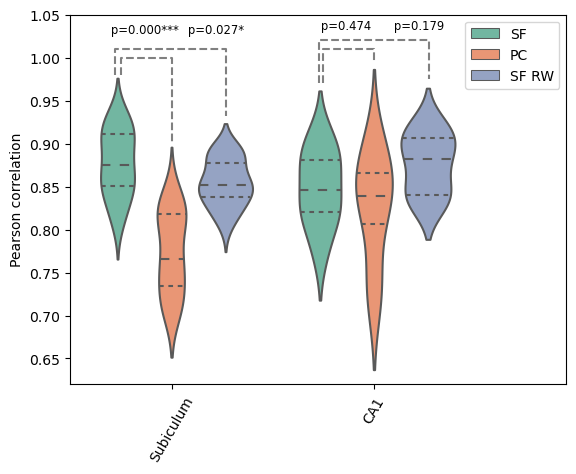

<Figure size 20000x800 with 0 Axes>

In [63]:
violin_data = pd.DataFrame({'Cells':
                ['Subiculum']*len(gio_v_sf_sander+rats_sub_v_sf_sander+colin_v_sf_sander)+
                ['Subiculum']*len(gio_v_pc_sander+rats_sub_v_pc_sander+colin_v_pc_sander) +
                ['Subiculum']*len(gio_v_rw + rats_sub_v_rw  + colin_v_rw) +

                ['CA1']*len(rats_ca1_v_sf_sander)+
                ['CA1']*len(rats_ca1_v_pc_sander) +
                ['CA1']*len(laurenz_ca1_v_rw) ,


        'correlation':  
                        gio_v_sf_sander + 
                                rats_sub_v_sf_sander+
                                        colin_v_sf_sander +

                        gio_v_pc_sander +
                                rats_sub_v_pc_sander+
                                        colin_v_pc_sander +

                        gio_v_rw+
                                rats_sub_v_rw+
                                       colin_v_rw + 

                        rats_ca1_v_sf_sander +
                                rats_ca1_v_pc_sander +
                                laurenz_ca1_v_rw ,


       'Comparison':    
                        ['SF']*len(gio_v_sf_sander+ rats_sub_v_sf_sander + colin_v_sf_sander) +
                        ['PC']*len(gio_v_pc_sander+ rats_sub_v_pc_sander + colin_v_pc_sander) +
                        ['SF RW']*len(gio_v_rw+ rats_sub_v_rw + colin_v_rw) +

                        ['SF']*len(rats_ca1_v_sf_sander)+
                        ['PC']*len(rats_ca1_v_pc_sander)+
                        ['SF RW'] * len(laurenz_ca1_v_rw) ,
                
                         })

sns.violinplot(data=violin_data, y='correlation', x='Cells', hue='Comparison', split=False, inner="quart", palette = "Set2")
#plt.text(-0.25, 0.65, "n={}".format(len(all_laurenz_ca1)), ha="left", va="top", size='small')
#plt.text(1.35, 0.65, "n={}".format(len(all_cells_gio)+len(all_laurenz_sub)+len(all_cells_colin)), ha="left", va="top",size='small')

plt.text(-0.3, 1.04, "p={:.3f}***".format(m2), ha="left", va="top", size='small', rotation=0)
plt.text(0.08, 1.04, "p={:.3f}*".format(m4), ha="left", va="top", size='small',rotation=0)
plt.text(0.74, 1.045, "p={:.3f}".format(m1), ha="left", va="top", size='small', rotation=0)
plt.text(1.1, 1.045, "p={:.3f}".format(m3), ha="left", va="top", size='small',rotation=0)

ypoints = np.array([0.98,1.0,1.0,0.9])
xpoints = np.array([-0.25,-0.25,0,0])
plt.plot(xpoints,ypoints, linestyle='--', color = 'grey')

ypoints1 = np.array([0.98,1.01,1.01,0.932])
xpoints1 = np.array([-0.28,-0.28,0.267,0.267])
plt.plot(xpoints1,ypoints1, linestyle='--', color = 'grey')

ypoints2 = np.array([0.97,1.01,1.01,0.996])
xpoints2 = np.array([0.75,0.75,1.0,1.0])
plt.plot(xpoints2,ypoints2, linestyle='--', color = 'grey')

ypoints3 = np.array([0.97,1.02,1.02,0.975])
xpoints3 = np.array([0.73,0.73,1.27,1.27])
plt.plot(xpoints3,ypoints3, linestyle='--', color = 'grey')

plt.xticks(rotation=60)
plt.xlabel('')
plt.ylabel('Pearson correlation')
plt.ylim([0.62,1.05])
plt.xlim([-0.5,1.95])

plt.legend(loc="upper right")
plt.figure(figsize=(200,8))


In [136]:
t_test_result2.confidence_interval(confidence_level=0.95)

ConfidenceInterval(low=0.25881785077947306, high=0.4476543404837048)

In [135]:
t_test_result2

TtestResult(statistic=8.082338223172853, pvalue=1.9986582256665764e-06, df=13)

In [388]:
#per Laurenz CA1 rat TO Gaussian
temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_27, 'two':av_over_cells_laurenz_gaussian_sf})
CA1_v_sfgaussian_27 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_32, 'two':av_over_cells_laurenz_gaussian_sf})
CA1_v_sfgaussian_32 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_44, 'two':av_over_cells_laurenz_gaussian_sf})
CA1_v_sfgaussian_44 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_45, 'two':av_over_cells_laurenz_gaussian_sf})
CA1_v_sfgaussian_45 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_76, 'two':av_over_cells_laurenz_gaussian_sf})
CA1_v_sfgaussian_76 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_661, 'two':av_over_cells_laurenz_gaussian_sf})
CA1_v_sfgaussian_661 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_673, 'two':av_over_cells_laurenz_gaussian_sf})
CA1_v_sfgaussian_673 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_678, 'two':av_over_cells_laurenz_gaussian_sf})
CA1_v_sfgaussian_678 = temp_df.corr().iloc[0,1]


rats_ca1_v_sf_gaussian = [CA1_v_sfgaussian_27,
               CA1_v_sfgaussian_32,CA1_v_sfgaussian_44, CA1_v_sfgaussian_45,CA1_v_sfgaussian_76, CA1_v_sfgaussian_661,
               CA1_v_sfgaussian_673,CA1_v_sfgaussian_678]

#Gaussian PC
temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_27, 'two':av_over_cells_laurenz_gaussian_pc})
CA1_v_sfgaussian_27 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_32, 'two':av_over_cells_laurenz_gaussian_pc})
CA1_v_sfgaussian_32 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_44, 'two':av_over_cells_laurenz_gaussian_pc})
CA1_v_sfgaussian_44 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_45, 'two':av_over_cells_laurenz_gaussian_pc})
CA1_v_sfgaussian_45 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_76, 'two':av_over_cells_laurenz_gaussian_pc})
CA1_v_sfgaussian_76 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_661, 'two':av_over_cells_laurenz_gaussian_pc})
CA1_v_sfgaussian_661 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_673, 'two':av_over_cells_laurenz_gaussian_pc})
CA1_v_sfgaussian_673 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_678, 'two':av_over_cells_laurenz_gaussian_pc})
CA1_v_sfgaussian_678 = temp_df.corr().iloc[0,1]


rats_ca1_v_pc_gaussian = [CA1_v_sfgaussian_27,
               CA1_v_sfgaussian_32,CA1_v_sfgaussian_44, CA1_v_sfgaussian_45,CA1_v_sfgaussian_76, CA1_v_sfgaussian_661,
               CA1_v_sfgaussian_673,CA1_v_sfgaussian_678]


In [389]:
#per Gio rat to Gaussian
temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4102Fa, 'two':av_over_cells_gio_gaussian_sf})
gio_v_sfgaussian_1 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4104a, 'two':av_over_cells_gio_gaussian_sf})
gio_v_sfgaussian_2 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4113Fa, 'two':av_over_cells_gio_gaussian_sf})
gio_v_sfgaussian_3 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4115a, 'two':av_over_cells_gio_gaussian_sf})
gio_v_sfgaussian_4 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4116a, 'two':av_over_cells_gio_gaussian_sf})
gio_v_sfgaussian_5 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4102Fa_2, 'two':av_over_cells_gio_gaussian_sf})
gio_v_sfgaussian_6 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4104a_2, 'two':av_over_cells_gio_gaussian_sf})
gio_v_sfgaussian_7 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4113Fa_2, 'two':av_over_cells_gio_gaussian_sf})
gio_v_sfgaussian_8 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4115a_2, 'two':av_over_cells_gio_gaussian_sf})
gio_v_sfgaussian_9 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4116a_2, 'two':av_over_cells_gio_gaussian_sf})
gio_v_sfgaussian_10 = temp_df.corr().iloc[0,1]


gio_v_sf_gaussian = [gio_v_sfgaussian_1, gio_v_sfgaussian_2,gio_v_sfgaussian_3,gio_v_sfgaussian_4,gio_v_sfgaussian_5,
                       gio_v_sfgaussian_6, gio_v_sfgaussian_7,gio_v_sfgaussian_8,gio_v_sfgaussian_9,gio_v_sfgaussian_10]
gio_v_sf_gaussian


#To Gaussian PC
temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4102Fa, 'two':av_over_cells_gio_gaussian_pc})
gio_v_sfgaussian_1 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4104a, 'two':av_over_cells_gio_gaussian_pc})
gio_v_sfgaussian_2 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4113Fa, 'two':av_over_cells_gio_gaussian_pc})
gio_v_sfgaussian_3 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4115a, 'two':av_over_cells_gio_gaussian_pc})
gio_v_sfgaussian_4 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4116a, 'two':av_over_cells_gio_gaussian_pc})
gio_v_sfgaussian_5 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4102Fa_2, 'two':av_over_cells_gio_gaussian_pc})
gio_v_sfgaussian_6 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4104a_2, 'two':av_over_cells_gio_gaussian_pc})
gio_v_sfgaussian_7 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4113Fa_2, 'two':av_over_cells_gio_gaussian_pc})
gio_v_sfgaussian_8 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4115a_2, 'two':av_over_cells_gio_gaussian_pc})
gio_v_sfgaussian_9 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4116a_2, 'two':av_over_cells_gio_gaussian_pc})
gio_v_sfgaussian_10 = temp_df.corr().iloc[0,1]


gio_v_pc_gaussian = [gio_v_sfgaussian_1, gio_v_sfgaussian_2,gio_v_sfgaussian_3,gio_v_sfgaussian_4,gio_v_sfgaussian_5,
                       gio_v_sfgaussian_6, gio_v_sfgaussian_7,gio_v_sfgaussian_8,gio_v_sfgaussian_9,gio_v_sfgaussian_10]
gio_v_pc_gaussian


#To Trad
temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4102Fa, 'two':av_over_cells_gio_trad})
gio_v_trad_1 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4104a, 'two':av_over_cells_gio_trad})
gio_v_trad_2 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4113Fa, 'two':av_over_cells_gio_trad})
gio_v_trad_3 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4115a, 'two':av_over_cells_gio_trad})
gio_v_trad_4 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4116a, 'two':av_over_cells_gio_trad})
gio_v_trad_5 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4102Fa_2, 'two':av_over_cells_gio_trad})
gio_v_trad_6 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4104a_2, 'two':av_over_cells_gio_trad})
gio_v_trad_7 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4113Fa_2, 'two':av_over_cells_gio_trad})
gio_v_trad_8 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4115a_2, 'two':av_over_cells_gio_trad})
gio_v_trad_9 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4116a_2, 'two':av_over_cells_gio_trad})
gio_v_trad_10 = temp_df.corr().iloc[0,1]


gio_v_trad = [gio_v_trad_1,gio_v_trad_2,gio_v_trad_3,gio_v_trad_4,gio_v_trad_5,gio_v_trad_6,gio_v_trad_7,gio_v_trad_8,gio_v_trad_9,gio_v_trad_10]



In [390]:
#per Colin rat To Gaussian
temp_df = pd.DataFrame({'one':av_over_cells_colin_all_1, 'two':av_over_cells_colin_gaussian_sf})
colin_v_sfgaussian_1 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_colin_all_2, 'two':av_over_cells_colin_gaussian_sf})
colin_v_sfgaussian_2 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_colin_all_3, 'two':av_over_cells_colin_gaussian_sf})
colin_v_sfgaussian_3 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_colin_all_4, 'two':av_over_cells_colin_gaussian_sf})
colin_v_sfgaussian_4 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_colin_all_5, 'two':av_over_cells_colin_gaussian_sf})
colin_v_sfgaussian_5 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_colin_all_6, 'two':av_over_cells_colin_gaussian_sf})
colin_v_sfgaussian_6 = temp_df.corr().iloc[0,1]


colin_v_sf_gaussian = [colin_v_sfgaussian_1,colin_v_sfgaussian_2,colin_v_sfgaussian_3,colin_v_sfgaussian_4,colin_v_sfgaussian_5,colin_v_sfgaussian_6]
colin_v_sf_gaussian


#To Gaussian PC
temp_df = pd.DataFrame({'one':av_over_cells_colin_all_1, 'two':av_over_cells_colin_gaussian_pc})
colin_v_sfgaussian_1 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_colin_all_2, 'two':av_over_cells_colin_gaussian_pc})
colin_v_sfgaussian_2 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_colin_all_3, 'two':av_over_cells_colin_gaussian_pc})
colin_v_sfgaussian_3 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_colin_all_4, 'two':av_over_cells_colin_gaussian_pc})
colin_v_sfgaussian_4 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_colin_all_5, 'two':av_over_cells_colin_gaussian_pc})
colin_v_sfgaussian_5 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_colin_all_6, 'two':av_over_cells_colin_gaussian_pc})
colin_v_sfgaussian_6 = temp_df.corr().iloc[0,1]


colin_v_pc_gaussian = [colin_v_sfgaussian_1,colin_v_sfgaussian_2,colin_v_sfgaussian_3,colin_v_sfgaussian_4,colin_v_sfgaussian_5,colin_v_sfgaussian_6]
colin_v_pc_gaussian

#To Trad
temp_df = pd.DataFrame({'one':av_over_cells_colin_all_1, 'two':av_over_cells_colin_trad})
colin_v_trad_1 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_colin_all_2, 'two':av_over_cells_colin_trad})
colin_v_trad_2 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_colin_all_3, 'two':av_over_cells_colin_trad})
colin_v_trad_3 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_colin_all_4, 'two':av_over_cells_colin_trad})
colin_v_trad_4 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_colin_all_5, 'two':av_over_cells_colin_trad})
colin_v_trad_5 = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_colin_all_6, 'two':av_over_cells_colin_trad})
colin_v_trad_6 = temp_df.corr().iloc[0,1]


colin_v_trad= [colin_v_trad_1,colin_v_trad_2,colin_v_trad_3,colin_v_trad_4,colin_v_trad_5,colin_v_trad_6]
colin_v_pc_gaussian

[0.8558633115073935,
 0.8285833441508141,
 0.8634969553085047,
 0.8358240630182641,
 0.843406624360348,
 0.8428012518740797]

In [391]:
#Laurenz Sub rat TO Gaussian
temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_372, 'two':av_over_cells_laurenz_gaussian_sf})
Sub_v_gaussian_372  = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_372_2, 'two':av_over_cells_laurenz_gaussian_sf})
Sub_v_gaussian_372_2  = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_373, 'two':av_over_cells_laurenz_gaussian_sf})
Sub_v_gaussian_373  = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_373_2, 'two':av_over_cells_laurenz_gaussian_sf})
Sub_v_gaussian_373_2  = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_375, 'two':av_over_cells_laurenz_gaussian_sf})
Sub_v_gaussian_375  = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_375_2, 'two':av_over_cells_laurenz_gaussian_sf})
Sub_v_gaussian_375_2  = temp_df.corr().iloc[0,1]


rats_sub_v_sf_gaussian = [Sub_v_gaussian_372, Sub_v_gaussian_372_2, Sub_v_gaussian_373 , Sub_v_gaussian_373_2 , Sub_v_gaussian_375 , Sub_v_gaussian_375_2]
rats_sub_v_sf_gaussian


# PC
temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_372, 'two':av_over_cells_laurenz_gaussian_pc})
Sub_v_gaussian_372  = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_372_2, 'two':av_over_cells_laurenz_gaussian_pc})
Sub_v_gaussian_372_2  = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_373, 'two':av_over_cells_laurenz_gaussian_pc})
Sub_v_gaussian_373  = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_373_2, 'two':av_over_cells_laurenz_gaussian_pc})
Sub_v_gaussian_373_2  = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_375, 'two':av_over_cells_laurenz_gaussian_pc})
Sub_v_gaussian_375  = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_375_2, 'two':av_over_cells_laurenz_gaussian_pc})
Sub_v_gaussian_375_2  = temp_df.corr().iloc[0,1]


rats_sub_v_pc_gaussian = [Sub_v_gaussian_372, Sub_v_gaussian_372_2, Sub_v_gaussian_373 , Sub_v_gaussian_373_2 , Sub_v_gaussian_375 , Sub_v_gaussian_375_2]
rats_sub_v_pc_gaussian

# Trad
temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_372, 'two':av_over_cells_laurenz_trad})
Sub_v_trad_372  = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_372_2, 'two':av_over_cells_laurenz_trad})
Sub_v_trad_372_2  = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_373, 'two':av_over_cells_laurenz_trad})
Sub_v_trad_373  = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_373_2, 'two':av_over_cells_laurenz_trad})
Sub_v_trad_373_2  = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_375, 'two':av_over_cells_laurenz_trad})
Sub_v_trad_375  = temp_df.corr().iloc[0,1]


temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_375_2, 'two':av_over_cells_laurenz_trad})
Sub_v_trad_375_2  = temp_df.corr().iloc[0,1]


rats_sub_v_trad = [Sub_v_trad_372,Sub_v_trad_372_2,Sub_v_trad_373,Sub_v_trad_373_2,Sub_v_trad_375,Sub_v_trad_375_2]
rats_sub_v_trad

[0.8134583451022568,
 0.8167348754061982,
 0.7265334684494003,
 0.716299371226037,
 0.7601419817252286,
 0.7531220860835369]

<Figure size 20000x800 with 0 Axes>

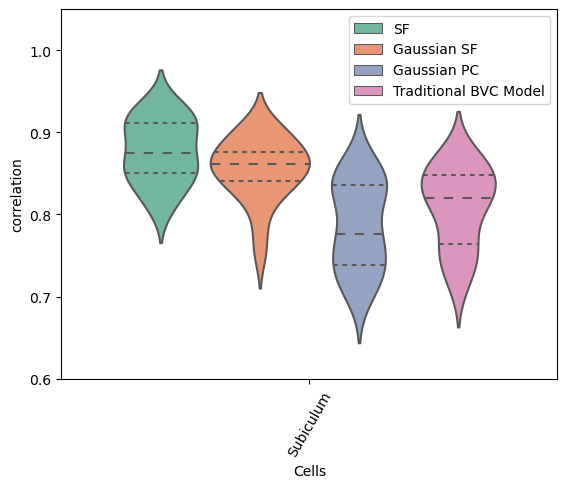

<Figure size 20000x800 with 0 Axes>

In [392]:
violin_data1 = pd.DataFrame({'Cells':
                ['Subiculum']* len(gio_v_sf_sander+rats_sub_v_sf_sander+colin_v_sf_sander)+
                ['Subiculum']*len(rats_sub_v_sf_gaussian + gio_v_sf_gaussian + colin_v_sf_gaussian)+
                ['Subiculum']*len(rats_sub_v_pc_gaussian + gio_v_pc_gaussian + colin_v_pc_gaussian)+
                #['Subiculum']*len(rats_sub_v_rw + gio_v_rw + colin_v_rw) +
                ['Subiculum']*len(rats_sub_v_trad + gio_v_trad + colin_v_trad) ,

        'correlation':  gio_v_sf_sander + rats_sub_v_sf_sander + colin_v_sf_sander +
                        rats_sub_v_sf_gaussian + gio_v_sf_gaussian + colin_v_sf_gaussian +
                        rats_sub_v_pc_gaussian + gio_v_pc_gaussian + colin_v_pc_gaussian +
                        #rats_sub_v_rw + gio_v_rw + colin_v_rw +
                        rats_sub_v_trad + gio_v_trad + colin_v_trad,

       'Comparison':    ['SF']* len(gio_v_sf_sander+rats_sub_v_sf_sander+colin_v_sf_sander)+
                        ['Gaussian SF']*len(rats_sub_v_sf_gaussian + gio_v_sf_gaussian + colin_v_sf_gaussian) +
                        ['Gaussian PC']*len(rats_sub_v_pc_gaussian + gio_v_pc_gaussian + colin_v_pc_gaussian) +
                        #['RW']*len(rats_sub_v_rw + gio_v_rw + colin_v_rw) +
                        ['Traditional BVC Model']*len(rats_sub_v_trad + gio_v_trad + colin_v_trad),          
                         })

sns.violinplot(data=violin_data1, y='correlation', x='Cells', hue='Comparison', split=False, inner="quart", palette = "Set2")
#plt.text(-0.25, 0.65, "n={}".format(len(all_laurenz_ca1)), ha="left", va="top", size='small')
#plt.text(0.7, 0.65, "n={}".format(len(all_cells_gio)+len(all_laurenz_sub)+len(all_cells_colin)), ha="left", va="top",size='small')

#plt.text(-0.25, 0.99, "p={:.3f}".format(m1), ha="left", va="top", size='small', rotation=10)
#plt.text(0.14, 1.045, "p={:.3f}".format(m3), ha="left", va="top", size='small',rotation=10)
#plt.text(0.74, 0.99, "p={:.3f}**".format(m2), ha="left", va="top", size='small', rotation=10)
#plt.text(1.1, 1.045, "p={:.3f}**".format(m4), ha="left", va="top", size='small',rotation=10)

#ypoints = np.array([0.93,1,1,0.95])
#xpoints = np.array([-0.27,-0.27,0,0])
#plt.plot(xpoints,ypoints, color = 'grey')

#ypoints1 = np.array([0.93,1.01,1.01,0.95])
#xpoints1 = np.array([-0.28,-0.28,0.267,0.267])
#plt.plot(xpoints1,ypoints1, color = 'grey')

#ypoints2 = np.array([0.97,1,1,0.85])
#xpoints2 = np.array([0.735,0.735,1.0,1.0])
#plt.plot(xpoints2,ypoints2, color = 'grey')

#ypoints3 = np.array([0.97,1.01,1.01,0.85])
#xpoints3 = np.array([0.72,0.72,1.27,1.27])
#plt.plot(xpoints3,ypoints3, color = 'grey')

plt.xticks(rotation=60)
plt.ylim([0.6,1.05])
#plt.xlim([-0.5,1.78])

plt.legend(loc="upper right")
plt.figure(figsize=(200,8))


### Laurenz Fits

##SF Sander

In [42]:
temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1, 'two':av_over_cells_wills_sf_sander}) 
CA1_v_sfsander = temp_df.corr().iloc[0,1]
print('Correlation between CA1 and Sander SFs {:.3f}'.format(CA1_v_sfsander))

Correlation between CA1 and Sander SFs 0.837


In [43]:
temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub, 'two':av_over_cells_wills_sf_sander})  
willsub_v_sfsander = temp_df.corr().iloc[0,1]
print('Correlation between Laurenz Sub and Sander SFs {:.3f}'.format(willsub_v_sfsander))

Correlation between Laurenz Sub and Sander SFs 0.755


In [49]:
temp_df = pd.DataFrame({'one':av_over_cells_laurenz_rw_sf, 'two':av_over_cells_wills_sf_sander})  
willsub_v_laurenzrw = temp_df.corr().iloc[0,1]
print('Correlation between Laurenz RW and Sander SFs {:.3f}'.format(willsub_v_laurenzrw))


Correlation between Laurenz RW and Sander SFs 0.367


In [50]:
temp_df = pd.DataFrame({'one':av_over_cells_trad, 'two':av_over_cells_wills_sf_sander})  
willsub_v_trad= temp_df.corr().iloc[0,1]
print('Correlation between Laurenz Sub and Trad {:.3f}'.format(willsub_v_trad))

Correlation between Laurenz Sub and Trad 0.524


In [116]:
temp_df = pd.DataFrame({'one':av_over_cells_gaussian_pc, 'two':av_over_cells_wills_sf_sander})  
willsub_v_gaussian_pc= temp_df.corr().iloc[0,1]
print('Correlation between Laurenz Sub and Gaussian PC {:.3f}'.format(willsub_v_gaussian_pc))

Correlation between Laurenz Sub and Gaussian PC 0.369


In [107]:
temp_df = pd.DataFrame({'one':av_over_cells_gaussian_sf, 'two':av_over_cells_wills_sf_sander})  
willsub_v_gaussian_sf= temp_df.corr().iloc[0,1]
print('Correlation between Laurenz Sub and Gaussian SF {:.3f}'.format(willsub_v_gaussian_sf))

Correlation between Laurenz Sub and Gaussian SF 0.677


In [106]:
temp_df = pd.DataFrame({'one':av_over_cells_willsec, 'two':av_over_cells_wills_sf_sander})  
willsec_v_sfsander = temp_df.corr().iloc[0,1]
print('Correlation between Wills EC and Sander SFs {:.3f}'.format(willsec_v_sfsander))

Correlation between Wills EC and Sander SFs 0.724


In [65]:
#per Laurenz CA1 rat
temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_27, 'two':av_over_cells_wills_sf_sander}) 
CA1_v_sfsander_27 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_32, 'two':av_over_cells_wills_sf_sander}) 
CA1_v_sfsander_32 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_44, 'two':av_over_cells_wills_sf_sander}) 
CA1_v_sfsander_44 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_45, 'two':av_over_cells_wills_sf_sander}) 
CA1_v_sfsander_45 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_76, 'two':av_over_cells_wills_sf_sander}) 
CA1_v_sfsander_76 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_661, 'two':av_over_cells_wills_sf_sander}) 
CA1_v_sfsander_661 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_673, 'two':av_over_cells_wills_sf_sander}) 
CA1_v_sfsander_673 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_678, 'two':av_over_cells_wills_sf_sander}) 
CA1_v_sfsander_678 = temp_df.corr().iloc[0,1]

rats_ca1_v_sf_sander = [CA1_v_sfsander_27,
                CA1_v_sfsander_32,CA1_v_sfsander_44, CA1_v_sfsander_45,CA1_v_sfsander_76, CA1_v_sfsander_661,
                CA1_v_sfsander_673,CA1_v_sfsander_678]
rats_ca1_v_sf_sander 

[0.7426625057074331,
 0.7428649670990038,
 0.7766993279431326,
 0.7921892541391652,
 0.7620230347315318,
 0.7878665310308006,
 0.7925370497884004,
 0.8399276447883821]

In [66]:
#per Laurenz Sub rat for Sander SF
temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_372, 'two':av_over_cells_wills_sf_sander}) 
Sub_v_sfsander_372  = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_372_2, 'two':av_over_cells_wills_sf_sander}) 
Sub_v_sfsander_372_2  = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_373, 'two':av_over_cells_wills_sf_sander}) 
Sub_v_sfsander_373  = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_373_2, 'two':av_over_cells_wills_sf_sander}) 
Sub_v_sfsander_373_2  = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_375, 'two':av_over_cells_wills_sf_sander}) 
Sub_v_sfsander_375  = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_375_2, 'two':av_over_cells_wills_sf_sander}) 
Sub_v_sfsander_375_2  = temp_df.corr().iloc[0,1]

rats_sub_v_sf_sander = Sub_v_sfsander_372 , Sub_v_sfsander_372_2, Sub_v_sfsander_373 , Sub_v_sfsander_373_2, Sub_v_sfsander_375, Sub_v_sfsander_375_2
rats_sub_v_sf_sander = list(rats_sub_v_sf_sander)
rats_sub_v_sf_sander

[0.7684827082524334,
 0.7700261735124582,
 0.7050290021667056,
 0.6706905510597679,
 0.7601665342293211,
 0.7573361618400193]

In [83]:
#per Laurenz BVC rat for RW
temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_372, 'two':av_over_cells_laurenz_rw_sf}) 
rw_v_sfsander_372  = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_373, 'two':av_over_cells_laurenz_rw_sf}) 
rw_v_sfsander_373  = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_375, 'two':av_over_cells_laurenz_rw_sf}) 
rw_v_sfsander_375  = temp_df.corr().iloc[0,1]

rats_sub_v_rw = [rw_v_sfsander_372 ,rw_v_sfsander_373 ,rw_v_sfsander_375]
rats_sub_v_rw = list(rats_sub_v_rw)
rats_sub_v_rw

[0.5850759648951255, 0.4887707871707161, 0.5388609401054253]

In [84]:
#per Laurenz BVC rat for Trad
temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_372, 'two':av_over_cells_trad}) 
trad_v_sfsander_372  = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_373, 'two':av_over_cells_trad}) 
trad_v_sfsander_373  = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_375, 'two':av_over_cells_trad}) 
trad_v_sfsander_375  = temp_df.corr().iloc[0,1]

rats_sub_v_trad = [rw_v_sfsander_372 ,rw_v_sfsander_373 ,rw_v_sfsander_375]
rats_sub_v_trad = list(rats_sub_v_trad)
rats_sub_v_trad

[0.5850759648951255, 0.4887707871707161, 0.5388609401054253]

In [118]:
#per Laurenz BVC rat for Gaussian PC
temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_372, 'two':av_over_cells_gaussian_pc}) 
gaussian_pc_v_sfsander_372  = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_373, 'two':av_over_cells_gaussian_pc}) 
gaussian_pc_v_sfsander_373  = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_375, 'two':av_over_cells_gaussian_pc}) 
gaussian_pc_v_sfsander_375  = temp_df.corr().iloc[0,1]

rats_sub_v_gaussian_pc = [gaussian_pc_v_sfsander_372 ,gaussian_pc_v_sfsander_373 ,gaussian_pc_v_sfsander_375]
rats_sub_v_gaussian_pc = list(rats_sub_v_gaussian_pc)
rats_sub_v_gaussian_pc

[0.6977423621378204, 0.5630298493191291, 0.5432915069145104]

In [124]:
#per Laurenz BVC rat for Gaussian SF
temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_372, 'two':av_over_cells_gaussian_sf}) 
gaussian_sf_v_sfsander_372  = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_373, 'two':av_over_cells_gaussian_sf}) 
gaussian_sf_v_sfsander_373  = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_375, 'two':av_over_cells_gaussian_sf}) 
gaussian_sf_v_sfsander_375  = temp_df.corr().iloc[0,1]

rats_sub_v_gaussian_sf = [gaussian_sf_v_sfsander_372 ,gaussian_sf_v_sfsander_373 ,gaussian_sf_v_sfsander_375]
rats_sub_v_gaussian_sf = list(rats_sub_v_gaussian_sf)
rats_sub_v_gaussian_sf

[0.8536095045259442, 0.8389651594971967, 0.855552355044204]

##Fit to Sander Biological PC

In [70]:
temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1, 'two':av_over_cells_wills_pc_sander}) 
CA1_v_pcsander = temp_df.corr().iloc[0,1]
print('Correlation between Laurenz CA1 and Sander PCs {:.3f}'.format(CA1_v_pcsander))

Correlation between Laurenz CA1 and Sander PCs 0.720


In [45]:
temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub, 'two':av_over_cells_wills_pc_sander})  
willsub_v_pcsander = temp_df.corr().iloc[0,1]
print('Correlation between Laurenz Sub and Sander PCs {:.3f}'.format(willsub_v_pcsander))

Correlation between Laurenz Sub and Sander PCs 0.713


In [71]:
temp_df = pd.DataFrame({'one':av_over_cells_gio_all, 'two':av_over_cells_wills_pc_sander}) 
gio_v_sanderpc = temp_df.corr().iloc[0,1]
print('correlation between Gio and Sander PCs {:.3f}'.format(gio_v_sanderpc))

correlation between Gio and Sander PCs 0.764


In [72]:
temp_df = pd.DataFrame({'one':av_over_cells_willsall, 'two':av_over_cells_wills_pc_sander})
willsall_v_pcsander= temp_df.corr().iloc[0,1]
print('correlation between All Wills and Sander PCs {:.3f}'.format(willsall_v_pcsander))

NameError: name 'av_over_cells_willsall' is not defined

In [73]:
temp_df = pd.DataFrame({'one':av_over_cells_willsec, 'two':av_over_cells_wills_pc_sander})  
willsec_v_pcsander = temp_df.corr().iloc[0,1]
print('Correlation between Wills EC and Sander PCs {:.3f}'.format(willsec_v_pcsander))

Correlation between Wills EC and Sander PCs 0.596


In [67]:
#per CA1 rat
temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_27, 'two':av_over_cells_wills_pc_sander}) 
CA1_v_pcsander_27 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_32, 'two':av_over_cells_wills_pc_sander}) 
CA1_v_pcsander_32 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_44, 'two':av_over_cells_wills_pc_sander}) 
CA1_v_pcsander_44 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_45, 'two':av_over_cells_wills_pc_sander}) 
CA1_v_pcsander_45 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_76, 'two':av_over_cells_wills_pc_sander}) 
CA1_v_pcsander_76 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_661, 'two':av_over_cells_wills_pc_sander}) 
CA1_v_pcsander_661 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_673, 'two':av_over_cells_wills_pc_sander}) 
CA1_v_pcsander_673 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1_678, 'two':av_over_cells_wills_pc_sander}) 
CA1_v_pcsander_678 = temp_df.corr().iloc[0,1]

rats_ca1_v_pc_sander = [CA1_v_pcsander_27,CA1_v_pcsander_32,CA1_v_pcsander_44,CA1_v_pcsander_45,CA1_v_pcsander_76,CA1_v_pcsander_661,
                CA1_v_pcsander_673,CA1_v_pcsander_678]
rats_ca1_v_pc_sander 

[0.8505159697704651,
 0.7965722708069224,
 0.8307028327623655,
 0.836742067004758,
 0.710594561583877,
 0.8218379215716007,
 0.8080526533956885,
 0.8659163268617949]

In [68]:
#per Laurenz Sub rat
temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_372, 'two':av_over_cells_wills_pc_sander}) 
Sub_v_pcsander_372  = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_372_2, 'two':av_over_cells_wills_pc_sander}) 
Sub_v_pcsander_372_2  = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_373, 'two':av_over_cells_wills_pc_sander}) 
Sub_v_pcsander_373  = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_373_2, 'two':av_over_cells_wills_pc_sander}) 
Sub_v_pcsander_373_2  = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_375, 'two':av_over_cells_wills_pc_sander}) 
Sub_v_pcsander_375  = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_laurenz_sub_375_2, 'two':av_over_cells_wills_pc_sander}) 
Sub_v_pcsander_375_2  = temp_df.corr().iloc[0,1]

rats_sub_v_pc_sander = Sub_v_pcsander_372 , Sub_v_pcsander_372_2, Sub_v_pcsander_373, Sub_v_pcsander_373_2, Sub_v_pcsander_375, Sub_v_pcsander_375_2
rats_sub_v_pc_sander = list(rats_sub_v_pc_sander)
rats_sub_v_pc_sander

[0.8061609368438842,
 0.812951243425308,
 0.7114540617200934,
 0.6971509636865959,
 0.7564471385499789,
 0.7493442530573892]

### Colin Fits

In [176]:
temp_df = pd.DataFrame({'one':av_over_cells_colin_all, 'two':av_over_cells_colin_sf}) 
colin_v_colinsf = temp_df.corr().iloc[0,1]
print('correlation between Colin and Colin SFs {:.3f}'.format(colin_v_colinsf))

correlation between Colin and Colin SFs 0.827


In [177]:
temp_df = pd.DataFrame({'one':av_over_cells_colin_all, 'two':av_over_cells_colin_pc}) 
colin_v_colinpc = temp_df.corr().iloc[0,1]
print('correlation between Colin and Colin PCs {:.3f}'.format(colin_v_colinpc))

correlation between Colin and Colin PCs 0.763


In [201]:
#per Colin rat
temp_df = pd.DataFrame({'one':av_over_cells_colin_all_1, 'two':av_over_cells_colin_pc}) 
colin_v_pcsander_1 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_colin_all_2, 'two':av_over_cells_colin_pc}) 
colin_v_pcsander_2 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_colin_all_3, 'two':av_over_cells_colin_pc}) 
colin_v_pcsander_3 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_colin_all_4, 'two':av_over_cells_colin_pc}) 
colin_v_pcsander_4 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_colin_all_5, 'two':av_over_cells_colin_pc}) 
colin_v_pcsander_5 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_colin_all_6, 'two':av_over_cells_colin_pc}) 
colin_v_pcsander_6 = temp_df.corr().iloc[0,1]

colin_v_pc_sander = [colin_v_pcsander_1,colin_v_pcsander_2,colin_v_pcsander_3,colin_v_pcsander_4,colin_v_pcsander_5,colin_v_pcsander_6]
colin_v_pc_sander


[0.7690621609202679,
 0.7188974826467053,
 0.7554274128086829,
 0.7449588463007345,
 nan,
 0.7407394210670418]

In [202]:
#per Colin rat
temp_df = pd.DataFrame({'one':av_over_cells_colin_all_1, 'two':av_over_cells_colin_sf}) 
colin_v_sfsander_1 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_colin_all_2, 'two':av_over_cells_colin_sf}) 
colin_v_sfsander_2 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_colin_all_3, 'two':av_over_cells_colin_sf}) 
colin_v_sfsander_3 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_colin_all_4, 'two':av_over_cells_colin_sf}) 
colin_v_sfsander_4 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_colin_all_5, 'two':av_over_cells_colin_sf}) 
colin_v_sfsander_5 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_colin_all_6, 'two':av_over_cells_colin_sf}) 
colin_v_sfsander_6 = temp_df.corr().iloc[0,1]

colin_v_sf_sander = [colin_v_sfsander_1,colin_v_sfsander_2,colin_v_sfsander_3,colin_v_sfsander_4,colin_v_sfsander_5,colin_v_sfsander_6]
colin_v_sf_sander

[0.8228140834533476,
 0.8276616067913974,
 0.7021509126591453,
 0.8414762147214119,
 nan,
 0.8240657757590855]

### Gio Fits

In [59]:
temp_df = pd.DataFrame({'one':av_over_cells_gio_all, 'two':av_over_cells_gio_sf}) 
gio_v_giosf = temp_df.corr().iloc[0,1]
print('correlation between Gio and Gio SFs {:.3f}'.format(gio_v_giosf))

correlation between Gio and Gio SFs 0.768


In [60]:
temp_df = pd.DataFrame({'one':av_over_cells_gio_all, 'two':av_over_cells_gio_pc}) 
gio_v_giopc = temp_df.corr().iloc[0,1]
print('correlation between Gio and Gio PCs {:.3f}'.format(gio_v_giopc))

correlation between Gio and Gio PCs 0.724


In [62]:
temp_df = pd.DataFrame({'one':av_over_cells_laurenz_ca1, 'two':av_over_cells_wills_pc_sander}) 
gio_v_giopc = temp_df.corr().iloc[0,1]
print('correlation between CA1 and small PCs {:.3f}'.format(gio_v_giopc))

correlation between CA1 and small PCs 0.847


In [63]:
temp_df = pd.DataFrame({'one':av_over_cells_gio_all, 'two':av_over_cells_wills_pc_sander}) 
gio_v_giopc = temp_df.corr().iloc[0,1]
print('correlation between Gio and small PCs {:.3f}'.format(gio_v_giopc))

correlation between Gio and small PCs 0.836


In [440]:
#per Gio rat
temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4102Fa, 'two':av_over_cells_gio_pc}) 
gio_v_pcsander_1 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4104a, 'two':av_over_cells_gio_pc}) 
gio_v_pcsander_2 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4113Fa, 'two':av_over_cells_gio_pc}) 
gio_v_pcsander_3 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4115a, 'two':av_over_cells_gio_pc}) 
gio_v_pcsander_4 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4116a, 'two':av_over_cells_gio_pc}) 
gio_v_pcsander_5 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4102Fa, 'two':av_over_cells_gio_pc}) 
gio_v_pcsander_6 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4104a_2, 'two':av_over_cells_gio_pc}) 
gio_v_pcsander_7 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4113Fa_2, 'two':av_over_cells_gio_pc}) 
gio_v_pcsander_8 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4115a_2, 'two':av_over_cells_gio_pc}) 
gio_v_pcsander_9 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4116a_2, 'two':av_over_cells_gio_pc}) 
gio_v_pcsander_10 = temp_df.corr().iloc[0,1]


gio_v_pc_sander = [gio_v_pcsander_1, gio_v_pcsander_2,gio_v_pcsander_3,gio_v_pcsander_4,gio_v_pcsander_5,
                        gio_v_pcsander_6, gio_v_pcsander_7,gio_v_pcsander_8,gio_v_pcsander_9,gio_v_pcsander_10]
gio_v_pc_sander 

[0.8069811818645016,
 nan,
 0.7408434373693057,
 nan,
 0.7028201245805888,
 0.8069811818645016,
 0.8113338369310639,
 0.7097670603729002,
 0.7545374758310809,
 nan]

In [441]:
#per Gio rat
temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4102Fa, 'two':av_over_cells_gio_sf}) 
gio_v_sfsander_1 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4104a, 'two':av_over_cells_gio_sf}) 
gio_v_sfsander_2 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4113Fa, 'two':av_over_cells_gio_sf}) 
gio_v_sfsander_3 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4115a, 'two':av_over_cells_gio_sf}) 
gio_v_sfsander_4 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4116a, 'two':av_over_cells_gio_sf}) 
gio_v_sfsander_5 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4102Fa_2, 'two':av_over_cells_gio_sf}) 
gio_v_sfsander_6 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4104a_2, 'two':av_over_cells_gio_sf}) 
gio_v_sfsander_7 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4113Fa_2, 'two':av_over_cells_gio_sf}) 
gio_v_sfsander_8 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4115a_2, 'two':av_over_cells_gio_sf}) 
gio_v_sfsander_9 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4116a_2, 'two':av_over_cells_gio_sf}) 
gio_v_sfsander_10 = temp_df.corr().iloc[0,1]

gio_v_sf_sander = [gio_v_sfsander_1, gio_v_sfsander_2,gio_v_sfsander_3,gio_v_sfsander_4,gio_v_sfsander_5,
                        gio_v_sfsander_6, gio_v_sfsander_7,gio_v_sfsander_8,gio_v_sfsander_9,gio_v_sfsander_10]
gio_v_sf_sander 

[0.8246892273251363,
 nan,
 0.8220477440962068,
 nan,
 0.8304349752845706,
 0.8154685177892722,
 0.7752204771751015,
 0.8283828817421993,
 0.8286203869622147,
 nan]

In [501]:
#per Gio rat Gaussian PC
temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4102Fa, 'two':av_over_cells_gio_gaussian_pc}) 
gio_v_gaussian_pc_1 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4104a, 'two':av_over_cells_gio_gaussian_pc}) 
gio_v_gaussian_pc_2 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4113Fa, 'two':av_over_cells_gio_gaussian_pc}) 
gio_v_gaussian_pc_3 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4115a, 'two':av_over_cells_gio_gaussian_pc}) 
gio_v_gaussian_pc_4 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4116a, 'two':av_over_cells_gio_gaussian_pc}) 
gio_v_gaussian_pc_5 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4102Fa_2, 'two':av_over_cells_gio_gaussian_pc}) 
gio_v_gaussian_pc_6 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4104a_2, 'two':av_over_cells_gio_gaussian_pc}) 
gio_v_gaussian_pc_7 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4113Fa_2, 'two':av_over_cells_gio_gaussian_pc}) 
gio_v_gaussian_pc_8 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4115a_2, 'two':av_over_cells_gio_gaussian_pc}) 
gio_v_gaussian_pc_9 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4116a_2, 'two':av_over_cells_gio_gaussian_pc}) 
gio_v_gaussian_pc_10 = temp_df.corr().iloc[0,1]

gio_v_gaussian_pc = [gio_v_gaussian_pc_1,gio_v_gaussian_pc_2,gio_v_gaussian_pc_3,gio_v_gaussian_pc_4,gio_v_gaussian_pc_5,
                    gio_v_gaussian_pc_6,gio_v_gaussian_pc_7,gio_v_gaussian_pc_8,gio_v_gaussian_pc_9,gio_v_gaussian_pc_10]
gio_v_gaussian_pc 

[0.7971942890726609,
 nan,
 0.7338501008723717,
 nan,
 0.6936230626731037,
 0.7790988836560048,
 0.8022686925729562,
 0.691916728081119,
 0.7400712314678182,
 nan]

In [531]:
#per Gio rat Gaussian SF
temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4102Fa, 'two':av_over_cells_gio_gaussian_sf}) 
gio_v_gaussian_sf_1 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4104a, 'two':av_over_cells_gio_gaussian_sf}) 
gio_v_gaussian_sf_2 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4113Fa, 'two':av_over_cells_gio_gaussian_sf}) 
gio_v_gaussian_sf_3 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4115a, 'two':av_over_cells_gio_gaussian_sf}) 
gio_v_gaussian_sf_4 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4116a, 'two':av_over_cells_gio_gaussian_sf}) 
gio_v_gaussian_sf_5 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4102Fa_2, 'two':av_over_cells_gio_gaussian_sf}) 
gio_v_gaussian_sf_6 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4104a_2, 'two':av_over_cells_gio_gaussian_sf}) 
gio_v_gaussian_sf_7 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4113Fa_2, 'two':av_over_cells_gio_gaussian_sf}) 
gio_v_gaussian_sf_8 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4115a_2, 'two':av_over_cells_gio_gaussian_sf}) 
gio_v_gaussian_sf_9 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4116a_2, 'two':av_over_cells_gio_gaussian_sf}) 
gio_v_gaussian_sf_10 = temp_df.corr().iloc[0,1]

gio_v_gaussian_sf = [gio_v_gaussian_sf_1,gio_v_gaussian_sf_2,gio_v_gaussian_sf_3,gio_v_gaussian_sf_4,gio_v_gaussian_sf_5,
                    gio_v_gaussian_sf_6,gio_v_gaussian_sf_7,gio_v_gaussian_sf_8,gio_v_gaussian_sf_9,gio_v_gaussian_sf_10]
gio_v_gaussian_sf 

[0.7411630378520472,
 nan,
 0.762667197858334,
 nan,
 0.7378510201062688,
 0.7545718207617466,
 0.7225343963769749,
 0.7907874353209203,
 0.7885504678125332,
 nan]

In [496]:
## Gio Random Walk

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4102Fa, 'two':av_over_cells_gio_rw}) 
gio_v_rw_1 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4104a, 'two':av_over_cells_gio_rw}) 
gio_v_rw_2 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4113Fa, 'two':av_over_cells_gio_rw}) 
gio_v_rw_3 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4115a, 'two':av_over_cells_gio_rw}) 
gio_v_rw_4 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4116a, 'two':av_over_cells_gio_rw}) 
gio_v_rw_5 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4102Fa, 'two':av_over_cells_gio_rw}) 
gio_v_rw_6 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4104a_2, 'two':av_over_cells_gio_rw}) 
gio_v_rw_7 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4113Fa_2, 'two':av_over_cells_gio_rw}) 
gio_v_rw_8 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4115a_2, 'two':av_over_cells_gio_rw}) 
gio_v_rw_9 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4116a_2, 'two':av_over_cells_gio_rw}) 
gio_v_rw_10 = temp_df.corr().iloc[0,1]


gio_v_rw = [gio_v_rw_1, gio_v_rw_2,gio_v_rw_3,gio_v_rw_4,gio_v_rw_5,
                        gio_v_rw_6, gio_v_rw_7,gio_v_rw_8,gio_v_rw_9,gio_v_rw_10]
gio_v_rw 

[0.7090381207135781,
 nan,
 0.7026308027468686,
 nan,
 0.6222830710494835,
 0.7090381207135781,
 0.6882027079408978,
 0.6366170804884801,
 0.7034112047639935,
 nan]

In [511]:
## Gio Trad

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4102Fa, 'two':av_over_cells_gio_trad}) 
gio_v_trad_1 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4104a, 'two':av_over_cells_gio_trad}) 
gio_v_trad_2 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4113Fa, 'two':av_over_cells_gio_trad}) 
gio_v_trad_3 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4115a, 'two':av_over_cells_gio_trad}) 
gio_v_trad_4 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4116a, 'two':av_over_cells_gio_trad}) 
gio_v_trad_5 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4102Fa, 'two':av_over_cells_gio_trad}) 
gio_v_trad_6 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4104a_2, 'two':av_over_cells_gio_trad}) 
gio_v_trad_7 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4113Fa_2, 'two':av_over_cells_gio_trad}) 
gio_v_trad_8 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4115a_2, 'two':av_over_cells_gio_trad}) 
gio_v_trad_9 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4116a_2, 'two':av_over_cells_gio_trad}) 
gio_v_trad_10 = temp_df.corr().iloc[0,1]


gio_v_trad = [gio_v_trad_1, gio_v_trad_2,gio_v_trad_3,gio_v_trad_4,gio_v_trad_5,
                        gio_v_trad_6, gio_v_trad_7,gio_v_trad_8,gio_v_trad_9,gio_v_trad_10]
gio_v_trad

[0.8043361480421868,
 nan,
 0.742972022325635,
 nan,
 0.6896148343793231,
 0.8043361480421868,
 0.8245691985139129,
 0.7062743452010724,
 0.7706266025896427,
 nan]

In [513]:
## Gio to CA1

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4102Fa, 'two':av_over_cells_laurenz_ca1}) 
gio_v_ca1_1 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4104a, 'two':av_over_cells_laurenz_ca1}) 
gio_v_ca1_2 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4113Fa, 'two':av_over_cells_laurenz_ca1}) 
gio_v_ca1_3 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4115a, 'two':av_over_cells_laurenz_ca1}) 
gio_v_ca1_4 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4116a, 'two':av_over_cells_laurenz_ca1}) 
gio_v_ca1_5 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4102Fa, 'two':av_over_cells_laurenz_ca1}) 
gio_v_ca1_6 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4104a_2, 'two':av_over_cells_laurenz_ca1}) 
gio_v_ca1_7 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4113Fa_2, 'two':av_over_cells_laurenz_ca1}) 
gio_v_ca1_8 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4115a_2, 'two':av_over_cells_laurenz_ca1}) 
gio_v_ca1_9 = temp_df.corr().iloc[0,1]

temp_df = pd.DataFrame({'one':av_over_cells_gio_all_1_M4116a_2, 'two':av_over_cells_laurenz_ca1}) 
gio_v_ca1_10 = temp_df.corr().iloc[0,1]


gio_v_ca1 = [gio_v_ca1_1, gio_v_ca1_2,gio_v_ca1_3,gio_v_ca1_4,gio_v_ca1_5,
                        gio_v_ca1_6, gio_v_ca1_7,gio_v_ca1_8,gio_v_ca1_9,gio_v_ca1_10]
gio_v_ca1

[0.9804773708042892,
 nan,
 0.963671479764787,
 nan,
 0.9629589184839419,
 0.9804773708042892,
 0.9428748607784602,
 0.9616676042261693,
 0.9678121009552898,
 nan]

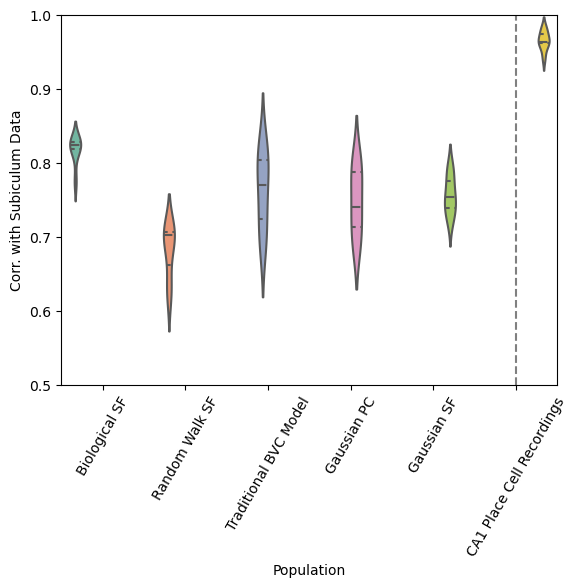

In [552]:
# Appendix Violin Plot
violin_data = pd.DataFrame({'Population':

                ['Biological SF']*len(gio_v_sf_sander )+

                ['Random Walk SF']*len(gio_v_rw) +
                
                ['Traditional BVC Model']*len(gio_v_trad) +

                ['Gaussian PC']*len(gio_v_gaussian_pc) +
                
                ['Gaussian SF']*len(gio_v_gaussian_sf) +

                ['CA1 Place Cell Recordings']* len(gio_v_ca1), 


        'Corr. with Subiculum Data':  gio_v_sf_sander  +
                   
                        gio_v_rw +
                        
                        gio_v_trad +

                        gio_v_gaussian_pc+
                        
                        gio_v_gaussian_sf +
                        
                        gio_v_ca1,
                        
       'Comparison with Subiculum data   ':   
                        ['SF']*len(gio_v_sf_sander) + 
                        ['Random Walk SF']*len(gio_v_rw) +
                        ['Traditional BVC model']*len(gio_v_trad) +
                        ['Gaussian PC']*len(gio_v_gaussian_pc) +
                        ['Gaussian SF']*len(gio_v_gaussian_sf) +
                        ['CA1 Place Cell Recordings']*len(gio_v_ca1)
                         })

sns.violinplot(data=violin_data, y='Corr. with Subiculum Data', x='Population', hue='Comparison with Subiculum data   ', inner="quart", palette = "Set2")
plt.xticks(rotation=60)
plt.ylim([0.5,1])
plt.axvline(5,color='grey', linestyle='--')
#plt.text(0.1, 0.55, "n=671", ha="left", va="top", size='small')
#plt.legend(loc='lower right')
plt.legend([],[], frameon=False)

In [395]:
t_test_result

TtestResult(statistic=-7.138817427098369, pvalue=0.0003806101782543293, df=6)

### Violin Plots

Text(2.1, 0.55, 'n=146')

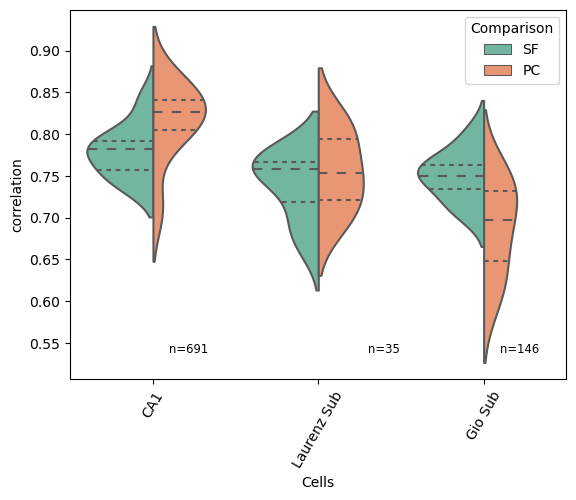

In [69]:
violin_data = pd.DataFrame({'Cells':
                ['CA1']*len(rats_ca1_v_sf_sander)+
                ['CA1']*len(rats_ca1_v_pc_sander) +

                ['Laurenz Sub']*len(rats_sub_v_sf_sander)+
                ['Laurenz Sub']*len(rats_sub_v_pc_sander) +

                ['Gio Sub']*len(gio_v_sf_sander)+
                ['Gio Sub']*len(gio_v_pc_sander) , 


        'correlation':  rats_ca1_v_sf_sander +
                        rats_ca1_v_pc_sander +

                        rats_sub_v_sf_sander +
                        rats_sub_v_pc_sander +

                        gio_v_sf_sander+
                        gio_v_pc_sander,
        
                        
                        
       'Comparison':    ['SF']*len(rats_ca1_v_sf_sander)+
                        ['PC']*len(rats_ca1_v_pc_sander)+

                        ['SF']*len(rats_sub_v_sf_sander) + 
                        ['PC']*len(rats_sub_v_pc_sander) +

                        ['SF']*len(gio_v_sf_sander) +
                        ['PC']*len(gio_v_pc_sander) 

                
                         })

sns.violinplot(data=violin_data, y='correlation', x='Cells', hue='Comparison', split=True, inner="quart", palette = "Set2")
plt.xticks(rotation=60)
plt.text(0.1, 0.55, "n={}".format(len(all_laurenz_ca1)), ha="left", va="top", size='small')
plt.text(1.3, 0.55, "n={}".format(len(all_laurenz_sub)), ha="left", va="top",size='small')
plt.text(2.1, 0.55, "n={}".format(len(all_cells_gio)), ha="left", va="top",size='small')

In [345]:
# Appendix Violin Plot
violin_data = pd.DataFrame({'Cells':

                ['Biological SF']*len(rats_sub_v_sf_sander)+

                ['Random Walk SF']*len(rats_sub_v_rw) +
                
                ['Traditional BVC Model']*len(rats_sub_v_trad) +

                ['Gaussian PC']*len(rats_sub_v_gaussian_pc) +
                
                ['Gaussian SF']*len(rats_sub_v_gaussian_sf) , 


        'correlation':  rats_sub_v_sf_sander +
                   
                        rats_sub_v_rw +
                        
                        rats_sub_v_trad +

                        rats_sub_v_gaussian_pc +
                        
                        rats_sub_v_gaussian_sf ,
                        
       'Comparison with Subiculum Dataset 1':   
                        ['SF']*len(rats_sub_v_sf_sander) + 
                        ['Random Walk SF']*len(rats_sub_v_rw) +
                        ['Traditional BVC model']*len(rats_sub_v_trad) +
                        ['Gaussian PC']*len(rats_sub_v_gaussian_pc) +
                        ['Gaussian SF']*len(rats_sub_v_gaussian_sf)
                         })

sns.violinplot(data=violin_data, y='correlation', x='Cells', hue='Comparison with Subiculum Dataset 1', inner="quart", palette = "Set2")
plt.xticks(rotation=60)
#plt.text(0.1, 0.55, "n=671", ha="left", va="top", size='small')
#plt.text(1.3, 0.55, "n=153", ha="left", va="top",size='small')
#plt.text(2.1, 0.55, "n=1426", ha="left", va="top",size='small')

NameError: name 'rats_sub_v_rw' is not defined

In [42]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('correlation ~ C(Cells) + C(Comparison) + C(Cells):C(Comparison)', data=violin_data).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Cells),0.176146,2.0,49.711931,2.922438e-09
C(Comparison),0.075322,1.0,42.514726,9.616626e-07
C(Cells):C(Comparison),0.035418,2.0,9.995722,6.952104e-04
Residual,0.042520,24.0,NaN,NaN


In [43]:
from scipy.stats import f_oneway
f_oneway(rats_ca1_v_pc_sander, rats_sub_v_pc_sander)

F_onewayResult(statistic=8.927982082181698, pvalue=0.01738762037865298)

# Behavioural Skew (Figure 3)

### Viewing individual cell

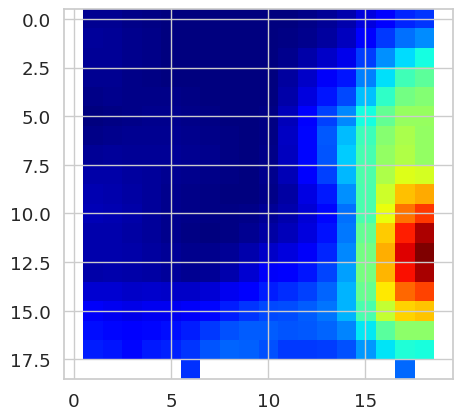

In [19]:
#label_ = all_[1]             #M4102Fa 69
sns.reset_orig
matplotlib.rc_file_defaults
#label_ = 'Rat_372_Sub_row_7_col_2_cell_12.csv'  

ratemap=pd.read_csv('/home/lauren/Comparing_BVC_Trad/55.Gio_data/Trial_1/M4102Fa/Gio_M4102Fa_cell_69_trial_1.csv', header=None)
#ratemap = pd.read_csv('/home/lauren/Comparing_BVC_Trad/53.Laurenz_sub_new_meantrate_width/Trial_2/Rat_Sub_rat_372_row_3_trial_2_cell_6.csv', header=None)
#ratemap = pd.read_csv('/home/lauren/Comparing_BVC_Trad/53.Laurenz_CA1_new_morefilt_trial/Trial_1/Rat_678/Rat_CA1_rat_678_row_11_trial_1_cell_24.csv', header=None)
plt.imshow(ratemap, cmap='jet')

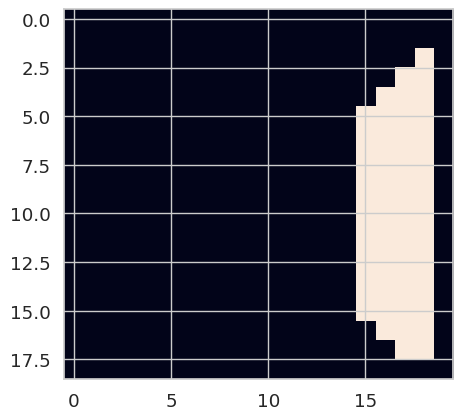

In [20]:
#with nans
ratemap1 = ratemap.to_numpy()
flat_rm_nan = ratemap1.flatten()
z_rm = stats.zscore(flat_rm_nan, nan_policy='omit')
z_rm = z_rm.reshape([ratemap1.shape[0],ratemap1.shape[1]])
z_rm[z_rm <1]=0

#without nans
ratemap2 = ratemap.to_numpy()
ratemap2[np.isnan(ratemap2)]=0
flat_rm_nonan = ratemap2.flatten()
z_rm_nonan = stats.zscore(flat_rm_nonan, nan_policy='omit')
z_rm_nonan = z_rm_nonan.reshape([ratemap2.shape[0],ratemap2.shape[1]])
z_rm_nonan[z_rm_nonan <1]=0    

#without nans
img_nonan = Image.fromarray(z_rm_nonan)
labeled, nr_objects = ndimage.label(img_nonan) 

plt.imshow(labeled)

In [21]:
breaks = []
breaks2 = []
breaks3 = []
breaks5 = []
rats=[]
orientations=[]
cells=[]
area_number = []
whole_flat = []
trials=[]
biases = []
datset = []
reg = []
datasets = []
dataset = []
collapsed_trials = []
coll_axis = []
behav_axis = []
centroids = []
individual_trial_skew = []
coms = []
masked_rm = []
maxs = []
rm_flat=[]
speed_filter = 0.0001

rats_1 = 'M4102Fa'
trials_1 = 2

ratemap=pd.read_csv('/home/lauren/Comparing_BVC_Trad/55.Gio_data/Trial_1/M4102Fa/Gio_M4102Fa_cell_69_trial_1.csv', header=None)


if nr_objects <= 6:                                       
    regions = regionprops(labeled)

    if nr_objects > 2: 
        if np.nanmax(np.where(labeled == 1, ratemap1, np.nan)) > np.nanmax(np.where(labeled == 2, ratemap1, np.nan)) and np.nanmax(np.where(labeled == 1, ratemap1, np.nan)) > np.nanmax(np.where(labeled == 3, ratemap1, np.nan)):
            regions_0 = regions[0]
            masked = np.where(labeled == 1, ratemap1, np.nan)
            labeled_area = 1
        elif np.nanmax(np.where(labeled == 2, ratemap1, np.nan)) > np.nanmax(np.where(labeled == 1, ratemap1, np.nan)) and np.nanmax(np.where(labeled == 2, ratemap1, np.nan)) > np.nanmax(np.where(labeled == 3, ratemap1, np.nan)):
            regions_0 = regions[1] 
            masked = np.where(labeled == 2, ratemap1, np.nan)
            labeled_area = 2
        elif np.nanmax(np.where(labeled == 3, ratemap1, np.nan)) > np.nanmax(np.where(labeled == 2, ratemap1, np.nan)) and np.nanmax(np.where(labeled == 3, ratemap1, np.nan)) > np.nanmax(np.where(labeled == 1, ratemap1, np.nan)):
            regions_0 = regions[2] 
            masked = np.where(labeled == 3, ratemap1, np.nan)
            labeled_area = 3    
    elif nr_objects ==2:  
        if regions[1].area > regions[0].area:
            regions_0 = regions[1]
            masked = np.where(labeled == 2, ratemap1, np.nan)
            labeled_area = 2
            masked_rm.append(masked)
        else:
            regions_0 = regions[0] 
            masked = np.where(labeled == 1, ratemap1, np.nan)
            labeled_area = 1
            masked_rm.append(masked)
    elif nr_objects ==1:
        regions_0 = regions[0]
        masked = np.where(labeled == 1, ratemap1, np.nan)
        labeled_area = 1
        masked_rm.append(masked)
    
    orientation = regions_0.orientation  
    if regions_0.centroid[0] >=z_rm_nonan.shape[0]-5 or regions_0.centroid[0] <=5 or regions_0.centroid[1] >=z_rm_nonan.shape[1]-5 or regions_0.centroid[1] <=5:       #Only want peripheral fields
    
    #if 5 <= regions_0.centroid[0] <= z_rm_nonan.shape[0]-5 and not 5 <= regions_0.centroid[1] <= z_rm_nonan.shape[1]-5 or  5 <= regions_0.centroid[1] <= z_rm_nonan.shape[1]-5 and not 5 <= regions_0.centroid[0] <= z_rm_nonan.shape[0]-5:

    
        if np.nanmax(np.nansum(masked,axis=1)) > np.nanmax(np.nansum(masked,axis=0)):               
            collapse_axis = 0
        else:
            collapse_axis = 1
        try:
            masked1 = pd.DataFrame(masked)

            collapsed_rm = masked1.mean(axis=collapse_axis).tolist() #np.nansum(masked, axis=collapse_axis)         
            orientations.append(regions_0.orientation)

            xx = np.arange(1,len(collapsed_rm)+1)
            df_data = pd.DataFrame({'x':xx, 'y1':collapsed_rm}) 
            df_data = df_data.set_index(['x'], drop=False)
            com_flat_rm =  ((df_data['y1'] * df_data['x']).sum())/df_data['y1'].sum()

            coms.append(com_flat_rm)
            individual_trial_skew.append(df_data.idxmax(axis=0).y1- com_flat_rm)
            centroids.append(regions_0.centroid)
            area_number.append(labeled_area)
            coll_axis.append(collapse_axis)
            maxs.append(df_data.idxmax(axis=0).y1)
            
            rm_flat.append(masked1.to_numpy().flatten().tolist())       
            whole_flat.append(ratemap1.flatten().tolist())
            
        except:
            collapsed_trials.append(np.nan)
            coll_axis.append(np.nan)
            coms.append(np.nan)
            centroids.append(np.nan)
            individual_trial_skew.append(np.nan)
            area_number.append(np.nan)
            maxs.append(np.nan)
            rm_flat.append(np.nan)
            breaks5.append('one')
            whole_flat.append(np.nan)
    else:
        collapsed_trials.append(np.nan)
        coll_axis.append(np.nan)
        coms.append(np.nan)
        centroids.append(np.nan)
        individual_trial_skew.append(np.nan)
        area_number.append(np.nan)
        maxs.append(np.nan)
        rm_flat.append(np.nan)
        breaks.append(regions_0.centroid)
        whole_flat.append(np.nan)

else:
    collapsed_trials.append(np.nan)
    coll_axis.append(np.nan)
    centroids.append(np.nan)
    coms.append(np.nan)
    individual_trial_skew.append(np.nan)
    area_number.append(np.nan)
    maxs.append(np.nan)
    rm_flat.append(np.nan)
    breaks3.append('one')
    whole_flat.append(np.nan)
    
#Behaviour 
trajectory = pd.read_csv('/home/lauren/Comparing_BVC_Trad/55.Gio_traj/Gio_{}_trial_{}.csv'.format(rats_1,trials_1), header=None)
trajectory = trajectory.to_numpy()

x=[]
y=[]

for m in range(0,len(trajectory)):
    x_1=trajectory[m][0]/2            #note numpy's swapped axis 
    y_1=trajectory[m][1]/2
    if np.isnan(x_1)==False and np.isnan(y_1)==False:
        x.append(x_1)
        y.append(y_1)
angles = []
for i in range(0,len(x)-1):
    x0=x[i]
    y0=y[i]
    x1 = x[i+1]
    y1 =y[i+1]
    try:
        value = labeled[int(y0), int(x0)]
        if len(regions) > 1:
            if regions[1].area > regions[0].area:
                if value ==2 :                                                  #not outside of the image label
                    xchange = x1-x0
                    ychange = y1-y0
                    
                    if abs(xchange)>speed_filter or abs(ychange)>speed_filter:          #speed filtering
                        p = angle_between([0,0],[xchange,ychange])
                        angles.append(p)
                    else:
                        pass
                else:
                    pass
        
            elif regions[1].area < regions[0].area:
                if value ==1 :                                                  #not outside of the image label
                    xchange = x1-x0
                    ychange = y1-y0
                    
                    if abs(xchange)>speed_filter or abs(ychange)>speed_filter:          #speed filtering
                        p = angle_between([0,0],[xchange,ychange])
                        angles.append(p)
                    else:
                        pass
                else:
                    pass
        elif len(regions) == 1:
            if value ==1 :                                                  #not outside of the image label
                xchange = x1-x0
                ychange = y1-y0
                
                if abs(xchange)>speed_filter or abs(ychange)>speed_filter:          #speed fitlering
                    p = angle_between([0,0],[xchange,ychange])
                    angles.append(p)
                else:
                    pass
            else:
                pass  
        else:
            angles.append(np.nan)
    except:
        pass

try:
    angles2 = []
    for m in angles:
        if m >315:
            angles2.append(m-360)
        else:
            angles2.append(m)

    hist, bin_edges = np.histogram(angles, bins =np.array([-45,45,135,225,360]), density=True)
    hist = hist.tolist()
    #hist = hist / np.sum(hist)

    if collapse_axis ==0:                                      #horizontal fields
        tt = 'Right/Left'
        try:
            bias = (hist[0]-hist[2])

        except:
            pass

    elif collapse_axis ==1:                                    #vertical fields
        tt = 'Up/Down'
        try:
            bias = (hist[1]-hist[3])   
        except:
            pass

    biases.append(bias)
    behav_axis.append(tt)
except:
    biases.append(np.nan)
    behav_axis.append(np.nan)


In [ ]:
theta = np.array([np.pi/2])
radii =  [0.0003484485665100046] #  [0.0026884057971014496,0.00362962962962963] #trial 2: [0.0029401287847650366,0.003532904050783212]
width = np.array([np.pi/ 3])
colors = ['blue']

ax = plt.subplot(projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.5)
#ax.yticks([])
#ax.xticks([])
ax.set_yticklabels([])
for r_label in ax.get_yticklabels():
    r_label.set_text('')
plt.show()

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (3445850296.py, line 1)

In [49]:
    if nr_objects <= 3:                                       #we don't have to worry about grid cells in Gio Data
        threshold2 = np.nanpercentile(img_withnans, 75)               #threshold  
        img_2 = (img > threshold2) * img 

        labeled2, nr_objects2 = ndimage.label(img_2) 
        regions = regionprops(labeled2)
        reg.append(len(regions)) 

        if nr_objects2 > 2: 
            if np.nanmax(np.where(labeled2 == 1, img_withnans, np.nan)) > np.nanmax(np.where(labeled2 == 2, img_withnans, np.nan)) and np.nanmax(np.where(labeled2 == 1, img_withnans, np.nan)) > np.nanmax(np.where(labeled2 == 3, img_withnans, np.nan)):
                regions_0 = regions[0]
                masked = np.where(labeled2 == 1, img_withnans, np.nan)
                labeled_area = 1
            elif np.nanmax(np.where(labeled2 == 2, img_withnans, np.nan)) > np.nanmax(np.where(labeled2 == 1, img_withnans, np.nan)) and np.nanmax(np.where(labeled2 == 2, img_withnans, np.nan)) > np.nanmax(np.where(labeled2 == 3, img_withnans, np.nan)):
                regions_0 = regions[1] 
                masked = np.where(labeled2 == 2, img_withnans, np.nan)
                labeled_area = 2
            elif np.nanmax(np.where(labeled2 == 3, img_withnans, np.nan)) > np.nanmax(np.where(labeled2 == 2, img_withnans, np.nan)) and np.nanmax(np.where(labeled2 == 3, img_withnans, np.nan)) > np.nanmax(np.where(labeled2 == 1, img_withnans, np.nan)):
                regions_0 = regions[2] 
                masked = np.where(labeled2 == 3, img_withnans, np.nan)
                labeled_area = 3
        elif nr_objects2 ==2:  
            if regions[1].area > regions[0].area:
                regions_0 = regions[1]
                masked = np.where(labeled2 == 2, img_withnans, np.nan)
                labeled_area = 2
            else:
                regions_0 = regions[0] 
                masked = np.where(labeled2 == 1, img_withnans, np.nan)
                labeled_area = 1

        elif nr_objects2 ==1:
            regions_0 = regions[0]
            masked = np.where(labeled2 == 1, img_withnans, np.nan)
            labeled_area = 1
plt.imshow(masked, origin='lower', cmap='jet')

NameError: name 'img_withnans' is not defined

In [50]:
if regions_0.centroid[0] >= img_.shape[0]-5 or regions_0.centroid[0] <6 or regions_0.centroid[1] >= img_.shape[1]-5 or regions_0.centroid[1]< 6:       #Only want peripheral fields
    if len(regions) <=10 :
        if np.nanmax(np.nansum(masked,axis=1)) > np.nanmax(np.nansum(masked,axis=0)):
            collapse_axis = 0
        else:
            collapse_axis = 1
        collapsed_rm = np.nansum( img_withnans, axis=collapse_axis)           #masked ratemap -.21 RESULTS, img_2 yes, imgf2 LATEST RESULTS , OR masked yes


        xx = np.arange(1,len(collapsed_rm)+1)
        df_data = pd.DataFrame({'x':xx, 'y1':collapsed_rm}) 
        df_data = df_data.set_index(['x'], drop=False)
        com_flat_rm =  ((df_data['y1'] * df_data['x']).sum())/df_data['y1'].sum()

print(collapse_axis)

NameError: name 'img_' is not defined

In [22]:
collapsed_rm = np.nanmean(masked, axis=collapse_axis)           #ratemap, img OR masked
xx = np.arange(1,len(collapsed_rm)+1)
df_data = pd.DataFrame({'x':xx, 'y1':collapsed_rm}) 
df_data = df_data.set_index(['x'], drop=False)
com_1 = ((df_data['y1'] * df_data['x']).sum())/df_data['y1'].sum()
max1 = df_data.idxmax(axis=0).y1
print(((df_data['y1'] * df_data['x']).sum())/df_data['y1'].sum(), df_data.idxmax(axis=0).y1, com_1)


10.939099536951762 13 10.939099536951762


/tmp/ipykernel_133730/368539890.py:1: RuntimeWarning: Mean of empty slice
  collapsed_rm = np.nanmean(masked, axis=collapse_axis)           #ratemap, img OR masked


In [11]:
collapsed_rm2 = np.nanmean(masked, axis=collapse_axis)           #ratemap, img OR masked
xx2 = np.arange(1,len(collapsed_rm2)+1)
df_data2 = pd.DataFrame({'x':xx2, 'y1':collapsed_rm2}) 
df_data2 = df_data2.set_index(['x'], drop=False)
com_2 = ((df_data2['y1'] * df_data2['x']).sum())/df_data2['y1'].sum()
max2 = df_data2.idxmax(axis=0).y1
print(((df_data2['y1'] * df_data2['x']).sum())/df_data2['y1'].sum(), df_data2.idxmax(axis=0).y1, com_2)


11.881878989175842 11 11.881878989175842


/tmp/ipykernel_133730/4157033748.py:1: RuntimeWarning: Mean of empty slice
  collapsed_rm2 = np.nanmean(masked, axis=collapse_axis)           #ratemap, img OR masked


In [26]:
xx22 = df_data2
xx22

,x,y1
x,,
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN
5,5,NaN
6,6,0.720307
7,7,0.944455
8,8,1.159642
9,9,1.356072


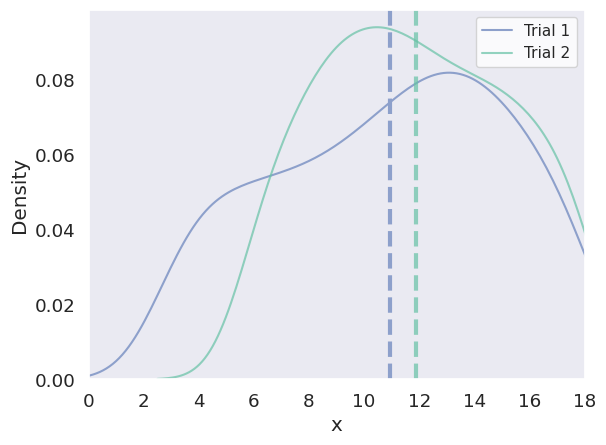

In [46]:
sns.set(font_scale=1.2)

sns.kdeplot(data=df_data, x="x", weights="y1", bw_adjust=0.5, color=sns.color_palette("Set2")[2], label = 'Trial 1')
sns.kdeplot(data=df_data2, x="x", weights="y1", bw_adjust=0.5, color=sns.color_palette("Set2")[0], label = 'Trial 2', alpha=0.7)


plt.axvline(com_1, linestyle='--', color= sns.color_palette("Set2")[2], linewidth = 3)
plt.axvline(com_2, linestyle='--', color=sns.color_palette("Set2")[0], linewidth = 3, alpha=0.7)
plt.xlim([0,18])

sns.set_theme(style='white')
#sns.set_style(style='whitegrid')
plt.grid(False) 
plt.legend()

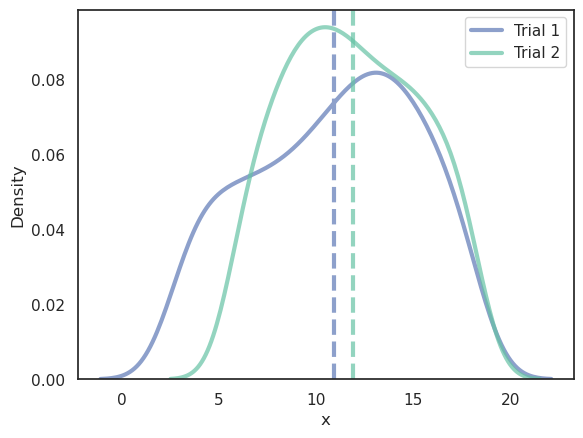

In [52]:
sns.kdeplot(data=df_data, x="x", weights="y1", bw_adjust=0.5, color=sns.color_palette("Set2")[2], label = 'Trial 1', linewidth=3)
sns.kdeplot(data=df_data2, x="x", weights="y1", bw_adjust=0.5, color=sns.color_palette("Set2")[0], label = 'Trial 2', alpha=0.7, linewidth=3)

plt.axvline(com_1, linestyle='--', color= sns.color_palette("Set2")[2], linewidth = 3)
plt.axvline(com_2, linestyle='--', color=sns.color_palette("Set2")[0], linewidth = 3, alpha=0.7)

plt.legend()


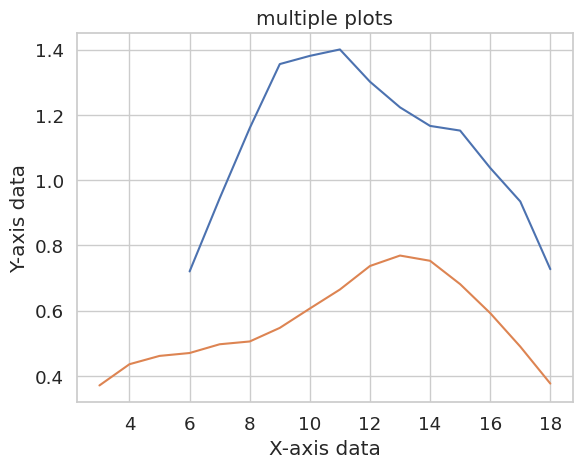

In [35]:
plt.plot(xx22['x'], xx22['y1'])
plt.plot(xx11['x'], xx11['y1'])

plt.xlabel("X-axis data")
plt.ylabel("Y-axis data")
plt.title('multiple plots')
plt.show()

In [ ]:
distance.euclidean((3.7333333333333334, 7.266666666666667),(11.504, 4.98))

In [ ]:
## Behaviour

In [21]:
#rat_ = int(label_.split('_')[1].split('_')[0]) M4102Fa_cell_69_trial_2
#row_ = int(label_.split('_')[4].split('_')[0])
#trial_ = int(label_.split('_')[6].split('.csv')[0])
#trajectory = pd.read_csv('/home/lauren/Comparing_BVC_Trad/52.Laurenz_sub_traj/Sub_Rat_{}_row_{}_trial_{}.csv'.format(rat_,row_,trial_))

#trajectory = pd.read_csv('/home/lauren/Comparing_BVC_Trad/54.Laurenz_Sub_traj/Sub_trial_2_rat_375_dataset_r_140604.csv')
trajectory = pd.read_csv('/home/lauren/Comparing_BVC_Trad/55.Gio_traj/Gio_M4102Fa_trial_1.csv', header=None)

trajectory = trajectory.to_numpy()
xchanges = []
x=[]
y=[]

speed_filter = 0.05

for m in range(0,len(trajectory)):
    x_1=trajectory[m][0]/2            #swapped
    y_1=trajectory[m][1]/2
    if np.isnan(x_1)==False and np.isnan(y_1)==False:
        x.append(x_1)
        y.append(y_1)

angles = []
for i in range(0,len(x)-1):
    x0=x[i]
    y0=y[i]
    x1 = x[i+1]
    y1 =y[i+1]
    try:
        value = labeled[int(y0), int(x0)]
        if len(regions) > 1:
            if regions[1].eccentricity > regions[0].eccentricity:
            #if regions[1].area > regions[0].area:
                if value ==2 :                                                  #not outside of the image label
                    xchange = x1-x0
                    ychange = y1-y0
                    xchanges.append(xchange)
                    if abs(xchange)>speed_filter or abs(ychange)>speed_filter:
                    #if xchange != 0 or ychange != 0:                          #SPEED FILTERING
                        p = angle_between([0,0],[xchange,ychange])
                        angles.append(p)
                    else:
                        pass
                else:
                    pass
        
            elif regions[1].eccentricity > regions[0].eccentricity:
            #elif regions[1].area < regions[0].area:
                if value ==1 :                                                  #not outside of the image label
                    xchange = x1-x0
                    ychange = y1-y0
                    xchanges.append(xchange)
                    if abs(xchange)>speed_filter or abs(ychange)>speed_filter:
                    #if xchange != 0 or ychange != 0:                          #SPEED FILTERING
                        p = angle_between([0,0],[xchange,ychange])
                        angles.append(p)
                    else:
                        pass
                else:
                    pass
        elif len(regions) == 1:
            if value ==1 :                                                  #not outside of the image label
                xchange = x1-x0
                ychange = y1-y0
                xchanges.append(xchange)
                if abs(xchange)>speed_filter or abs(ychange)>speed_filter:
                #if xchange != 0 or ychange != 0:                          #SPEED FILTERING
                    p = angle_between([0,0],[xchange,ychange])
                    angles.append(p)
                else:
                    pass
            else:
                pass  
        else:
            angles.append(np.nan)
    except:
        pass

try:
    angles2 = []
    for m in angles:
        if m >315:
            angles2.append(m-360)
        else:
            angles2.append(m)

    hist, bin_edges = np.histogram(angles, bins =np.array([-45,45,135,225,360]), density=True)
    theta_rad = np.deg2rad(bin_edges)
    hist = hist.tolist()

    if collapse_axis ==0:                                      #horizontal fields
        tt = 'Right-Left'
        try:
            bias = (hist[0]-hist[2])

        except:
            pass

    elif collapse_axis ==1:                                    #vertical fields
        tt = 'Up-Down'
        try:
            bias = (hist[1]-hist[3])   
        except:
            pass
    bias = bias
    behav_axis = tt
except:
    bias = bias
    behav_axis = tt
    
print(hist, bias)

[0.0010156749840051183, 0.002668479419918959, 0.0019220516101514182, 0.003669936731357077] -0.0010014573114381178


In [22]:
colors = plt.cm.viridis(radii_np)
ax = plt.subplot(2, 4, 1, polar=True)
bars = ax.bar(theta_rad, radii, color=colors)         #plotting line
for r, bar in zip(, bars):
    bar.set_alpha(0.8)

plt.yticks([])
ax.set_theta_zero_location("E")
ax.set_theta_direction(1)
ax.set_title('Trial Bias {} {:.4f}'.format( tt, bias))
plt.show() 

SyntaxError: invalid syntax (118468243.py, line 4)

### Gio

In [91]:
#@title Reads in behaviour skew for Gio
all_gio_sub=[]

os.chdir('/home/lauren/Comparing_BVC_Trad/55.Gio_data/Trial_2/')
all_= sorted(glob.glob('**/*.csv'))
len(all_)

breaks = []
breaks2 = []
breaks3 = []
rats=[]
orientations=[]
cells=[]
area_number = []
trials=[]
biases = []
datset = []
reg = []
datasets = []
dataset = []
collapsed_trials = []
coll_axis = []
behav_axis = []
centroids = []
individual_trial_skew = []
coms = []
masked_rm = []
maxs = []
rm_flat=[]

speed_filter = 0.0001

all_gio_nonan_sub = []
for q in tqdm(range(0,len(all_))):
    label = all_[q]

    ratemap = pd.read_csv('/home/lauren/Comparing_BVC_Trad/55.Gio_data/Trial_2/{}'.format(label), header=None) 
    #ratemap = pd.read_csv('/home/lauren/Comparing_BVC_Trad/55.Gio_data/Trial_1/M4102Fa/Gio_M4102Fa_cell_102_trial_1.csv', header=None)

    rats.append(label.split('/')[0])
    datasets.append(label.split('/')[0])
    trials.append(int(label.split('trial_')[1].split('.csv')[0]))
    cells.append(int(label.split('cell_')[1].split('_trial')[0]))
    all_gio_nonan_sub.append(ratemap)   
    
    #with nans
    ratemap1 = ratemap.to_numpy()
    flat_rm_nan = ratemap1.flatten()
    z_rm = stats.zscore(flat_rm_nan, nan_policy='omit')
    z_rm = z_rm.reshape([ratemap1.shape[0],ratemap1.shape[1]])
    z_rm[z_rm <1]=0

    #without nans
    ratemap2 = ratemap.to_numpy()
    ratemap2[np.isnan(ratemap2)]=0
    flat_rm_nonan = ratemap2.flatten()
    z_rm_nonan = stats.zscore(flat_rm_nonan, nan_policy='omit')
    z_rm_nonan = z_rm_nonan.reshape([ratemap2.shape[0],ratemap2.shape[1]])
    z_rm_nonan[z_rm_nonan <1]=0    

    #without nans
    img_nonan = Image.fromarray(z_rm_nonan)
    labeled, nr_objects = ndimage.label(img_nonan)           
    
    if nr_objects <= 5:   #was <=6                                       
        regions = regionprops(labeled)

        if nr_objects > 2: 
            if np.nanmax(np.where(labeled == 1, ratemap1, np.nan)) > np.nanmax(np.where(labeled == 2, ratemap1, np.nan)) and np.nanmax(np.where(labeled == 1, ratemap1, np.nan)) > np.nanmax(np.where(labeled == 3, ratemap1, np.nan)):
                regions_0 = regions[0]
                masked = np.where(labeled == 1, ratemap1, np.nan)
                labeled_area = 1
            elif np.nanmax(np.where(labeled == 2, ratemap1, np.nan)) > np.nanmax(np.where(labeled == 1, ratemap1, np.nan)) and np.nanmax(np.where(labeled == 2, ratemap1, np.nan)) > np.nanmax(np.where(labeled == 3, ratemap1, np.nan)):
                regions_0 = regions[1] 
                masked = np.where(labeled == 2, ratemap1, np.nan)
                labeled_area = 2
            elif np.nanmax(np.where(labeled == 3, ratemap1, np.nan)) > np.nanmax(np.where(labeled == 2, ratemap1, np.nan)) and np.nanmax(np.where(labeled == 3, ratemap1, np.nan)) > np.nanmax(np.where(labeled == 1, ratemap1, np.nan)):
                regions_0 = regions[2] 
                masked = np.where(labeled == 3, ratemap1, np.nan)
                labeled_area = 3    
        elif nr_objects ==2:  
            if regions[1].area > regions[0].area:
                regions_0 = regions[1]
                masked = np.where(labeled == 2, ratemap1, np.nan)
                labeled_area = 2
                masked_rm.append(masked)
            else:
                regions_0 = regions[0] 
                masked = np.where(labeled == 1, ratemap1, np.nan)
                labeled_area = 1
                masked_rm.append(masked)
        elif nr_objects ==1:
            regions_0 = regions[0]
            masked = np.where(labeled == 1, ratemap1, np.nan)
            labeled_area = 1
            masked_rm.append(masked)
        
        orientation = regions_0.orientation  
        if regions_0.centroid[0] >=z_rm_nonan.shape[0]-5 or regions_0.centroid[0] <=5 or regions_0.centroid[1] >=z_rm_nonan.shape[1]-5 or regions_0.centroid[1] <=5:       #Only want peripheral fields
        
        #if 5 <= regions_0.centroid[0] <= z_rm_nonan.shape[0]-5 and not 5 <= regions_0.centroid[1] <= z_rm_nonan.shape[1]-5 or  5 <= regions_0.centroid[1] <= z_rm_nonan.shape[1]-5 and not 5 <= regions_0.centroid[0] <= z_rm_nonan.shape[0]-5:

       
            if np.nanmax(np.nansum(masked,axis=1)) > np.nanmax(np.nansum(masked,axis=0)):               
                collapse_axis = 0
            else:
                collapse_axis = 1
            try:
                masked1 = pd.DataFrame(masked)

                collapsed_rm = masked1.mean(axis=collapse_axis).tolist() #np.nansum(masked, axis=collapse_axis)         
                orientations.append(regions_0.orientation)

                xx = np.arange(1,len(collapsed_rm)+1)
                df_data = pd.DataFrame({'x':xx, 'y1':collapsed_rm}) 
                df_data = df_data.set_index(['x'], drop=False)
                com_flat_rm =  ((df_data['y1'] * df_data['x']).sum())/df_data['y1'].sum()

                coms.append(com_flat_rm)
                individual_trial_skew.append(df_data.idxmax(axis=0).y1- com_flat_rm)
                centroids.append(regions_0.centroid)
                area_number.append(labeled_area)
                coll_axis.append(collapse_axis)
                maxs.append(df_data.idxmax(axis=0).y1)
                
                rm_flat.append(masked1.to_numpy().flatten().tolist())       
                whole_flat.append(ratemap1.flatten().tolist())
                
            except:
                collapsed_trials.append(np.nan)
                coll_axis.append(np.nan)
                coms.append(np.nan)
                centroids.append(np.nan)
                individual_trial_skew.append(np.nan)
                area_number.append(np.nan)
                maxs.append(np.nan)
                rm_flat.append(np.nan)
                breaks5.append('one')
                whole_flat.append(np.nan)
        else:
            collapsed_trials.append(np.nan)
            coll_axis.append(np.nan)
            coms.append(np.nan)
            centroids.append(np.nan)
            individual_trial_skew.append(np.nan)
            area_number.append(np.nan)
            maxs.append(np.nan)
            rm_flat.append(np.nan)
            breaks.append(regions_0.centroid)
            whole_flat.append(np.nan)

    else:
        collapsed_trials.append(np.nan)
        coll_axis.append(np.nan)
        centroids.append(np.nan)
        coms.append(np.nan)
        individual_trial_skew.append(np.nan)
        area_number.append(np.nan)
        maxs.append(np.nan)
        rm_flat.append(np.nan)
        breaks3.append('one')
        whole_flat.append(np.nan)
        
#Behaviour 
    trajectory = pd.read_csv('/home/lauren/Comparing_BVC_Trad/55.Gio_traj/Gio_{}_trial_{}.csv'.format(rats[q],trials[q]), header=None)
    trajectory = trajectory.to_numpy()

    x=[]
    y=[]

    for m in range(0,len(trajectory)):
        x_1=trajectory[m][0]/2            #note numpy's swapped axis 
        y_1=trajectory[m][1]/2
        if np.isnan(x_1)==False and np.isnan(y_1)==False:
            x.append(x_1)
            y.append(y_1)
    angles = []
    for i in range(0,len(x)-1):
        x0=x[i]
        y0=y[i]
        x1 = x[i+1]
        y1 =y[i+1]
        try:
            value = labeled[int(y0), int(x0)]
            if len(regions) > 1:
                if regions[1].area > regions[0].area:
                    if value ==2 :                                                  #not outside of the image label
                        xchange = x1-x0
                        ychange = y1-y0
                        
                        if abs(xchange)>speed_filter or abs(ychange)>speed_filter:          #speed filtering
                            p = angle_between([0,0],[xchange,ychange])
                            angles.append(p)
                        else:
                            pass
                    else:
                        pass
            
                elif regions[1].area < regions[0].area:
                    if value ==1 :                                                  #not outside of the image label
                        xchange = x1-x0
                        ychange = y1-y0
                        
                        if abs(xchange)>speed_filter or abs(ychange)>speed_filter:          #speed filtering
                            p = angle_between([0,0],[xchange,ychange])
                            angles.append(p)
                        else:
                            pass
                    else:
                        pass
            elif len(regions) == 1:
                if value ==1 :                                                  #not outside of the image label
                    xchange = x1-x0
                    ychange = y1-y0
                    
                    if abs(xchange)>speed_filter or abs(ychange)>speed_filter:          #speed fitlering
                        p = angle_between([0,0],[xchange,ychange])
                        angles.append(p)
                    else:
                        pass
                else:
                    pass  
            else:
                angles.append(np.nan)
        except:
            pass
    
    try:
        angles2 = []
        for m in angles:
            if m >315:
                angles2.append(m-360)
            else:
                angles2.append(m)

        hist, bin_edges = np.histogram(angles, bins =np.array([-45,45,135,225,360]), density=True)
        hist = hist.tolist()
        #hist = hist / np.sum(hist)

        if collapse_axis ==0:                                      #horizontal fields
            tt = 'Right/Left'
            try:
                bias = (hist[0]-hist[2])

            except:
                pass

        elif collapse_axis ==1:                                    #vertical fields
            tt = 'Up/Down'
            try:
                bias = (hist[1]-hist[3])   
            except:
                pass

        biases.append(bias)
        behav_axis.append(tt)
    except:
        biases.append(np.nan)
        behav_axis.append(np.nan)


  3%|▎         | 36/1197 [00:05<02:51,  6.76it/s]/home/lauren/miniconda3/envs/neuroscenes/lib/python3.8/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
  3%|▎         | 40/1197 [00:06<02:52,  6.72it/s]/home/lauren/miniconda3/envs/neuroscenes/lib/python3.8/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
 10%|█         | 123/1197 [00:18<02:39,  6.75it/s]/home/lauren/miniconda3/envs/neuroscenes/lib/python3.8/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
 58%|█████▊    | 695/1197 [01:38<01:06,  7.51it/s]/home/lauren/miniconda3/envs/neuroscenes/lib/python3.8/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
 72%|███████▏  | 863/1197 [02:02<00:55,  6.06it/s]/home/lauren/minicon

In [648]:
np.deg2rad(225)

3.9269908169872414

In [649]:
np.pi*5/4

3.9269908169872414

In [92]:
df_trial = pd.DataFrame({'datasets':datasets, 'trial':trials, 'cell':cells, 'behav_axis':behav_axis,'rm_flat':rm_flat, 'behav_bias':biases, 'centroids':centroids,'maxs':maxs, 'field_skew':individual_trial_skew, 'coms':coms, 'col_axis':coll_axis, 'area_number':area_number})
df_trial.head()

,datasets,trial,cell,behav_axis,rm_flat,behav_bias,centroids,maxs,field_skew,coms,col_axis,area_number
0,M4102Fa,2,100,Up/Down,"[0.543532750184049, 0.582662272778748, 0.51125...",0.000395,"(3.12, 2.94)",4.0,-1.625835,5.625835,1.0,1.0
1,M4102Fa,2,101,Up/Down,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0.001201,"(8.224137931034482, 1.9482758620689655)",8.0,-1.117999,9.117999,1.0,1.0
2,M4102Fa,2,102,Up/Down,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",-0.000678,"(15.35, 15.05)",16.0,0.353166,15.646834,1.0,1.0
3,M4102Fa,2,103,Up/Down,NaN,0.000835,NaN,NaN,NaN,NaN,NaN,NaN
4,M4102Fa,2,104,Up/Down,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0.000265,"(13.295081967213115, 2.442622950819672)",13.0,-0.587257,13.587257,1.0,2.0


In [93]:
df_trial.to_csv('/home/lauren/Comparing_BVC_Trad/FINAL_skew_trials_gio_trial_2_stable_masked_nanmeannew_z_5.csv', index=False)


In [64]:
####### DO NOT TOUCH ########
#df1 = pd.read_csv('/home/lauren/Comparing_BVC_Trad/skew_trials_gio_trial_1_stable_masked_nanmeannew_z_6.csv')
#df2 = pd.read_csv('/home/lauren/Comparing_BVC_Trad/skew_trials_gio_trial_2_stable_masked_nanmeannew_z_6.csv') #_nanmeannew75

# append Laurenz Sub cells
#df1_laurenz = pd.read_csv('/home/lauren/Comparing_BVC_Trad/skew_trials_laurenz_sub_1_masked_meannew_z_6.csv')
#df2_laurenz = pd.read_csv('/home/lauren/Comparing_BVC_Trad/skew_trials_laurenz_sub_2_masked_meannew_z_6.csv')
#df_laurenz = pd.concat([df1_laurenz, df2_laurenz])

###################
df1 = pd.read_csv('/home/lauren/Comparing_BVC_Trad/FINAL_skew_trials_gio_trial_1_stable_masked_nanmeannew_z_5.csv')
df2 = pd.read_csv('/home/lauren/Comparing_BVC_Trad/FINAL_skew_trials_gio_trial_2_stable_masked_nanmeannew_z_5.csv')

df1_laurenz = pd.read_csv('/home/lauren/Comparing_BVC_Trad/FINAL_skew_trials_laurenz_sub_1_masked_meannew_z_5.csv')
df2_laurenz = pd.read_csv('/home/lauren/Comparing_BVC_Trad/FINAL_skew_trials_laurenz_sub_2_masked_meannew_z_5.csv')
df_laurenz = pd.concat([df1_laurenz, df2_laurenz])

df = pd.concat([df1, df2, df_laurenz])

df.head()

,datasets,trial,cell,behav_axis,rm_flat,behav_bias,centroids,maxs,field_skew,coms,col_axis,area_number,rats
0,M4102Fa,1,100,Up/Down,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",-0.000863,"(14.666666666666666, 16.708333333333332)",16.0,0.348203,15.651797,1.0,2.0,NaN
1,M4102Fa,1,101,Up/Down,"[nan, 0.319116072992625, 0.314449696025112, na...",0.000649,"(2.0, 1.8461538461538463)",3.0,0.019028,2.980972,1.0,1.0,NaN
2,M4102Fa,1,102,Up/Down,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",-0.000405,"(13.952380952380953, 1.9047619047619047)",18.0,3.215698,14.784302,1.0,3.0,NaN
3,M4102Fa,1,103,Up/Down,"[nan, 0.217103140258652, 0.19983790473831, nan...",0.000809,"(6.069767441860465, 2.2790697674418605)",9.0,1.888977,7.111023,1.0,1.0,NaN
4,M4102Fa,1,104,Up/Down,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0.000176,"(13.620689655172415, 2.2758620689655173)",18.0,3.341395,14.658605,1.0,2.0,NaN


In [65]:
av_behav_biases = []
rats_index = []
behav_index = []
axis_index = []
field_index = []
change_field_skew = []
dataset = df.datasets.iloc[:].tolist()
datasets_unique = list(set(dataset))
change_maxs = []
breaks = []
skewinfo = []
result_index = []

for dataset in datasets_unique:
    for cell_ in range(1,500):
        try:
            filt=df[df['datasets']==dataset]
            filt=filt[filt['cell']==cell_]
            first_trial = filt[filt['trial']==1].coms.iloc[0]
            first_axis = filt[filt['trial']==1].col_axis.iloc[0]
            second_trial = filt[filt['trial']==2].coms.iloc[0]
            second_axis = filt[filt['trial']==2].col_axis.iloc[0]
            first_behav = filt[filt['trial']==1].behav_bias.iloc[0]
            second_behav = filt[filt['trial']==2].behav_bias.iloc[0]
            first_centroid = filt[filt['trial']==1].centroids.iloc[0]
            second_centroid = filt[filt['trial']==2].centroids.iloc[0]
            first_max = filt[filt['trial']==1].maxs.iloc[0]
            second_max =filt[filt['trial']==2].maxs.iloc[0]
            col_axis1 = filt[filt['trial']==1].col_axis.iloc[0]
            col_axis2 = filt[filt['trial']==2].col_axis.iloc[0]
           
            a=filt[filt['trial']==1].rm_flat.iloc[0]
            rm_flat_1 = [float(x) for x in a.strip("'[]'").split(",")] 

            b=filt[filt['trial']==2].rm_flat.iloc[0]
            rm_flat_2 = [float(x) for x in b.strip("'[]'").split(",")]  

            temp_df = pd.DataFrame({'one':rm_flat_1, 'two':rm_flat_2}) 
            stability = temp_df.corr().iloc[0,1]

            
            if first_axis == second_axis:
                if stability >= 0.75 and np.isnan(stability)==False  :
                        rats_index.append('Gio_{}_cell_{}_trial_1.csv'.format(dataset,cell_))
                        rats_index.append('Gio_{}_cell_{}_trial_2.csv'.format(dataset,cell_))
                        b_bias = filt.behav_bias.tolist()           
                        behav_index.append(np.mean(b_bias))
                        behav_index.append(np.mean(b_bias))
                        field_index.append(second_trial-first_trial)
                        field_index.append(second_trial-first_trial)
                        axis_index.append(col_axis1)
                        axis_index.append(col_axis2)
                                               
                        change_field_skew.append(second_trial-first_trial)
                        av_behav_biases.append(second_behav-first_behav)             #np.mean(b_bias))       #second_behav-first_behav                  #ALTERNATIVES 
                        change_maxs.append(second_max-first_max)

                        skewinfo.append([dataset,cell_,second_behav-first_behav, second_trial-first_trial])
                        print(dataset, cell_, (second_behav-first_behav))
                else:
                    change_field_skew.append(np.nan)
                    av_behav_biases.append(np.nan)
                    change_maxs.append(np.nan)
                    
                    
            else:
                av_behav_biases.append(np.nan)
                change_field_skew.append(np.nan)
                change_maxs.append(np.nan)
                breaks.append('here1')
                
        except:
            pass
                

3 5 -0.0008977207770721
6 33 0.00047759801201890007
7 13 -0.00022569533694420012
7 30 -0.0018228549848461
7 33 0.0005032955092423002
8 22 -0.0013741904532803
9 9 0.0002732948753908178
9 16 -0.0009546709721064001
9 22 0.00026240047059096136
9 37 -0.00034239003947779997
10 3 0.0006701486923075999
10 5 -0.00011728711234359991
10 10 0.00012575675503140012
M4113Fa 65 -0.0002078561343647
M4113Fa 71 0.0014084220458727
M4113Fa 73 0.0011477498102822
M4113Fa 78 0.0011432322089539
M4113Fa 96 0.0004863761320988999
M4113Fa 134 0.0008608277407642
M4113Fa 147 -0.00046771846293219995
M4113Fa 192 0.0007148956259612001
M4113Fa 208 nan
M4113Fa 223 0.0004886964300528
M4113Fa 228 0.0009039789459325
M4113Fa 232 -0.0010794514641047999
M4113Fa 248 0.0015159347979887
M4113Fa 264 0.00024911737041739986
M4113Fa 279 0.0006443291233427001
M4113Fa 328 0.0012753919967724001
M4115a 51 0.0004128085470506001
M4115a 55 0.0010009536560209
M4115a 57 -0.0015289604433530465
M4115a 71 -0.0010513139067862
M4115a 83 0.00117468

In [86]:
df1 = pd.DataFrame({'Behaviour Skew':av_behav_biases, 'Change in Field Skew':change_field_skew}) #change_field_skew      
spearman = stats.spearmanr(change_field_skew,av_behav_biases, nan_policy = 'omit', alternative='less')
spearman_n = spearman[0].round(decimals=2)
spearman_p = spearman[1].round(decimals = 2)
corr_coeff = ma.corrcoef(ma.masked_invalid(av_behav_biases), ma.masked_invalid(change_field_skew))[1,0].round(decimals=3)
matplotlib.style.use('default')

In [78]:
df1.corr()

,Behaviour Skew,Change in Field Skew
Behaviour Skew,1.000000,-0.227464
Change in Field Skew,-0.227464,1.000000


In [83]:
calculate_pvalues(df1)

,Behaviour Skew,Change in Field Skew
Behaviour Skew,0.0,0.0949
Change in Field Skew,0.0949,0.0


In [82]:
from scipy.stats import pearsonr

def calculate_pvalues(df):
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            tmp = df[df[r].notnull() & df[c].notnull()]
            pvalues[r][c] = round(pearsonr(tmp[r], tmp[c])[1], 4)
    return pvalues

In [85]:
ma.corrcoef(ma.masked_invalid(av_behav_biases), ma.masked_invalid(change_field_skew))[1,0]

-0.22746409106810006

Text(5, 0.0015, 'n=55')

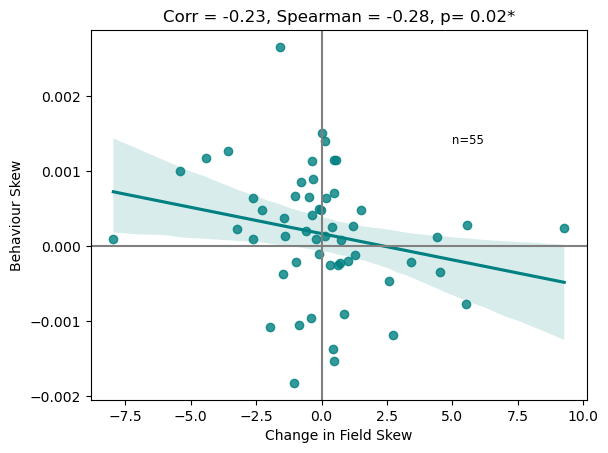

In [69]:
ax = sns.regplot(data=df1, y="Behaviour Skew", x="Change in Field Skew", color='teal').set_title('Corr = {},  p= {}*; Spearman = {},  p= {}*'.format(corr_coeff,spearman_n, spearman_p))
plt.axvline(0, color='grey') # Plot a vertical line at corresponding x
plt.axhline(0, color='grey') # Plot a vertical line at corresponding x
speed_filter  = 0.05
plt.text(5, 0.0015, "n={}".format(len(checky)), ha="left", va="top", size='small')


IndexError: list index out of range

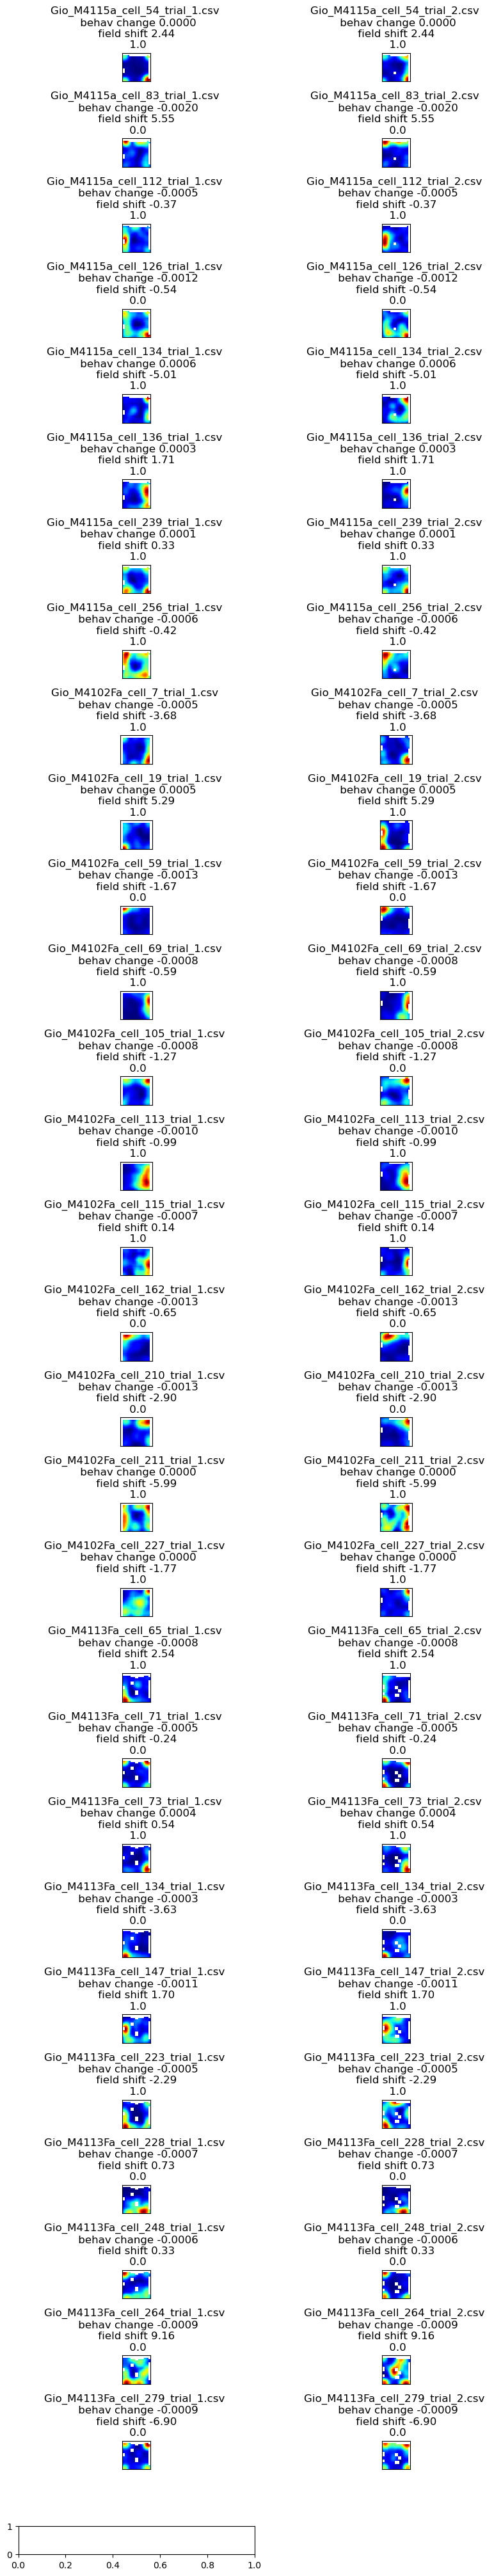

In [236]:
#Viewing those cells
filt_rms = []
for l in rats_index:
    trial1 = l.split('trial_')[1].split('.csv')[0]
    folder1 = l.split('_')[1]
    rm1 = pd.read_csv('/home/lauren/Comparing_BVC_Trad/55.Gio_data/Trial_{}/'.format(trial1)+folder1+'/{}'.format(l))
    rm1 = rm1.to_numpy()
    filt_rms.append(rm1)
len(filt_rms)

def plot_cells(cells, n, m, cell_type = ''):
    fig = plt.figure()
    fig.set_figheight(120)
    fig.set_figwidth(10)
    for i in np.arange(1,n*m):
        ax = plt.subplot(n, m, i)
        ax.imshow(cells[i-1], cmap='jet', origin = 'lower')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_title('{} \n behav change {:.4f}\n field shift {:.2f} \n {}'.format(rats_index[i-1], behav_index[i-1],field_index[i-1], axis_index[i-1]))          #format(centroids_index[i-1], field_skew_index[i-1]))
        plt.subplots_adjust(hspace=2,wspace=0.1)
plot_cells(cells= filt_rms , n=70, m=2)                                  

### For CA1

In [103]:
#@title Reads in ratemaps for CA1

os.chdir('/home/lauren/Comparing_BVC_Trad/53.Laurenz_CA1_new_morefilt_trial/Trial_2/')
all_= sorted(glob.glob('**/*.csv'))

breaks1 = []
breaks2 = []
breaks3 = []
breaks5 = []
rats=[]
orientations=[]
cells=[]
area_number = []
trials=[]
biases = []
datset = []
reg = []
rows = []
rm_flat = []
dataset = []
collapsed_trials = []
coll_axis = []
behav_axis = []
centroids = []
individual_trial_skew = []
coms = []
masked_rm = []
maxs = []
breaks5 = []
breaks=[]
breaks6 = []
whole_flat = []

speed_filter = 0.0001

all_gio_nonan_ca1 = []
for q in tqdm(range(0,len(all_))):
    label = all_[q]
    ratemap = pd.read_csv('/home/lauren/Comparing_BVC_Trad/53.Laurenz_CA1_new_morefilt_trial/Trial_2/{}'.format(label), header=None) 

    rats.append(label.split('Rat_')[1].split('/')[0])
    trials.append(label.split('trial_')[1].split('_')[0])
    cells.append(label.split('cell_')[1].split('.csv')[0])
    rows.append(label.split('row_')[1].split('_')[0])

    #with nans
    ratemap1 = ratemap.to_numpy()
    flat_rm_nan = ratemap1.flatten()
    z_rm = stats.zscore(flat_rm_nan, nan_policy='omit')
    z_rm = z_rm.reshape([ratemap1.shape[0],ratemap1.shape[1]])
    z_rm[z_rm <1]=0

    #without nans
    ratemap2 = ratemap.to_numpy()
    ratemap2[np.isnan(ratemap2)]=0
    flat_rm_nonan = ratemap2.flatten()
    z_rm_nonan = stats.zscore(flat_rm_nonan, nan_policy='omit')
    z_rm_nonan = z_rm_nonan.reshape([ratemap2.shape[0],ratemap2.shape[1]])
    z_rm_nonan[z_rm_nonan <1]=0    

    #without nans
    img_nonan = Image.fromarray(z_rm_nonan)
    labeled, nr_objects = ndimage.label(img_nonan)           
    
    if nr_objects <= 5:         #was <=6                                       
        regions = regionprops(labeled)

        if nr_objects> 2: 
            if np.nanmax(np.where(labeled == 1, ratemap1, np.nan)) > np.nanmax(np.where(labeled == 2, ratemap1, np.nan)) and np.nanmax(np.where(labeled == 1, ratemap1, np.nan)) > np.nanmax(np.where(labeled == 3, ratemap1, np.nan)):
                regions_0 = regions[0]
                masked = np.where(labeled == 1, ratemap1, np.nan)
                labeled_area = 1
            elif np.nanmax(np.where(labeled == 2, ratemap1, np.nan)) > np.nanmax(np.where(labeled == 1, ratemap1, np.nan)) and np.nanmax(np.where(labeled == 2, ratemap1, np.nan)) > np.nanmax(np.where(labeled == 3, ratemap1, np.nan)):
                regions_0 = regions[1] 
                masked = np.where(labeled == 2, ratemap1, np.nan)
                labeled_area = 2
            elif np.nanmax(np.where(labeled == 3, ratemap1, np.nan)) > np.nanmax(np.where(labeled == 2, ratemap1, np.nan)) and np.nanmax(np.where(labeled == 3, ratemap1, np.nan)) > np.nanmax(np.where(labeled == 1, ratemap1, np.nan)):
                regions_0 = regions[2] 
                masked = np.where(labeled == 3, ratemap1, np.nan)
                labeled_area = 3    
        elif nr_objects ==2:  
            if regions[1].area > regions[0].area:
                regions_0 = regions[1]
                masked = np.where(labeled == 2, ratemap1, np.nan)
                labeled_area = 2
                masked_rm.append(masked)
            else:
                regions_0 = regions[0] 
                masked = np.where(labeled == 1, ratemap1, np.nan)
                labeled_area = 1
                masked_rm.append(masked)
        elif nr_objects ==1:
            regions_0 = regions[0]
            masked = np.where(labeled == 1, ratemap1, np.nan)
            labeled_area = 1
            masked_rm.append(masked)
        
        orientation = regions_0.orientation  
        if regions_0.centroid[0] >=z_rm_nonan.shape[0]-5 or regions_0.centroid[0] <=5 or regions_0.centroid[1] >=z_rm_nonan.shape[1]-5 or regions_0.centroid[1] <=5:       #Only want peripheral fields
        
        #if 5 <= regions_0.centroid[0] <= z_rm_nonan.shape[0]-5 and not 5 <= regions_0.centroid[1] <= z_rm_nonan.shape[1]-5 or  5 <= regions_0.centroid[1] <= z_rm_nonan.shape[1]-5 and not 5 <= regions_0.centroid[0] <= z_rm_nonan.shape[0]-5:

       
            if np.nanmax(np.nansum(masked,axis=1)) > np.nanmax(np.nansum(masked,axis=0)):               
                collapse_axis = 0
            else:
                collapse_axis = 1
            try:
                masked1 = pd.DataFrame(masked)

                collapsed_rm = masked1.mean(axis=collapse_axis).tolist() #np.nansum(masked, axis=collapse_axis)         
                orientations.append(regions_0.orientation)

                xx = np.arange(1,len(collapsed_rm)+1)
                df_data = pd.DataFrame({'x':xx, 'y1':collapsed_rm}) 
                df_data = df_data.set_index(['x'], drop=False)
                com_flat_rm =  ((df_data['y1'] * df_data['x']).sum())/df_data['y1'].sum()

                coms.append(com_flat_rm)
                individual_trial_skew.append(df_data.idxmax(axis=0).y1- com_flat_rm)
                centroids.append(regions_0.centroid)
                area_number.append(labeled_area)
                coll_axis.append(collapse_axis)
                maxs.append(df_data.idxmax(axis=0).y1)
                
                rm_flat.append(masked1.to_numpy().flatten().tolist())       
                whole_flat.append(ratemap1.flatten().tolist())
                
            except:
                collapsed_trials.append(np.nan)
                coll_axis.append(np.nan)
                coms.append(np.nan)
                centroids.append(np.nan)
                individual_trial_skew.append(np.nan)
                area_number.append(np.nan)
                maxs.append(np.nan)
                rm_flat.append(np.nan)
                breaks5.append('one')
                whole_flat.append(np.nan)
        else:
            collapsed_trials.append(np.nan)
            coll_axis.append(np.nan)
            coms.append(np.nan)
            centroids.append(np.nan)
            individual_trial_skew.append(np.nan)
            area_number.append(np.nan)
            maxs.append(np.nan)
            rm_flat.append(np.nan)
            breaks.append(regions_0.centroid)
            whole_flat.append(np.nan)

    else:
        collapsed_trials.append(np.nan)
        coll_axis.append(np.nan)
        centroids.append(np.nan)
        coms.append(np.nan)
        individual_trial_skew.append(np.nan)
        area_number.append(np.nan)
        maxs.append(np.nan)
        rm_flat.append(np.nan)
        breaks3.append('one')
        whole_flat.append(np.nan)
        
#Behaviour 
    trajectory = pd.read_csv('/home/lauren/Comparing_BVC_Trad/54.Laurenz_CA1_traj/CA1_trial_row_{}_rat_{}_trial_{}.csv'.format(rows[q],rats[q],trials[q]), header=None)
    trajectory = trajectory.to_numpy()

    x=[]
    y=[]

    for m in range(0,len(trajectory)):
        x_1=trajectory[m][0]/10            #swapped
        y_1=trajectory[m][1]/10
        if np.isnan(x_1)==False and np.isnan(y_1)==False:
            x.append(x_1)
            y.append(y_1)
    angles = []
    for i in range(0,len(x)-1):
        x0=x[i]
        y0=y[i]
        x1 = x[i+1]
        y1 =y[i+1]
        try:
            value = labeled[int(y0), int(x0)]
            if len(regions) > 1:
                if regions[1].area > regions[0].area:
                    if value ==2 :                                                  #not outside of the image label
                        xchange = x1-x0
                        ychange = y1-y0
                        
                        if abs(xchange)>speed_filter or abs(ychange)>speed_filter:
                            p = angle_between([0,0],[xchange,ychange])
                            angles.append(p)
                        else:
                            pass
                    else:
                        pass
            
                elif regions[1].area < regions[0].area:
                    if value ==1 :                                                  #not outside of the image label
                        xchange = x1-x0
                        ychange = y1-y0
                        
                        if abs(xchange)>speed_filter or abs(ychange)>speed_filter:
                        #if xchange != 0 or ychange != 0:                          #SPEED FILTERING
                            p = angle_between([0,0],[xchange,ychange])
                            angles.append(p)
                        else:
                            pass
                    else:
                        pass
            elif len(regions) == 1:
                if value ==1 :                                                  #not outside of the image label
                    xchange = x1-x0
                    ychange = y1-y0
                    
                    if abs(xchange)>speed_filter or abs(ychange)>speed_filter:
                    #if xchange != 0 or ychange != 0:                          #SPEED FILTERING
                        p = angle_between([0,0],[xchange,ychange])
                        angles.append(p)
                    else:
                        pass
                else:
                    pass  
            else:
                angles.append(np.nan)
        except:
            pass
    
    try:
        angles2 = []
        for m in angles:
            if m >315:
                angles2.append(m-360)
            else:
                angles2.append(m)

        hist, bin_edges = np.histogram(angles, bins =np.array([-45,45,135,225,360]), density=True)
        hist = hist.tolist()
        #hist = hist / np.sum(hist)

        if collapse_axis ==0:                                      #horizontal fields
            tt = 'Right/Left'
            try:
                bias = (hist[0]-hist[2])

            except:
                pass

        elif collapse_axis ==1:                                    #vertical fields
            tt = 'Up/Down'
            try:
                bias = (hist[1]-hist[3])   
            except:
                pass

        biases.append(bias)
        behav_axis.append(tt)
    except:
        biases.append(np.nan)
        behav_axis.append(np.nan)



100%|██████████| 243/243 [00:42<00:00,  5.77it/s]


In [104]:
df_trial_ca1= pd.DataFrame({'rats':rats,'datasets':rows, 'trial':trials, 'cell':cells, 'behav_axis':behav_axis,'rm_flat':rm_flat, 'whole_rm':whole_flat, 'behav_bias':biases, 'centroids':centroids,'maxs':maxs,  'coms':coms, 'col_axis':coll_axis, 'area_number':area_number})
df_trial_ca1.tail()

,rats,datasets,trial,cell,behav_axis,rm_flat,whole_rm,behav_bias,centroids,maxs,coms,col_axis,area_number
238,76,6,2,17,Right/Left,"[nan, nan, nan, nan, 5.1304347826087, 8.522727...","[0.8994708994709, 1.35356849876948, 1.65330661...",-0.000467,"(2.0, 10.278688524590164)",11.0,11.001637,0.0,1.0
239,76,6,2,18,Up/Down,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.687830687830688, 0.451189499589828, 0.54784...",-0.000204,"(18.563218390804597, 3.0229885057471266)",19.0,18.268909,1.0,1.0
240,76,6,2,2,Up/Down,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.0226551880380607, 0.0239348970799426, 0.020...",0.000907,"(3.6, 20.571428571428573)",1.0,5.135728,1.0,1.0
241,76,6,2,20,Up/Down,NaN,NaN,0.000611,NaN,NaN,NaN,NaN,NaN
242,76,6,2,4,Up/Down,"[6.66666666666667, 5.98991172761664, 5.1102204...","[6.66666666666667, 5.98991172761664, 5.1102204...",-0.000527,"(4.016393442622951, 2.5737704918032787)",4.0,5.562136,1.0,1.0


In [105]:
df_trial_ca1.to_csv('/home/lauren/Comparing_BVC_Trad/FINAL_skew_trials_ca1_trial_2_stable_masked_mean_z_5.csv', index=False)

In [169]:
##### DO NOT DELETE: ORIGINAL ########
#df1 = pd.read_csv('/home/lauren/Comparing_BVC_Trad/skew_trials_ca1_trial_1_stable_masked_mean_z_6.csv')
#df2 = pd.read_csv('/home/lauren/Comparing_BVC_Trad/skew_trials_ca1_trial_2_stable_masked_mean_z_6.csv')
#df = pd.concat([df1,df2])
################

df1 = pd.read_csv('/home/lauren/Comparing_BVC_Trad/FINAL_skew_trials_ca1_trial_1_stable_masked_mean_z_5.csv')
df2 = pd.read_csv('/home/lauren/Comparing_BVC_Trad/FINAL_skew_trials_ca1_trial_2_stable_masked_mean_z_5.csv')
df = pd.concat([df1,df2])

df.tail()

,rats,datasets,trial,cell,behav_axis,rm_flat,whole_rm,behav_bias,centroids,maxs,coms,col_axis,area_number
238,76,6,2,17,Right/Left,"[nan, nan, nan, nan, 5.1304347826087, 8.522727...","[0.8994708994709, 1.35356849876948, 1.65330661...",-0.000467,"(2.0, 10.278688524590164)",11.0,11.001637,0.0,1.0
239,76,6,2,18,Up/Down,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.687830687830688, 0.451189499589828, 0.54784...",-0.000204,"(18.563218390804597, 3.0229885057471266)",19.0,18.268909,1.0,1.0
240,76,6,2,2,Up/Down,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.0226551880380607, 0.0239348970799426, 0.020...",0.000907,"(3.6, 20.571428571428573)",1.0,5.135728,1.0,1.0
241,76,6,2,20,Up/Down,NaN,NaN,0.000611,NaN,NaN,NaN,NaN,NaN
242,76,6,2,4,Up/Down,"[6.66666666666667, 5.98991172761664, 5.1102204...","[6.66666666666667, 5.98991172761664, 5.1102204...",-0.000527,"(4.016393442622951, 2.5737704918032787)",4.0,5.562136,1.0,1.0


In [170]:
av_behav_biases = []
rats_index = []
behav_index = []
field_index = []
change_field_skew = []
dataset = df.datasets.iloc[:].tolist()
datasets_unique = list(set(dataset))
change_maxs = []
breaks = []
info1=[]

result_index = []

for dataset in datasets_unique:
    for cell_ in range(1,500):
        try:
            filt=df[df['datasets']==dataset]
            filt=filt[filt['cell']==cell_]
            first_trial = filt[filt['trial']==1].coms.iloc[0]
            first_axis = filt[filt['trial']==1].col_axis.iloc[0]
            second_trial = filt[filt['trial']==2].coms.iloc[0]
            second_axis = filt[filt['trial']==2].col_axis.iloc[0]
            first_behav = filt[filt['trial']==1].behav_bias.iloc[0]
            second_behav = filt[filt['trial']==2].behav_bias.iloc[0]
            first_centroid = filt[filt['trial']==1].centroids.iloc[0]
            second_centroid = filt[filt['trial']==2].centroids.iloc[0]
            first_max = filt[filt['trial']==1].maxs.iloc[0]
            second_max =filt[filt['trial']==2].maxs.iloc[0]
            col_axis1 = filt[filt['trial']==1].col_axis.iloc[0]
            col_axis2 = filt[filt['trial']==2].col_axis.iloc[0]
            rat = filt[filt['trial']==2].rats.iloc[0]
            
            a=filt[filt['trial']==1].rm_flat.iloc[0]
            rm_flat_1 = [float(x) for x in a.strip("'[]'").split(",")] 

                 
            b=filt[filt['trial']==2].rm_flat.iloc[0]
            rm_flat_2 = [float(x) for x in b.strip("'[]'").split(",")]  

            temp_df = pd.DataFrame({'one':rm_flat_1, 'two':rm_flat_2}) 
            stability = temp_df.corr().iloc[0,1]
            if first_axis == second_axis:
                if stability > 0.8 and np.isnan(stability)==False  :
                                    
                        rats_index.append('CA1_rat_{}_row_{}_trial_1_cell_{}'.format(rat, dataset,cell_))
                        rats_index.append('CA1_rat_{}_row_{}_trial_2_cell_{}'.format(rat, dataset,cell_))
                        b_bias = filt.behav_bias.tolist()           
                        behav_index.append(second_behav-first_behav)
                        behav_index.append(second_behav-first_behav)
                        field_index.append(second_trial-first_trial)
                        field_index.append(second_trial-first_trial)
                        
                        
                        change_field_skew.append(second_trial-first_trial)
                        av_behav_biases.append(second_behav-first_behav)             #np.mean(b_bias)       #second_behav-first_behav                  #ALTERNATIVES 
                        change_maxs.append(second_max-first_max)
                        info1.append([rat, dataset,cell_,second_trial-first_trial])
                        print(dataset, cell_, (second_trial-first_trial))
                else:
                    change_field_skew.append(np.nan)
                    av_behav_biases.append(np.nan)
                    change_maxs.append(np.nan)      
            else:
                av_behav_biases.append(np.nan)
                change_field_skew.append(np.nan)
                change_maxs.append(np.nan)
                breaks.append('here1')
                
        except:
            pass
                

2 1 1.8978562311273404
2 13 -0.758821814457328
2 14 -0.0008702807085292363
3 17 -2.9259436788860276
3 25 -0.902565478056319
3 26 0.4493866511187008
4 9 1.348079582366097
4 12 0.6479752018255773
5 1 -0.4113547256327781
5 8 0.022679756258498607
6 2 0.8487789231537652
6 4 0.3999176515893872
6 17 -0.34881660616677124
7 12 1.2368872810075668
7 36 -0.12934443683436214
7 56 -0.5406878946730593
8 9 -0.5055215748287942
8 13 -0.9866121274530517
8 46 -0.598046952836814
9 37 0.6773034096138169
9 49 -0.5665419334880468
9 50 0.4869680880211611
9 53 -0.21639157756129457
9 58 0.5717920916756967
10 6 0.7308942907295357
10 13 -0.819234269393391
10 23 -3.5332523631004413
10 25 -0.7393364370063367
10 51 0.9745059068266677
10 87 0.4109665872868291
11 5 0.9296996018893573
11 24 -0.35542515196747004
11 43 -1.1470605918048795
11 49 -0.17180375710895301
11 52 0.3370712620739358
11 64 1.3518181329438015
11 74 0.11139449771785337
11 96 -0.24742549649971934
11 100 1.5456110449875133
11 104 -0.3687590453090621
12 

In [171]:
df1 = pd.DataFrame({'Behaviour Skew':av_behav_biases, 'Change in Field Skew':change_field_skew}) 
spearman = stats.spearmanr(change_field_skew,av_behav_biases, nan_policy = 'omit', alternative='less')
spearman_n = spearman[0].round(decimals=2)
spearman_p = spearman[1].round(decimals = 2)
corr_coeff =ma.corrcoef(ma.masked_invalid(av_behav_biases), ma.masked_invalid(change_field_skew))[1,0].round(decimals=2)


In [172]:
checky = df1.dropna()
len(checky)

51

(-4.0, 3.0)

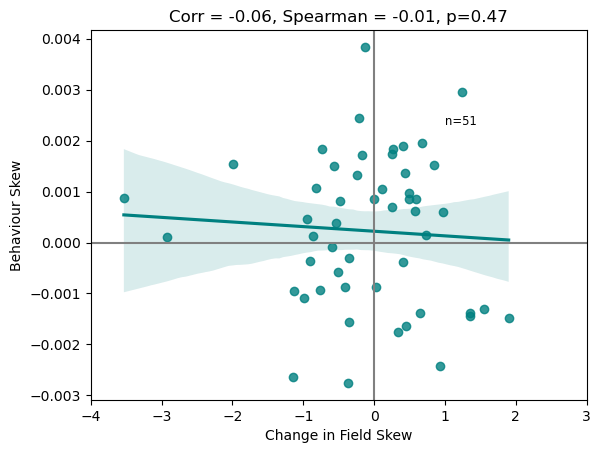

In [173]:
matplotlib.style.use('default')
ax = sns.regplot(data=df1, y="Behaviour Skew", x="Change in Field Skew", color='teal').set_title('Corr = {}, Spearman = {}, p={}'.format(corr_coeff,spearman_n, spearman_p))
plt.axvline(0, color='grey') # Plot a vertical line at corresponding x
plt.axhline(0, color='grey') # Plot a vertical line at corresponding x
speed_filter  = 0.05
plt.text(1, 0.0025, "n={}".format(len(checky)), ha="left", va="top", size='small')
plt.xlim([-4,3])

IndexError: list index out of range

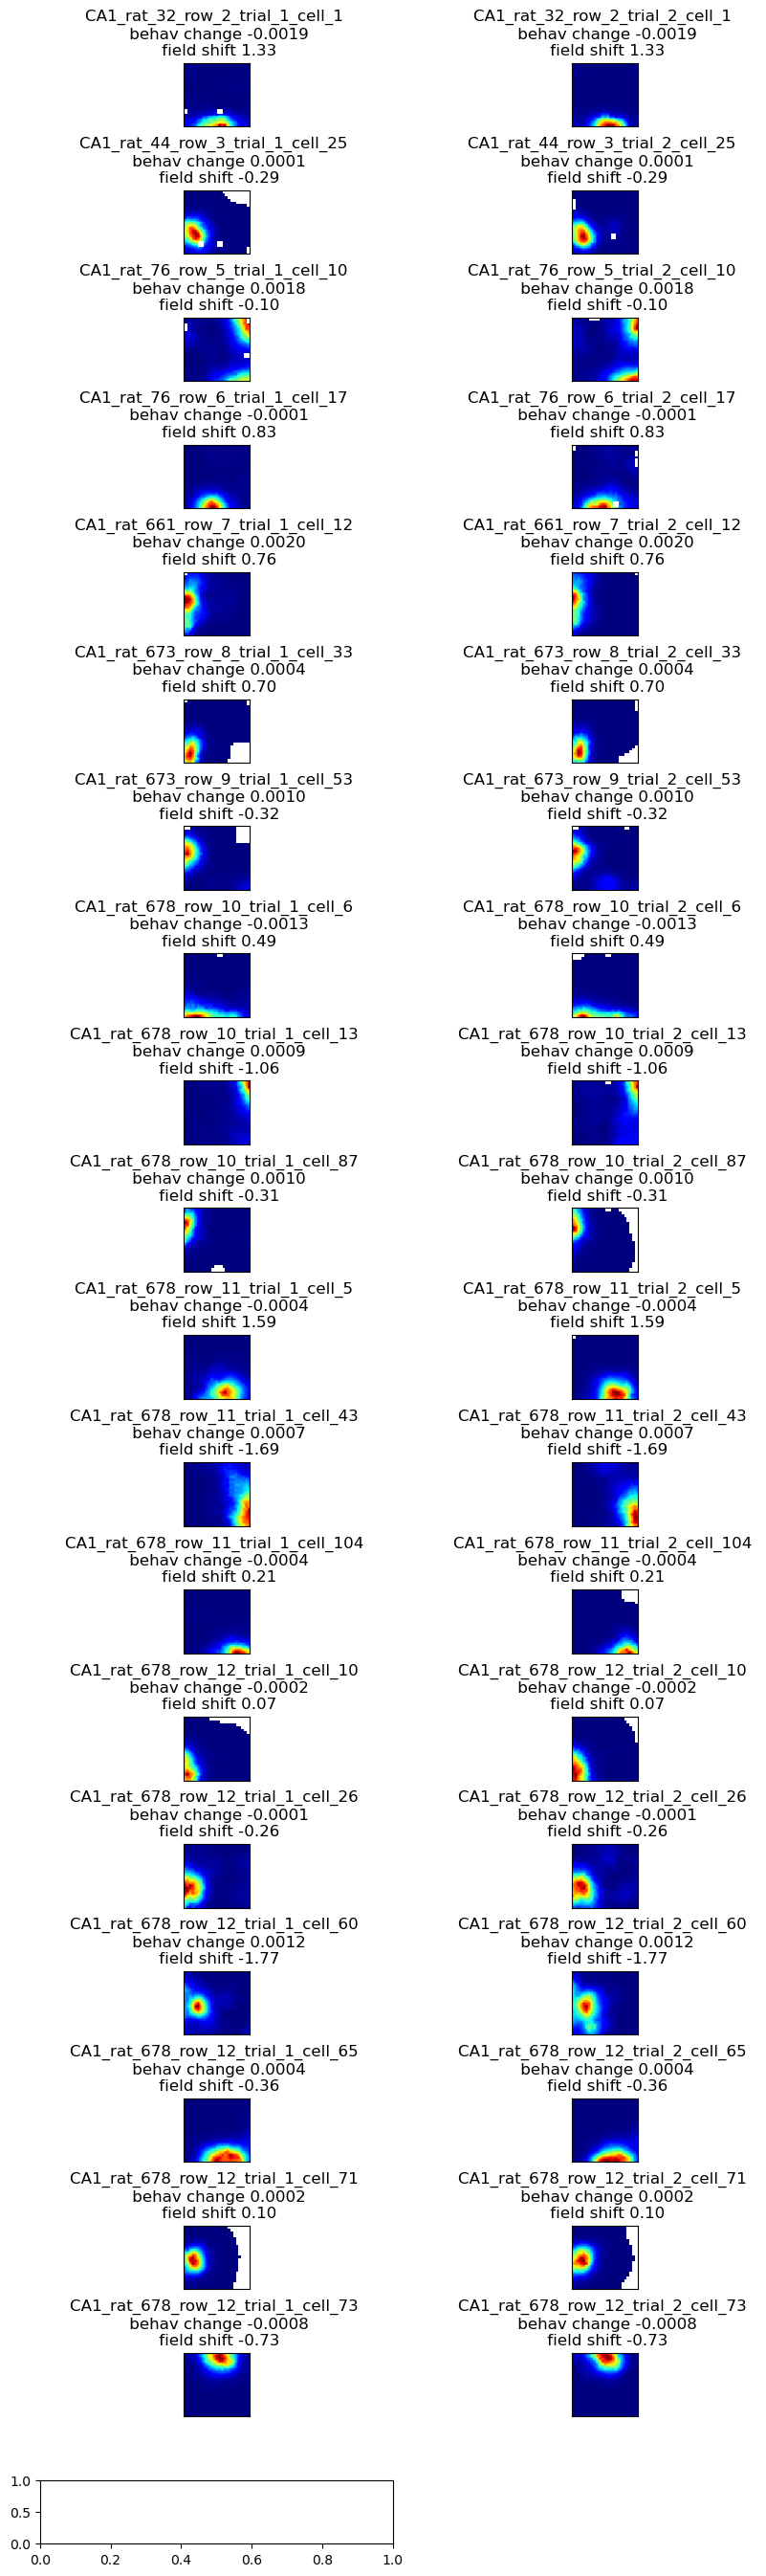

In [48]:
#Viewing those cells
filt_rms = []
for l in rats_index:
    trial1 = l.split('trial_')[1].split('_cell')[0]
    folder1 = l.split('rat_')[1].split('_row')[0]
    rm1 = pd.read_csv('/home/lauren/Comparing_BVC_Trad/53.Laurenz_CA1_new_morefilt_trial/Trial_{}/'.format(trial1)+'Rat_'+folder1+'/Rat_{}.csv'.format(l))
    rm1 = rm1.to_numpy()
    filt_rms.append(rm1)
len(filt_rms)

def plot_cells(cells, n, m, cell_type = ''):
    fig = plt.figure()
    fig.set_figheight(120)
    fig.set_figwidth(10)
    for i in np.arange(1,n*m):
        ax = plt.subplot(n, m, i)
        ax.imshow(cells[i-1], cmap='jet', origin = 'lower')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_title('{} \n behav change {:.4f}\n field shift {:.2f}'.format(rats_index[i-1], behav_index[i-1],field_index[i-1]))          #format(centroids_index[i-1], field_skew_index[i-1]))
        plt.subplots_adjust(hspace=1,wspace=0.1)
plot_cells(cells= filt_rms , n=70, m=2)                                  

### For Laurenz Sub

In [83]:
#@title Reads in ratemaps for Laurenz Sub

os.chdir('/home/lauren/Comparing_BVC_Trad/53.Laurenz_sub_new_meantrate_width/Trial_2/')
all_= sorted(glob.glob('*.csv'))

breaks1 = []
breaks=[]
breaks2 = []
breaks3 = []
breaks4 = []
breaks5 = []
rats=[]
orientations=[]
cells=[]
area_number = []
trials=[]
biases = []
datset = []
reg = []
rows = []
rm_flat = []
dataset = []
collapsed_trials = []
coll_axis = []
behav_axis = []
centroids = []
individual_trial_skew = []
coms = []
masked_rm = []
whole_flat = []
maxs = []

speed_filter = 0.0001

all_gio_nonan_sub = []
for q in tqdm(range(0,len(all_))):
    label = all_[q]

    ratemap = pd.read_csv('/home/lauren/Comparing_BVC_Trad/53.Laurenz_sub_new_meantrate_width/Trial_2/{}'.format(label), header=None) 

    rats.append(label.split('rat_')[1].split('_row')[0])
    trials.append(label.split('trial_')[1].split('_cell')[0])
    cells.append(label.split('cell_')[1].split('.csv')[0])
    rows.append(label.split('row_')[1].split('_trial')[0])

   
    #with nans
    ratemap1 = ratemap.to_numpy()
    flat_rm_nan = ratemap1.flatten()
    z_rm = stats.zscore(flat_rm_nan, nan_policy='omit')
    z_rm = z_rm.reshape([ratemap1.shape[0],ratemap1.shape[1]])
    z_rm[z_rm <1]=0

    #without nans
    ratemap2 = ratemap.to_numpy()
    ratemap2[np.isnan(ratemap2)]=0
    flat_rm_nonan = ratemap2.flatten()
    z_rm_nonan = stats.zscore(flat_rm_nonan, nan_policy='omit')
    z_rm_nonan = z_rm_nonan.reshape([ratemap2.shape[0],ratemap2.shape[1]])
    z_rm_nonan[z_rm_nonan <1]=0    

    #without nans
    img_nonan = Image.fromarray(z_rm_nonan)
    labeled, nr_objects = ndimage.label(img_nonan)           
    
    if nr_objects <= 5:                 #was <=6                                      
        regions = regionprops(labeled)

        if nr_objects> 2: 
            if np.nanmax(np.where(labeled == 1, ratemap1, np.nan)) > np.nanmax(np.where(labeled == 2, ratemap1, np.nan)) and np.nanmax(np.where(labeled == 1, ratemap1, np.nan)) > np.nanmax(np.where(labeled == 3, ratemap1, np.nan)):
                regions_0 = regions[0]
                masked = np.where(labeled == 1, ratemap1, np.nan)
                labeled_area = 1
            elif np.nanmax(np.where(labeled == 2, ratemap1, np.nan)) > np.nanmax(np.where(labeled == 1, ratemap1, np.nan)) and np.nanmax(np.where(labeled == 2, ratemap1, np.nan)) > np.nanmax(np.where(labeled == 3, ratemap1, np.nan)):
                regions_0 = regions[1] 
                masked = np.where(labeled == 2, ratemap1, np.nan)
                labeled_area = 2
            elif np.nanmax(np.where(labeled == 3, ratemap1, np.nan)) > np.nanmax(np.where(labeled == 2, ratemap1, np.nan)) and np.nanmax(np.where(labeled == 3, ratemap1, np.nan)) > np.nanmax(np.where(labeled == 1, ratemap1, np.nan)):
                regions_0 = regions[2] 
                masked = np.where(labeled == 3, ratemap1, np.nan)
                labeled_area = 3    
        elif nr_objects ==2:  
            if regions[1].area > regions[0].area:
                regions_0 = regions[1]
                masked = np.where(labeled == 2, ratemap1, np.nan)
                labeled_area = 2
                masked_rm.append(masked)
            else:
                regions_0 = regions[0] 
                masked = np.where(labeled == 1, ratemap1, np.nan)
                labeled_area = 1
                masked_rm.append(masked)
        elif nr_objects ==1:
            regions_0 = regions[0]
            masked = np.where(labeled == 1, ratemap1, np.nan)
            labeled_area = 1
            masked_rm.append(masked)
        
        orientation = regions_0.orientation  
        if regions_0.centroid[0] >=z_rm_nonan.shape[0]-5 or regions_0.centroid[0] <=5 or regions_0.centroid[1] >=z_rm_nonan.shape[1]-5 or regions_0.centroid[1] <=5:       #Only want peripheral fields
        
        #if 5 <= regions_0.centroid[0] <= z_rm_nonan.shape[0]-5 and not 5 <= regions_0.centroid[1] <= z_rm_nonan.shape[1]-5 or  5 <= regions_0.centroid[1] <= z_rm_nonan.shape[1]-5 and not 5 <= regions_0.centroid[0] <= z_rm_nonan.shape[0]-5:

       
            if np.nanmax(np.nansum(masked,axis=1)) > np.nanmax(np.nansum(masked,axis=0)):               
                collapse_axis = 0
            else:
                collapse_axis = 1
            try:
                masked1 = pd.DataFrame(masked)

                collapsed_rm = masked1.mean(axis=collapse_axis).tolist() #np.nansum(masked, axis=collapse_axis)         
                orientations.append(regions_0.orientation)

                xx = np.arange(1,len(collapsed_rm)+1)
                df_data = pd.DataFrame({'x':xx, 'y1':collapsed_rm}) 
                df_data = df_data.set_index(['x'], drop=False)
                com_flat_rm =  ((df_data['y1'] * df_data['x']).sum())/df_data['y1'].sum()

                coms.append(com_flat_rm)
                individual_trial_skew.append(df_data.idxmax(axis=0).y1- com_flat_rm)
                centroids.append(regions_0.centroid)
                area_number.append(labeled_area)
                coll_axis.append(collapse_axis)
                maxs.append(df_data.idxmax(axis=0).y1)
                
                rm_flat.append(masked1.to_numpy().flatten().tolist())       
                whole_flat.append(ratemap1.flatten().tolist())
                
            except:
                collapsed_trials.append(np.nan)
                coll_axis.append(np.nan)
                coms.append(np.nan)
                centroids.append(np.nan)
                individual_trial_skew.append(np.nan)
                area_number.append(np.nan)
                maxs.append(np.nan)
                rm_flat.append(np.nan)
                breaks5.append('one')
                whole_flat.append(np.nan)
        else:
            collapsed_trials.append(np.nan)
            coll_axis.append(np.nan)
            coms.append(np.nan)
            centroids.append(np.nan)
            individual_trial_skew.append(np.nan)
            area_number.append(np.nan)
            maxs.append(np.nan)
            rm_flat.append(np.nan)
            breaks.append(regions_0.centroid)
            whole_flat.append(np.nan)

    else:
        collapsed_trials.append(np.nan)
        coll_axis.append(np.nan)
        centroids.append(np.nan)
        coms.append(np.nan)
        individual_trial_skew.append(np.nan)
        area_number.append(np.nan)
        maxs.append(np.nan)
        rm_flat.append(np.nan)
        breaks3.append('one')
        whole_flat.append(np.nan)
        
#Behaviour 
    trajectory = pd.read_csv('/home/lauren/Comparing_BVC_Trad/54.Laurenz_Sub_traj/Sub_trial_row_{}_rat_{}_trial_{}.csv'.format(rows[q],rats[q], trials[q]), header=None)
    trajectory = trajectory.to_numpy()

    x=[]
    y=[]

    for m in range(0,len(trajectory)):
        x_1=trajectory[m][0]/10            #swapped
        y_1=trajectory[m][1]/10
        if np.isnan(x_1)==False and np.isnan(y_1)==False:
            x.append(x_1)
            y.append(y_1)
    angles = []
    for i in range(0,len(x)-1):
        x0=x[i]
        y0=y[i]
        x1 = x[i+1]
        y1 =y[i+1]
        try:
            value = labeled[int(y0), int(x0)]
            if len(regions) > 1:
                if regions[1].area > regions[0].area:
                    if value ==2 :                                                  #not outside of the image label
                        xchange = x1-x0
                        ychange = y1-y0
                        
                        if abs(xchange)>speed_filter or abs(ychange)>speed_filter:
                            p = angle_between([0,0],[xchange,ychange])
                            angles.append(p)
                        else:
                            pass
                    else:
                        pass
            
                elif regions[1].area < regions[0].area:
                    if value ==1 :                                                  #not outside of the image label
                        xchange = x1-x0
                        ychange = y1-y0
                        
                        if abs(xchange)>speed_filter or abs(ychange)>speed_filter:
                        #if xchange != 0 or ychange != 0:                          #SPEED FILTERING
                            p = angle_between([0,0],[xchange,ychange])
                            angles.append(p)
                        else:
                            pass
                    else:
                        pass
            elif len(regions) == 1:
                if value ==1 :                                                  #not outside of the image label
                    xchange = x1-x0
                    ychange = y1-y0
                    
                    if abs(xchange)>speed_filter or abs(ychange)>speed_filter:
                    #if xchange != 0 or ychange != 0:                          #SPEED FILTERING
                        p = angle_between([0,0],[xchange,ychange])
                        angles.append(p)
                    else:
                        pass
                else:
                    pass  
            else:
                angles.append(np.nan)
        except:
            pass
    
    try:
        angles2 = []
        for m in angles:
            if m >315:
                angles2.append(m-360)
            else:
                angles2.append(m)

        hist, bin_edges = np.histogram(angles, bins =np.array([-45,45,135,225,360]), density=True)
        hist = hist.tolist()
        #hist = hist / np.sum(hist)

        if collapse_axis ==0:                                      #horizontal fields
            tt = 'Right/Left'
            try:
                bias = (hist[0]-hist[2])

            except:
                pass

        elif collapse_axis ==1:                                    #vertical fields
            tt = 'Up/Down'
            try:
                bias = (hist[1]-hist[3])   
            except:
                pass

        biases.append(bias)
        behav_axis.append(tt)
    except:
        biases.append(np.nan)
        behav_axis.append(np.nan)



 42%|████▏     | 83/196 [00:14<00:23,  4.87it/s]/home/lauren/miniconda3/envs/neuroscenes/lib/python3.8/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
 44%|████▍     | 87/196 [00:15<00:19,  5.61it/s]/home/lauren/miniconda3/envs/neuroscenes/lib/python3.8/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
 45%|████▍     | 88/196 [00:15<00:17,  6.02it/s]/home/lauren/miniconda3/envs/neuroscenes/lib/python3.8/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
 45%|████▌     | 89/196 [00:15<00:16,  6.38it/s]/home/lauren/miniconda3/envs/neuroscenes/lib/python3.8/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
 51%|█████     | 99/196 [00:17<00:16,  5.90it/s]/home/lauren/miniconda3/envs

In [84]:
df_trial_sub = pd.DataFrame({'rats':rats,'datasets':rows, 'trial':trials, 'rm_flat': rm_flat, 'cell':cells, 'behav_axis':behav_axis, 'behav_bias':biases, 'centroids':centroids,'maxs':maxs,  'coms':coms, 'col_axis':coll_axis, 'area_number':area_number})
df_trial_sub.head()

,rats,datasets,trial,rm_flat,cell,behav_axis,behav_bias,centroids,maxs,coms,col_axis,area_number
0,372,10,2,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",10,Up/Down,0.002404,"(14.273809523809524, 22.44047619047619)",11.0,14.252075,1.0,1.0
1,372,10,2,NaN,13,Up/Down,0.000616,NaN,NaN,NaN,NaN,NaN
2,372,10,2,"[10.4098360655738, 10.7142857142857, 11.102719...",14,Up/Down,-0.001770,"(3.6923076923076925, 2.3846153846153846)",3.0,5.194694,1.0,1.0
3,372,10,2,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",18,Right/Left,0.000067,"(22.2125, 8.3875)",9.0,9.506051,0.0,3.0
4,372,10,2,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",19,Right/Left,-0.002998,"(21.457831325301203, 11.63855421686747)",8.0,13.303890,0.0,2.0


In [85]:
df_trial_sub.to_csv('/home/lauren/Comparing_BVC_Trad/FINAL_skew_trials_laurenz_sub_2_masked_meannew_z_5.csv', index=False)


In [86]:
df1 = pd.read_csv('/home/lauren/Comparing_BVC_Trad/FINAL_skew_trials_laurenz_sub_1_masked_meannew_z_5.csv')
df2 = pd.read_csv('/home/lauren/Comparing_BVC_Trad/FINAL_skew_trials_laurenz_sub_2_masked_meannew_z_5.csv')


#df1 = pd.read_csv('/home/lauren/Comparing_BVC_Trad/skew_trials_laurenz_sub_1_masked_meannew_z_6.csv')
#df2 = pd.read_csv('/home/lauren/Comparing_BVC_Trad/skew_trials_laurenz_sub_2_masked_meannew_z_6.csv')

df = pd.concat([df1,df2])
df.head()

,rats,datasets,trial,rm_flat,cell,behav_axis,behav_bias,centroids,maxs,coms,col_axis,area_number
0,372,10,1,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",10,Up/Down,0.002279,"(8.923076923076923, 22.53846153846154)",12.0,9.855603,1.0,1.0
1,372,10,1,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",12,Right/Left,0.001319,"(1.8833333333333333, 18.816666666666666)",22.0,19.064941,0.0,1.0
2,372,10,1,"[7.9646017699115, 8.0, 7.4002574002574, 6.4890...",14,Up/Down,-0.000653,"(3.8181818181818183, 1.303030303030303)",3.0,5.389739,1.0,1.0
3,372,10,1,NaN,18,Up/Down,-0.000579,NaN,NaN,NaN,NaN,NaN
4,372,10,1,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",19,Up/Down,0.001574,"(9.636363636363637, 21.939393939393938)",10.0,10.914870,1.0,1.0


In [89]:
av_behav_biases = []
rats_index = []
behav_index = []
field_index = []
change_field_skew = []
dataset = df.datasets.iloc[:].tolist()
datasets_unique = list(set(dataset))
change_maxs = []
breaks = []
skewinfo = []
result_index = []

for dataset in datasets_unique:
    for cell_ in range(1,500):
        try:
            filt=df[df['datasets']==dataset]
            filt=filt[filt['cell']==cell_]
            first_trial = filt[filt['trial']==1].coms.iloc[0]
            first_axis = filt[filt['trial']==1].col_axis.iloc[0]
            second_trial = filt[filt['trial']==2].coms.iloc[0]
            second_axis = filt[filt['trial']==2].col_axis.iloc[0]
            first_behav = filt[filt['trial']==1].behav_bias.iloc[0]
            second_behav = filt[filt['trial']==2].behav_bias.iloc[0]
            first_centroid = filt[filt['trial']==1].centroids.iloc[0]
            second_centroid = filt[filt['trial']==2].centroids.iloc[0]
            first_max = filt[filt['trial']==1].maxs.iloc[0]
            second_max =filt[filt['trial']==2].maxs.iloc[0]
            col_axis1 = filt[filt['trial']==1].col_axis.iloc[0]
            col_axis2 = filt[filt['trial']==2].col_axis.iloc[0]
            rats1 = filt[filt['trial']==2].rats.iloc[0]
            
            a=filt[filt['trial']==1].rm_flat.iloc[0]
            rm_flat_1 = [float(x) for x in a.strip("'[]'").split(",")] 

            b=filt[filt['trial']==2].rm_flat.iloc[0]
            rm_flat_2 = [float(x) for x in b.strip("'[]'").split(",")]  

            temp_df = pd.DataFrame({'one':rm_flat_1, 'two':rm_flat_2}) 
            stability = temp_df.corr().iloc[0,1]
            
            if stability >= 0.8 and np.isnan(stability)==False  and first_axis == second_axis:
                    rats_index.append('rat_{}_row_{}_cell_{}_trial_1.csv'.format(rats1,dataset,cell_))
                    rats_index.append('rat_{}_row_{}_cell_{}_trial_2.csv'.format(rats1,dataset,cell_))
                    b_bias = filt.behav_bias.tolist()           
                    behav_index.append(second_behav-first_behav)
                    behav_index.append(second_behav-first_behav)
                    field_index.append(second_trial-first_trial)
                    field_index.append(second_trial-first_trial)
                                            
                    change_field_skew.append(second_trial-first_trial)
                    av_behav_biases.append(second_behav-first_behav)             #np.mean(b_bias))       #second_behav-first_behav                  #ALTERNATIVES 
                    change_maxs.append(second_max-first_max)

                    skewinfo.append([dataset,cell_,second_behav-first_behav])
                    print(dataset, cell_, (second_behav-first_behav))
            else:
                change_field_skew.append(np.nan)
                av_behav_biases.append(np.nan)
                change_maxs.append(np.nan)
                                
        except:
            pass
                

3 5 -0.0008977207770721
6 33 0.00047759801201890007
7 30 -0.0018228549848461
7 33 0.0005032955092423002
8 22 -0.0013741904532803
9 16 -0.0009546709721064001
9 22 0.00026240047059096136
9 34 -0.0020414881767066
9 37 -0.00034239003947779997
10 5 -0.00011728711234359991
10 10 0.00012575675503140012
10 27 -0.0034652576322695998


In [90]:
df1 = pd.DataFrame({'Behaviour Skew':av_behav_biases, 'Change in Field Skew':change_field_skew}) 
spearman = stats.spearmanr(change_field_skew,av_behav_biases, nan_policy = 'omit', alternative='less')
spearman_n = spearman[0].round(decimals=2)
spearman_p = spearman[1].round(decimals = 2)
corr_coeff =ma.corrcoef(ma.masked_invalid(av_behav_biases), ma.masked_invalid(change_field_skew))[1,0].round(decimals=2)


Text(0.0005, 0.00055, 'n=24')

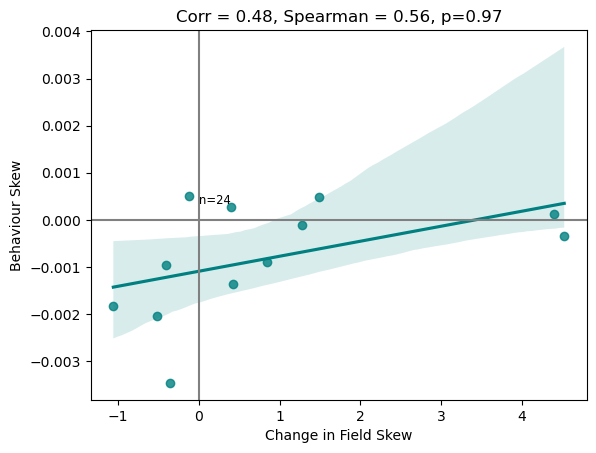

In [91]:
ax = sns.regplot(data=df1, y="Behaviour Skew", x="Change in Field Skew", color='teal').set_title('Corr = {}, Spearman = {}, p={}'.format(corr_coeff,spearman_n, spearman_p))
plt.axvline(0, color='grey') # Plot a vertical line at corresponding x
plt.axhline(0, color='grey') # Plot a vertical line at corresponding x
speed_filter  = 0.05
plt.text(0.0005, 0.00055, "n={}".format(len(rats_index)), ha="left", va="top", size='small')



IndexError: list index out of range

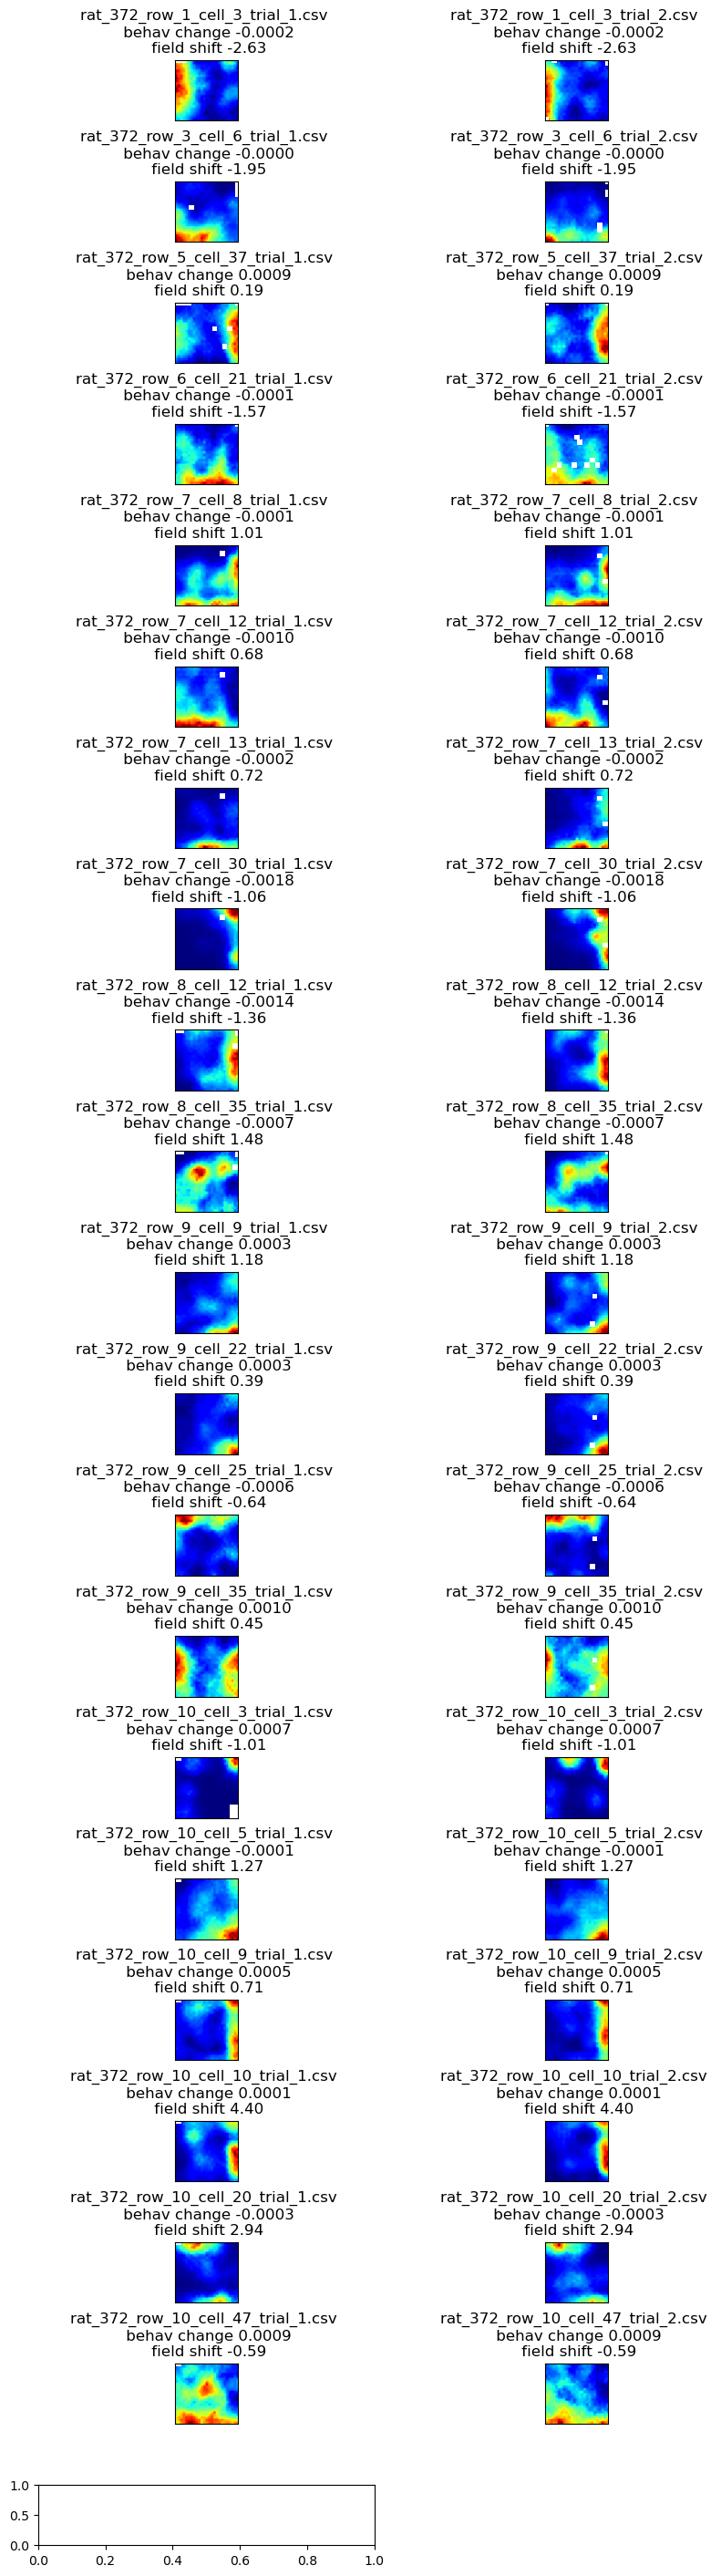

In [901]:
#Viewing those cells
filt_rms = []
for l in rats_index:
    row1 = l.split('row_')[1].split('_')[0]
    cell1 = l.split('cell_')[1].split('_')[0]
    trial1 = l.split('trial_')[1].split('.csv')[0]
    rat1 = l.split('rat_')[1].split('_')[0]
    try:
        rm1 = pd.read_csv('/home/lauren/Comparing_BVC_Trad/53.Laurenz_sub_new_meantrate_width/Trial_{}/'.format(trial1)+'Rat_Sub_rat_{}'.format(rat1)+'_row_{}'.format(row1)+'_trial_{}'.format(trial1)+'_cell_{}'.format(cell1)+'.csv')
        rm1 = rm1.to_numpy()
        filt_rms.append(rm1)
    except:
        filt_rms.append(np.zeros((10,10)))
len(filt_rms)

def plot_cells(cells, n, m, cell_type = ''):
    fig = plt.figure()
    fig.set_figheight(120)
    fig.set_figwidth(10)
    for i in np.arange(1,n*m):
        ax = plt.subplot(n, m, i)
        ax.imshow(cells[i-1], cmap='jet', origin = 'lower')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_title('{} \n behav change {:.4f}\n field shift {:.2f}'.format(rats_index[i-1], behav_index[i-1],field_index[i-1]))          #format(centroids_index[i-1], field_skew_index[i-1]))
        plt.subplots_adjust(hspace=1,wspace=0.1)
plot_cells(cells= filt_rms , n=70, m=2)                                  

###

/tmp/ipykernel_132243/3016550795.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(data.compass)


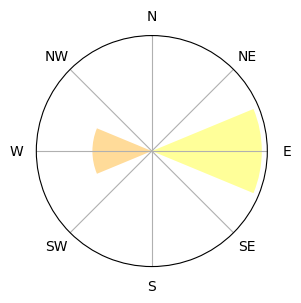

In [20]:
from matplotlib.gridspec import GridSpec
data = pd.DataFrame({'value': [0, 0, np.mean([0.0014774422073079792,0.0014808758063050787]), 0, 0, 0, np.mean([0.0008482475764354959,0.0007495230307985826]), 0],
                     'bearing': range(0, 360, 45),
                     'compass': ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'],
                     'color': ['red','red','yellow','red','red','red','orange','red', ]})

data.index = data['bearing'] * 2*pi / 360

fig = plt.figure(figsize=(8, 3))
gs = GridSpec(nrows=1, ncols=2, width_ratios=[1, 1])

#ax1 = fig.add_subplot(gs[0, 0])
#ax1.bar(x=data['compass'], height=data['value'], width=1)

ax2 = fig.add_subplot(gs[0, 0], projection='polar')
ax2.set_theta_zero_location('N')
ax2.set_theta_direction(-1)
ax2.bar(x=data.index, height=data['value'], width=pi/4, color=data.color, alpha=0.4)
ax2.set_yticklabels([])
#ax2.ylim([0,0.001])
ax2.set_xticklabels(data.compass)
ax2.set_rgrids([])

plt.show()

# Corner Cells and Sores (Figure 4)

### Square

In [ ]:
#corner scores for PC (don't ue the 40% cutoff when making them)
p1= np.array([0,0])
p2 = np.array([35, 0])
p3 = np.array([35, 35])
p4 = np.array([0,35])

all_cells_gio_pc_square=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Square/OLD/35_PC1')
all_= sorted(glob.glob('*.npy'))

for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Square/OLD/35_PC1/{}'.format(q)) 
    all_cells_gio_pc_square.append(rm)

corner_scores_pc = []
for sf_1 in all_cells_gio_pc_square[:]:
    rm = sf_1
    firing_threshold = 0.75 * np.nanmax(rm)
    rm[rm < firing_threshold] = 0
    env_centroid = [rm.shape[0]/2,rm.shape[1]/2] 

    img = Image.fromarray(rm)
    img = np.asarray(img)
    img_ = img 
    labeled, nr_objects = ndimage.label(img_)
    regions = regionprops(labeled)
    single_corners = []
    for c in range(0,len(regions)):
        try:
            field_centroid = regions[c].centroid
            p=np.array(field_centroid)
            corner_dist = min([np.linalg.norm(p-p1), np.linalg.norm(p-p2), np.linalg.norm(p-p3), np.linalg.norm(p-p4)])    
            corner_score = (distance.euclidean(env_centroid,field_centroid) - corner_dist ) / (distance.euclidean(env_centroid,field_centroid)+ corner_dist)
            single_corners.append(corner_score)
        except:
            single_corners.append(np.nan)
    if len(single_corners) > 4:
        single_corners = sorted(single_corners, reverse=True)
        extra_scores = []
        for m in range(4,len(single_corners)):
            extra_scores.append(np.abs(single_corners[m]-1))
        final_score = (np.nansum(single_corners[:4])-np.nansum(extra_scores))/ 4
        corner_scores_pc.append(final_score)
    else:
        corner_scores_pc.append(np.nansum(single_corners)/4)

100%|██████████| 100/100 [00:00<00:00, 6736.21it/s]


In [ ]:
#corner scores for SF (don't ue the 40% cutoff when making them)
p1= np.array([0,0])
p2 = np.array([35, 0])
p3 = np.array([35, 35])
p4 = np.array([0,35])

all_cells_gio_sf_square=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Square/NEW/L_35_SF1/')
all_= sorted(glob.glob('*.npy'))

for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Square/NEW/L_35_SF1/{}'.format(q)) 
    all_cells_gio_sf_square.append(rm)


corner_scores_sf = []
for sf_1 in all_cells_gio_sf_square[:]:
    rm = sf_1
    firing_threshold = 0.75 * np.nanmax(rm)
    rm[rm < firing_threshold] = 0
    env_centroid = [rm.shape[0]/2,rm.shape[1]/2] 

    img = Image.fromarray(rm)
    img = np.asarray(img)
    img_ = img 
    labeled, nr_objects = ndimage.label(img_)
    regions = regionprops(labeled)
    single_corners = []
    for c in range(0,len(regions)):
        try:
            field_centroid = regions[c].centroid
            p=np.array(field_centroid)
            corner_dist = min([np.linalg.norm(p-p1), np.linalg.norm(p-p2), np.linalg.norm(p-p3), np.linalg.norm(p-p4)])    
            corner_score = (distance.euclidean(env_centroid,field_centroid) - corner_dist ) / (distance.euclidean(env_centroid,field_centroid)+ corner_dist)
            single_corners.append(corner_score)
        except:
            single_corners.append(np.nan)
    if len(single_corners) > 4:
        single_corners = sorted(single_corners, reverse=True)
        extra_scores = []
        for m in range(4,len(single_corners)):
            extra_scores.append(np.abs(single_corners[m]-1))
        final_score = (np.nansum(single_corners[:4])-np.nansum(extra_scores))/ 4
        corner_scores_sf.append(final_score)
    else:
        corner_scores_sf.append(np.nansum(single_corners)/4)
len(corner_scores_sf)

100%|██████████| 100/100 [00:00<00:00, 7980.33it/s]


100

In [ ]:
#corner scores for Shuffles (don't ue the 40% cutoff when making them)
p1= np.array([0,0])
p2 = np.array([35, 0])
p3 = np.array([35, 35])
p4 = np.array([0,35])

all_cells_gio_corners=[]
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Square/NEW/L_35_shuffles1/')
all_= sorted(glob.glob('*.npy'))

for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Square/NEW/L_35_shuffles1/{}'.format(q)) 
    all_cells_gio_corners.append(rm)

corner_scores_sf_shuffle = []
for sf_1 in tqdm(all_cells_gio_corners[:]):
    rm = sf_1
    firing_threshold = 0.75 * np.nanmax(rm)
    rm[rm < firing_threshold] = 0
    env_centroid = [rm.shape[0]/2,rm.shape[1]/2] 

    img = Image.fromarray(rm)
    img = np.asarray(img)
    img_ = img 
    labeled, nr_objects = ndimage.label(img_)
    regions = regionprops(labeled)
    single_corners = []
    for c in range(0,len(regions)):
        try:
            field_centroid = regions[c].centroid
            p=np.array(field_centroid)
            corner_dist = min([np.linalg.norm(p-p1), np.linalg.norm(p-p2), np.linalg.norm(p-p3), np.linalg.norm(p-p4)])    
            corner_score = (distance.euclidean(env_centroid,field_centroid) - corner_dist ) / (distance.euclidean(env_centroid,field_centroid)+ corner_dist)
            single_corners.append(corner_score)
        except:
            single_corners.append(np.nan)
    try:
        corner_scores_sf_shuffle.append(np.nansum(single_corners)/4)
    except:
        corner_scores_sf_shuffle.append(np.nan)
len(corner_scores_sf_shuffle)

100%|██████████| 2000/2000 [00:00<00:00, 4121.29it/s]


2000

In [ ]:
ninetyfive_percentile = np.percentile(corner_scores_sf_shuffle, 95)
ninetyfive_percentile 

0.3884682276301486

In [ ]:
sum(i > ninetyfive_percentile for i in corner_scores_sf) / len(corner_scores_sf)*100

0.0

In [ ]:
max(corner_scores_sf)

0.519542076157707

In [ ]:
np.percentile(corner_scores_sf, 96)

0.4107223434286784

### Triangle

In [ ]:
p1= np.array([0,0])
p2 = np.array([0,30])
p3 = np.array([30, 15])

# Triangle PC
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Triangle/30_PC1') #PC_2_3
all_= sorted(glob.glob('*'))

all_gio_triangle = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Triangle/30_PC1/{}'.format(q)) 
    all_gio_triangle.append(rm)

#corner scores for PC

corner_scores_pc_triangle = []
for sf_1 in all_gio_triangle[:]:
    rm = sf_1
    #rm = rm/np.nansum(rm)
    firing_threshold = 0.2 * np.nanmax(rm)
    rm[rm < firing_threshold] = 0
    env_centroid = [30/3,15]

    img = Image.fromarray(rm)
    img = np.asarray(img)
    img_ = img 
    labeled, nr_objects = ndimage.label(img_)
    regions = regionprops(labeled)
    single_corners = []
    for c in range(0,len(regions)):
        try:
            field_centroid = regions[c].centroid
            p=np.array(field_centroid)
            corner_dist = min([np.linalg.norm(p-p1), np.linalg.norm(p-p2), np.linalg.norm(p-p3)])    
            corner_score = (distance.euclidean(env_centroid,field_centroid) - corner_dist ) / (distance.euclidean(env_centroid,field_centroid)+ corner_dist)
            single_corners.append(corner_score)
        except:
            single_corners.append(np.nan)
    if len(single_corners) > 3:
        single_corners = sorted(single_corners, reverse=True)
        extra_scores = []
        for m in range(3,len(single_corners)):
            extra_scores.append(np.abs(single_corners[m]-1))
        final_score = (np.nansum(single_corners[:3])-np.nansum(extra_scores))/ 3
        corner_scores_sf_triangle.append(final_score)
    else:
        corner_scores_pc_triangle.append(np.nansum(single_corners)/3)
len(corner_scores_pc_triangle)

100%|██████████| 100/100 [00:00<00:00, 7953.10it/s]


100

In [ ]:
p1= np.array([0,0])
p2 = np.array([0,30])
p3 = np.array([30, 15])

# Triangle SF
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Triangle/30_SF2')
all_= sorted(glob.glob('*'))

all_gio_triangle = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Triangle/30_SF2/{}'.format(q)) 

    all_gio_triangle.append(rm)

#corner scores for SF

corner_scores_sf_triangle = []
for sf_1 in all_gio_triangle[:]:
    rm = sf_1
    firing_threshold = 0.74 * np.nanmax(rm)

    rm[rm < firing_threshold] = 0
    env_centroid = [30/3,15] 
    img = Image.fromarray(rm)
    img = np.asarray(img)
    img_ = img 
    labeled, nr_objects = ndimage.label(img_)
    regions = regionprops(labeled)
    single_corners = []
    for c in range(0,len(regions)):
        try:
            field_centroid = regions[c].centroid
            p=np.array(field_centroid)
            corner_dist = min([np.linalg.norm(p-p1), np.linalg.norm(p-p2), np.linalg.norm(p-p3)])    
            corner_score = (distance.euclidean(env_centroid,field_centroid) - corner_dist ) / (distance.euclidean(env_centroid,field_centroid)+ corner_dist)
            single_corners.append(corner_score)
        except:
            single_corners.append(np.nan)
    if len(single_corners) > 3:
        single_corners = sorted(single_corners, reverse=True)
        extra_scores = []
        for m in range(3,len(single_corners)):
            extra_scores.append(np.abs(single_corners[m]-1))
        final_score = (np.nansum(single_corners[:3])-np.nansum(extra_scores))/ 3
        corner_scores_sf_triangle.append(final_score)
    else:
        corner_scores_sf_triangle.append(np.nansum(single_corners)/3)
len(corner_scores_sf_triangle)

100%|██████████| 100/100 [00:00<00:00, 6745.64it/s]


100

In [ ]:
p1= np.array([0,0])
p2 = np.array([0,30])
p3 = np.array([30, 15])

# Triangle Shuffle
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Triangle/30_shuffles2')
all_= sorted(glob.glob('*'))

all_gio_triangle = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Triangle/30_shuffles2/{}'.format(q)) 
    all_gio_triangle.append(rm)

#corner scores for Shuffle

corner_scores_shuff_triangle = []
for sf_1 in all_gio_triangle[:]:
    rm = sf_1
    firing_threshold = 0.74 * np.nanmax(rm)

    rm[rm < firing_threshold] = 0
    env_centroid = [30/3,15] 
    img = Image.fromarray(rm)
    img = np.asarray(img)
    img_ = img 
    labeled, nr_objects = ndimage.label(img_)
    regions = regionprops(labeled)
    single_corners = []
    for c in range(0,len(regions)):
        try:
            field_centroid = regions[c].centroid
            p=np.array(field_centroid)
            corner_dist = min([np.linalg.norm(p-p1), np.linalg.norm(p-p2), np.linalg.norm(p-p3)])    
            corner_score = (distance.euclidean(env_centroid,field_centroid) - corner_dist ) / (distance.euclidean(env_centroid,field_centroid)+ corner_dist)
            single_corners.append(corner_score)
        except:
            single_corners.append(np.nan)
    try:
        corner_scores_shuff_triangle.append(np.nansum(single_corners)/3)
    except:
        corner_scores_shuff_triangle.append(np.nan)
len(corner_scores_shuff_triangle)


100%|██████████| 2000/2000 [00:00<00:00, 8401.05it/s]


2000

In [ ]:
ninetyfive_percentile = np.percentile(corner_scores_shuff_triangle, 95)
ninetyfive_percentile 

0.17163914967524463

In [ ]:
sum(i > ninetyfive_percentile for i in corner_scores_sf_triangle) / len(corner_scores_sf_triangle)*100

6.0

### Hexagon

In [ ]:
p1= np.array([18,0])
p2 = np.array([ 36, 8])
p3 = np.array([ 36, 28])
p4 = np.array([18,36])
p5 = np.array([ 0,28])
p6 = np.array([0,8])

# Hexagon PC
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Hexagon/1st_mouse/PC_hex6/') #/Hexagon/PC_new2')
all_= sorted(glob.glob('*'))

all_gio_hexagon = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Hexagon/1st_mouse/PC_hex6/{}'.format(q)) 
    all_gio_hexagon.append(rm)

corner_scores_pc_hexagon = []
for sf_1 in all_gio_hexagon:
    rm = sf_1
    firing_threshold = 0.67 * np.nanmax(rm)
    rm[rm < firing_threshold] = 0
    env_centroid = [rm.shape[0]/2,rm.shape[1]/2] 
    img = Image.fromarray(rm)
    img = np.asarray(img)
    img_ = img 
    labeled, nr_objects = ndimage.label(img_)
    regions = regionprops(labeled)
    single_corners = []
    for c in range(0,len(regions)):
        try:
            field_centroid = regions[c].centroid
            p=np.array(field_centroid)
            corner_dist = min([np.linalg.norm(p-p1), np.linalg.norm(p-p2), np.linalg.norm(p-p3), np.linalg.norm(p-p4), np.linalg.norm(p-p5), np.linalg.norm(p-p6)])    
            corner_score = (distance.euclidean(env_centroid,field_centroid) - corner_dist ) / (distance.euclidean(env_centroid,field_centroid)+ corner_dist)
            single_corners.append(corner_score)
        except:
            single_corners.append(np.nan)

    if len(single_corners) > 6:
        single_corners = sorted(single_corners, reverse=True)
        extra_scores = []
        for m in range(6,len(single_corners)):
            extra_scores.append(np.abs(single_corners[m]-1))
        final_score = (np.nansum(single_corners[:6])-np.nansum(extra_scores))/ 6
        corner_scores_sf_hexagon.append(final_score)
    else:
        corner_scores_pc_hexagon.append(np.nansum(single_corners)/6)
len(corner_scores_pc_hexagon)

100%|██████████| 100/100 [00:00<00:00, 6092.92it/s]


100

In [ ]:
p1 = np.array([18,0])
p2 = np.array([ 36, 8])
p3 = np.array([ 36, 28])
p4 = np.array([18,36])
p5 = np.array([ 0,28])
p6 = np.array([0,8])

# Hexagons
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Hexagon/1st_mouse/SF_hex4') #/Hexagon/SF_new2')
all_= sorted(glob.glob('*'))

all_gio_hexagon = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Hexagon/1st_mouse/SF_hex4/{}'.format(q)) 
    all_gio_hexagon.append(rm)

#corner scores for SF

corner_scores_sf_hexagon = []
for sf_1 in all_gio_hexagon[:]:
    rm = sf_1
    firing_threshold = 0.75 * np.nanmax(rm)
    
    rm[rm < firing_threshold] = 0
    env_centroid = [rm.shape[0]/2,rm.shape[1]/2] 
    img = Image.fromarray(rm)
    img = np.asarray(img)
    img_ = img 
    labeled, nr_objects = ndimage.label(img_)
    regions = regionprops(labeled)
    single_corners = []
    for c in range(0,len(regions)):
        try:
            field_centroid = regions[c].centroid
            p=np.array(field_centroid)
            corner_dist = min([np.linalg.norm(p-p1), np.linalg.norm(p-p2), np.linalg.norm(p-p3), np.linalg.norm(p-p4), np.linalg.norm(p-p5), np.linalg.norm(p-p6)])    
            corner_score = (distance.euclidean(env_centroid,field_centroid) - corner_dist ) / (distance.euclidean(env_centroid,field_centroid)+ corner_dist)
            single_corners.append(corner_score)
        except:
            single_corners.append(np.nan)

    if len(single_corners) > 6 :
        single_corners = sorted(single_corners, reverse=True)
        extra_scores = []
        for m in range(6,len(single_corners)):
            extra_scores.append(np.abs(single_corners[m]-1))
        final_score = (np.nansum(single_corners[:6])-np.nansum(extra_scores))/ 6
        corner_scores_sf_hexagon.append(final_score)
    else:
        corner_scores_sf_hexagon.append(np.nansum(single_corners)/6)
len(corner_scores_sf_hexagon)

100%|██████████| 100/100 [00:00<00:00, 6510.57it/s]


100

In [ ]:
p1= np.array([18,0])
p2 = np.array([ 36, 8])
p3 = np.array([ 36, 28])
p4 = np.array([18,36])
p5 = np.array([ 0,28])
p6 = np.array([0,8])

# Hexagon Shuffle
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Hexagon/1st_mouse/Shuffles_hex4/') 
all_= sorted(glob.glob('*'))

all_gio_hexagon = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Hexagon/1st_mouse/Shuffles_hex4/{}'.format(q)) 
    all_gio_hexagon.append(rm)

corner_scores_shuff_hexagon = []
for sf_1 in all_gio_hexagon:
    rm = sf_1
    firing_threshold = 0.75 * np.nanmax(rm)

    rm[rm < firing_threshold] = 0
    env_centroid = [rm.shape[0]/2, rm.shape[1]/2]
    img = Image.fromarray(rm)
    img = np.asarray(img)
    img_ = img 
    labeled, nr_objects = ndimage.label(img_)
    regions = regionprops(labeled)
    single_corners = []
    for c in range(0,len(regions)):
        try:
            field_centroid = regions[c].centroid
            p=np.array(field_centroid)
            corner_dist = min([np.linalg.norm(p-p1), np.linalg.norm(p-p2), np.linalg.norm(p-p3), np.linalg.norm(p-p4), np.linalg.norm(p-p5), np.linalg.norm(p-p6)])    
            corner_score = (distance.euclidean(env_centroid,field_centroid) - corner_dist ) / (distance.euclidean(env_centroid,field_centroid)+ corner_dist)
            single_corners.append(corner_score)
        except:
            single_corners.append(np.nan)
    try:
        corner_scores_shuff_hexagon.append(np.sum(single_corners)/6)
    except:
        corner_scores_shuff_hexagon.append(np.nan) 
len(corner_scores_shuff_hexagon)

100%|██████████| 2000/2000 [00:00<00:00, 8287.59it/s]


2000

In [ ]:
ninetyfive_percentile = np.percentile(corner_scores_shuff_hexagon, 95)
ninetyfive_percentile 

0.1296739354245549

In [ ]:
sum(i > ninetyfive_percentile for i in corner_scores_sf_hexagon) / len(corner_scores_sf_hexagon)*100

5.0

In [ ]:
np.max(corner_scores_sf_hexagon)

0.24607125228212093

### Circle

In [ ]:
p1=np.array([15 * cos(np.pi/4),15 * cos(np.pi/4)])
p2=np.array([15 * cos(np.pi/4),-15 * cos(np.pi/4)])
p3=np.array([-15 * cos(np.pi/4),15 * cos(np.pi/4)])
p4=np.array([-15 * cos(np.pi/4),-15 * cos(np.pi/4)])

# Circle SF
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Circle/SF_new')
all_= sorted(glob.glob('*'))

all_gio_circle = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Circle/SF_new/{}'.format(q)) 
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    all_gio_circle.append(rm)

#corner scores for SF

corner_scores_sf_circle = []
for sf_1 in all_gio_circle[:]:
    rm = sf_1
    #rm = rm/np.nansum(rm)
    firing_threshold = 0.7 * np.nanmax(rm)
    #rm = scipy.ndimage.gaussian_filter(rm,sigma=1)
    rm[rm < firing_threshold] = 0
    env_centroid = [rm.shape[0]/2, rm.shape[1]/2]

    img = Image.fromarray(rm)
    img = np.asarray(img)
    img_ = img 
    labeled, nr_objects = ndimage.label(img_)
    regions = regionprops(labeled)
    single_corners = []
    for c in range(0,len(regions)):
        try:
            field_centroid = regions[c].centroid
            p=np.array(field_centroid)
            wall_dist = min([ norm(np.cross(p2-p1, p1-p))/norm(p2-p1) ,
                    norm(np.cross(p3-p2, p2-p))/norm(p3-p2) ,
                    norm(np.cross(p4-p3, p3-p))/norm(p4-p3) ,
                    norm(np.cross(p1-p4, p4-p))/norm(p1-p4) ,
                    ])  
                
            corner_score = (distance.euclidean(env_centroid,field_centroid) - wall_dist ) / (distance.euclidean(env_centroid,field_centroid)+ wall_dist)
            single_corners.append(corner_score)
        except:
            single_corners.append(np.nan)
    if len(single_corners) > 4:
        single_corners = sorted(single_corners, reverse=True)
        extra_scores = []
        for m in range(4,len(single_corners)):
            extra_scores.append(np.abs(single_corners[m]-1))
        final_score = (np.nansum(single_corners[:4])-np.nansum(extra_scores))/ 4
        corner_scores_sf_triangle.append(final_score)
    else:
        corner_scores_sf_circle.append(np.nansum(single_corners)/4)
len(corner_scores_sf_circle)

100%|██████████| 100/100 [00:00<00:00, 3177.41it/s]


100

In [ ]:
p1=np.array([15 * cos(np.pi/4),15 * cos(np.pi/4)])
p2=np.array([15 * cos(np.pi/4),-15 * cos(np.pi/4)])
p3=np.array([-15 * cos(np.pi/4),15 * cos(np.pi/4)])
p4=np.array([-15 * cos(np.pi/4),-15 * cos(np.pi/4)])

# Circle PC
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Circle/PC_2')
all_= sorted(glob.glob('*'))

all_gio_circle = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Circle/PC_2/{}'.format(q)) 
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    all_gio_circle.append(rm)

#corner scores for PC

corner_scores_pc_circle = []
for sf_1 in all_gio_circle:
    rm = sf_1
    #rm = rm/np.nansum(rm)
    firing_threshold = 0.7 * np.nanmax(rm)
    #rm = scipy.ndimage.gaussian_filter(rm,sigma=1)
    rm[rm < firing_threshold] = 0
    env_centroid = [rm.shape[0]/2, rm.shape[1]/2]

    img = Image.fromarray(rm)
    img = np.asarray(img)
    img_ = img 
    labeled, nr_objects = ndimage.label(img_)
    regions = regionprops(labeled)
    single_corners = []
    for c in range(0,len(regions)):
        try:
            field_centroid = regions[c].centroid
            p=np.array(field_centroid)
            wall_dist = min([ norm(np.cross(p2-p1, p1-p))/norm(p2-p1) ,
                    norm(np.cross(p3-p2, p2-p))/norm(p3-p2) ,
                    norm(np.cross(p4-p3, p3-p))/norm(p4-p3) ,
                    norm(np.cross(p1-p4, p4-p))/norm(p1-p4) 
                    ])  
                
            corner_score = (distance.euclidean(env_centroid,field_centroid) - wall_dist ) / (distance.euclidean(env_centroid,field_centroid)+ wall_dist)
            single_corners.append(corner_score)
        except:
            single_corners.append(np.nan)
    if len(single_corners) > 4:
        single_corners = sorted(single_corners, reverse=True)
        extra_scores = []
        for m in range(4,len(single_corners)):
            extra_scores.append(np.abs(single_corners[m]-1))
        final_score = (np.nansum(single_corners[:4])-np.nansum(extra_scores))/ 4
        corner_scores_sf_triangle.append(final_score)
    else:
        corner_scores_pc_circle.append(np.nansum(single_corners)/4)
len(corner_scores_pc_circle)

100%|██████████| 100/100 [00:00<00:00, 3284.16it/s]


100

In [ ]:
p1=np.array([15 * cos(np.pi/4),15 * cos(np.pi/4)])
p2=np.array([15 * cos(np.pi/4),-15 * cos(np.pi/4)])
p3=np.array([-15 * cos(np.pi/4),15 * cos(np.pi/4)])
p4=np.array([-15 * cos(np.pi/4),-15 * cos(np.pi/4)])

# Circle Shuff
os.chdir('/home/lauren/Comparing_BVC_Trad/42.Proper/Circle/Shuffles_new')
all_= sorted(glob.glob('*.npy'))

all_gio_circle = []
for q in tqdm(all_):
    rm = np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Circle/Shuffles_new/{}'.format(q)) 
    rm = rm/np.nansum(rm)
    rm = rm - np.nanmin(rm)
    all_gio_circle.append(rm)

#corner scores for Shuffles

corner_scores_shuff_circle = []
for sf_1 in all_gio_circle[:]:
    rm = sf_1
    #rm = rm/np.nansum(rm)
    firing_threshold = 0.7 * np.nanmax(rm)
    #rm = scipy.ndimage.gaussian_filter(rm,sigma=1)
    rm[rm < firing_threshold] = 0
    env_centroid = [rm.shape[0]/2, rm.shape[1]/2]

    img = Image.fromarray(rm)
    img = np.asarray(img)
    img_ = img 
    labeled, nr_objects = ndimage.label(img_)
    regions = regionprops(labeled)
    single_corners = []
    for c in range(0,len(regions)):
        try:
            field_centroid = regions[c].centroid
            p=np.array(field_centroid)
            wall_dist = min([ norm(np.cross(p2-p1, p1-p))/norm(p2-p1) ,
                    norm(np.cross(p3-p2, p2-p))/norm(p3-p2) ,
                    norm(np.cross(p4-p3, p3-p))/norm(p4-p3) ,
                    norm(np.cross(p1-p4, p4-p))/norm(p1-p4) ,
                    ])  
                  
            corner_score = (distance.euclidean(env_centroid,field_centroid) - wall_dist ) / (distance.euclidean(env_centroid,field_centroid)+ wall_dist)
            single_corners.append(corner_score)
        except:
            single_corners.append(np.nan)
    try:
        corner_scores_shuff_circle.append(np.sum(single_corners)/4)
    except:
        corner_scores_shuff_circle.append(np.nan)

len(corner_scores_shuff_circle)

100%|██████████| 2000/2000 [00:00<00:00, 3378.40it/s]


2000

In [ ]:
ninetyfive_percentile = np.percentile(corner_scores_shuff_circle, 95)
ninetyfive_percentile 

0.10088645350784753

In [ ]:
sum(i > ninetyfive_percentile for i in corner_scores_pc_circle) / len(corner_scores_pc_circle)*100

1.0

### Plots

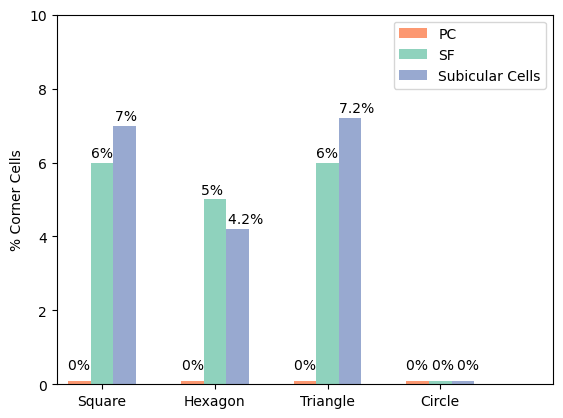

In [ ]:
#data_corner = pd.DataFrame({'% Corner Cells': [0,4,7]}, index=['PC', 'SF', 'Subicular Recordings'])

x = np.arange(4) 
y1 = [0.1, 0.1, 0.1, 0.1] #PC
y2 = [6, 5, 6, 0.1 ] # SF
y3 = [7, 4.2, 7.2, 0.1] # Subicular Recordings Gio
width = 0.2
  
# plot data in grouped manner of bar type 
plt.bar(x-0.2, y1, width, color=sns.color_palette("Set2")[1], alpha=0.9) 
plt.bar(x, y2, width, color=sns.color_palette("Set2")[0], alpha=0.73) 
plt.bar(x+0.2, y3, width, color=sns.color_palette("Set2")[2], alpha=0.9) 

plt.xticks(x, ['Square',  'Hexagon', 'Triangle', 'Circle']) 
#plt.xlabel([]) 
plt.ylabel("% Corner Cells") 
plt.legend(["PC", "SF", "Subicular Cells"]) 

plt.text(-0.3, 0.7, "0% ", ha="left", va="top", size='medium')
plt.text(1.705, 0.7, "0% ", ha="left", va="top", size='medium')
plt.text(0.71, 0.7, "0% ", ha="left", va="top", size='medium')

plt.text(-0.099, 6.45, "6% ", ha="left", va="top", size='medium')
plt.text(1.9, 6.45, "6% ", ha="left", va="top", size='medium')
plt.text(0.875, 5.45, "5% ", ha="left", va="top", size='medium')

plt.text(0.11, 7.45, "7% ", ha="left", va="top", size='medium')
plt.text(2.1, 7.65, "7.2% ", ha="left", va="top", size='medium')
plt.text(1.12, 4.65, "4.2% ", ha="left", va="top", size='medium')

plt.text(2.7, 0.7, "0% ", ha="left", va="top", size='medium')
plt.text(2.93, 0.7, "0% ", ha="left", va="top", size='medium')
plt.text(3.15, 0.7, "0% ", ha="left", va="top", size='medium')

plt.xlim([-0.4,4])
plt.ylim([0,10])
plt.show() 


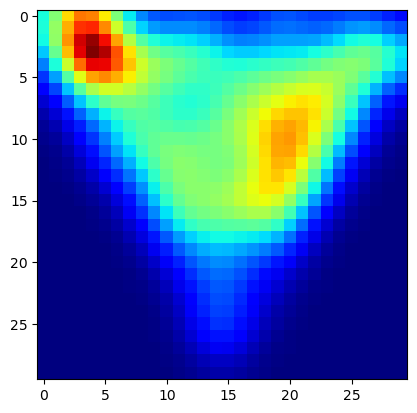

In [ ]:
a=np.load('/home/lauren/Comparing_BVC_Trad/42.Proper/Triangle/Shuffles_new/7_18.npy')
plt.imshow(a, cmap='jet')

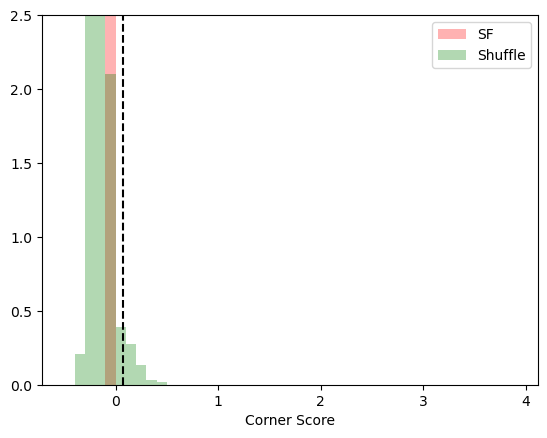

In [ ]:
data1 = corner_scores_pc
data2 = corner_scores_sf_triangle
data3 = corner_scores_shuff_triangle
#data4 = corner_scores_colin
#data5 = corner_scores_laurenz

bins = np.arange(-0.5, 4, 0.1) # fixed bin size
#plt.xlim([-0.5,1])

#plt.hist(data1, bins=bins, alpha=0.3, color = 'blue', density=True, label = 'PC')
plt.hist(data2, bins=bins, alpha=0.3, color = 'red', density=True, label = 'SF')
plt.hist(data3, bins=bins, alpha=0.3, color = 'green', density=True, label = 'Shuffle')

#plt.hist(data4, bins=bins, alpha=0.3, color = 'purple', density=True, label = 'Colin')
#plt.hist(data5, bins=bins, alpha=0.3, color = 'grey', density=True, label = 'Laurenz')

#mu, sigma = scipy.stats.norm.fit(data1)
#best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
#plt.plot(bins, best_fit_line, color='red')

result1 = stats.ttest_ind(data1, data2, equal_var=False, axis=0)
result2 = stats.ttest_ind(data1, data3, equal_var=False, axis=0)

#plt.title('Corner Scores,  p = {:.3f} to SF and p={:.3f} to PC'.format(result1[1], result2[1]))
plt.xlabel('Corner Score')
plt.ylabel('')
#plt.xlim([0.2,0.9])
plt.ylim([0,2.5])
#plt.text(0.6, 1.5, "Subiculum: 17% Corner Cells", ha="left", va="top", size='medium')
#plt.text(0.5, 4, "Colin Subiculum: 8% Corner Cells", ha="left", va="top", size='small')#
#plt.text(0.6, 1.4, "SF: 6% Corner Cells", ha="left", va="top", size='medium')
#plt.text(0.6, 1.3, "PC: 0% Corner Cells", ha="left", va="top", size='medium')

plt.axvline(x=ninetyfive_percentile , ls='--', color='black')
plt.legend(loc="upper right")
plt.show()

NameError: name 'ninetyfive_percentile' is not defined

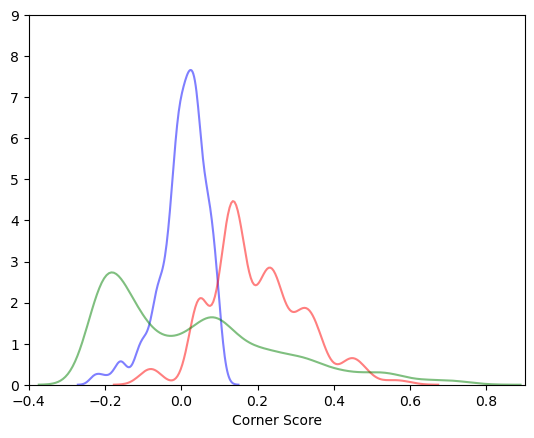

In [ ]:
data1 = corner_scores_gio
data2 = corner_scores_sf
data3 = corner_scores_pc
#data4 = corner_scores_colin
#data5 = corner_scores_laurenz

bins = np.arange(-0.5, 1, 0.1) # fixed bin size
plt.xlim([-0.5,1])

sns.kdeplot(data3, bw_adjust = 0.7, color = 'blue', alpha=0.5,  label = 'PC')
sns.kdeplot(data2,  bw_adjust = 0.7, color = 'red',  alpha=0.5, label = 'SF')
sns.kdeplot(data1,  bw_adjust = 0.7, color = 'green', alpha=0.5, label = 'Subicular recordings')

#plt.hist(data4, bins=bins, alpha=0.3, color = 'purple', density=True, label = 'Colin')
#plt.hist(data5, bins=bins, alpha=0.3, color = 'grey', density=True, label = 'Laurenz')

#mu, sigma = scipy.stats.norm.fit(data1)
#best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
#plt.plot(bins, best_fit_line, color='red')

result1 = stats.ttest_ind(data1, data2, equal_var=False, axis=0)
result2 = stats.ttest_ind(data1, data3, equal_var=False, axis=0)

#plt.title('Corner Scores,  p = {:.3f} to SF and p={:.3f} to PC'.format(result1[1], result2[1]))
plt.xlabel('Corner Score')
plt.ylabel('')
plt.xlim([-0.4,0.9])
plt.ylim([0,9])
#plt.text(0.6, 1.5, "Subiculum: 17% Corner Cells", ha="left", va="top", size='medium')
#plt.text(0.5, 4, "Colin Subiculum: 8% Corner Cells", ha="left", va="top", size='small')#
#plt.text(0.6, 1.4, "SF: 6% Corner Cells", ha="left", va="top", size='medium')
#plt.text(0.6, 1.3, "PC: 0% Corner Cells", ha="left", va="top", size='medium')

plt.axvline(x=ninetyfive_percentile , ls='--', color='black')
plt.legend(loc="upper right")
plt.show()

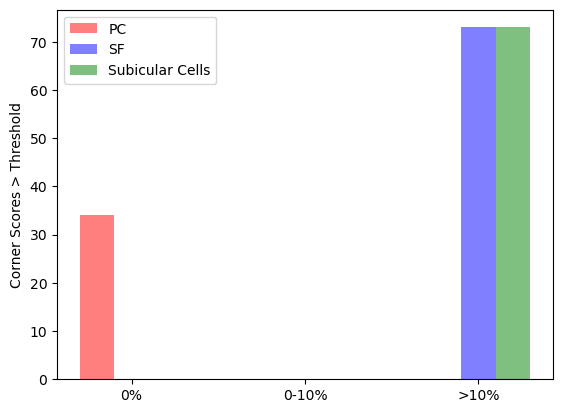

In [ ]:
x = np.arange(3) 
y1 = [34, 0, 0] 
y2 = [0, 0, 73] 
y3 = [0, 0, 73] 
width = 0.2
  
# plot data in grouped manner of bar type 
plt.bar(x-0.2, y1, width, color='red',alpha=0.5) 
plt.bar(x, y2, width, color='blue',alpha=0.5) 
plt.bar(x+0.2, y3, width, color='green',alpha=0.5) 
plt.xticks(x, ["0%", "0-10%", ">10%"]) 
#plt.xlabel("Populations") 
plt.ylabel("Corner Scores > Threshold") 
plt.legend(["PC", "SF", "Subicular Cells"]) 
plt.show() 